<a href="https://colab.research.google.com/github/Raurur00/INF-395-477-2019-Tarea-2/blob/master/Tarea2_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 2  </H3>
<p align='left'> Pablo Flores 201573001-6 </p>
<p align='left'> Javier Zavala 201573004-0 </p>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Recurrent Neural Networks 
* LSTM, GRU
* Autoencoders
* GAN
 


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*).
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 2]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 21 de Febrero 2020 (Fase I). Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Recurrentes en Texto
* 2 - Autoencoders en Fashion MNIST    
* 3 - GAN para MNIST.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

# 1 - Redes Recurrentes en texto

El analisis de texto y en general de lenguaje natural es una de las tareas desafiantes que los avances tanto del machine learning como de redes neuronales han logrado potenciar el los último años. La naturaleza inherentemente secuencial del texto y sus características similares a variables categóricas han inspirado muchos avances interesantes en el area. Para esta primera aproximación a procesamiento de secuencias, y en particular de texto, utilizaremos un dataset relativamente estandar, de texto anotado con categorias de entidades. Este dataset se encuentra disponible en el siguiente link https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus. 

Durante esta pregunta realizaremos dos tareas distintas, la de predicción del _tag_ para cada palabra de la secuencia (_many to many_) y la de predicción del siguiente caracter (_many to one_). 


#### 1.a El dataset

Investigue en la documentación del dataset cual es la tarea original para el cual fue propuesto, en particular cual es la variable que buscamos predecir, a qué se refiere esta misma y por qué es necesario utilizar técnicas avanzadas para resolver esta tarea (¿no bastaría con un diccionario? De un ejemplo en caso contrario). 

Cargue el conjunto de datos. Este conjunto de datos es bastante grande, por lo que como ven en el código propuesto, nos contentaremos con no considerar las lineas corruptas del registro.

Solo nos quedaremos con `word` y `lemma` de las variables regresoras, guardando `sentence_idx` para poder reconstruir las frases como unidad básica con la que trabajaremos. ¿Qué diferencia hay entre la palabra y su lemma? De ejemplos donde la diferencia sea significativa y explique en qué circunstancias preferiría una sobra la otra. 

Para la primera parte de estas preguntas, preferiremos los lemas pues buscaremos predecir el `tag` de la palabra.

**Investigue en la documentación del dataset cual es la tarea original para el cual fue propuesto, en particular cual es la variable que buscamos predecir, a qué se refiere esta misma y por qué es necesario utilizar técnicas avanzadas para resolver esta tarea (¿no bastaría con un diccionario? De un ejemplo en caso contrario).**

La tarea original para la caul fue propuesto el dataset es la clasificación de entidades nombradas. Algunas de las entidades que vienen clasificadas en el dataset son:
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

Esta tarea no puede ser resuelta mediante un diccionario, puesto que surgen nombres continuamente, por lo que es necesario una técnica avanzada que pueda reconocer a que categoría pretence un nombre.

In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tortugagris","key":"2ac536c06b17063e86af34f17d6ba4ce"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 910, in dataset_list_cli
    tag_ids, search, user, mine, page)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 880, in dataset_list
    return [Dataset(d) for d in datasets_list_result]
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 66, in __init__
    self.size = File.get_size(self.totalBytes)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/models/kaggle_models_extended.py", line 97, in get_size
    return '%.*f%s' % (precision, size, suffixes[suffix_index])
TypeError: float argument required, not NoneType


In [0]:
!kaggle datasets download -d abhinavwalia95/entity-annotated-corpus
!ls

 64% 17.0M/26.4M [00:00<00:00, 69.7MB/s]
100% 26.4M/26.4M [00:00<00:00, 105MB/s] 
entity-annotated-corpus.zip  kaggle.json  sample_data


In [0]:
!unzip entity-annotated-corpus.zip -d entity-annotated-corpus

Archive:  entity-annotated-corpus.zip
  inflating: entity-annotated-corpus/ner.csv  
  inflating: entity-annotated-corpus/ner_dataset.csv  


In [0]:
#Cargue el conjunto de datos
import pandas as pd
import os
df = pd.read_csv(os.path.join("entity-annotated-corpus","ner.csv"), engine='python', error_bad_lines=False)
df = df.dropna()[['lemma','tag','word','sentence_idx']]

Skipping line 281837: Expected 25 fields in line 281837, saw 34


In [0]:
df.head()

,lemma,tag,word,sentence_idx
0,thousand,O,Thousands,1.0
1,of,O,of,1.0
2,demonstr,O,demonstrators,1.0
3,have,O,have,1.0
4,march,O,marched,1.0


**¿Qué diferencia hay entre la palabra y su lemma? De ejemplos donde la diferencia sea significativa y explique en qué circunstancias preferiría una sobra la otra.**

Un lemma es la palabra bajo la cual aparece una palabra en el diccionario. En un diccionario común una conjugación de un verbo aparecería bajo el verbo en infinitivo. En este caso el lemma es la primera secuencia de caracteres que la diferencia de otras palabras. 

Ej: 
- **lemma:** demonstr
- **word:** demonstrators

Para la búsqueda en un diccionario el lemma es mucho más útil, puesto que se útiliza menos caracteres para almacenar una palabara y además se puede hacer una búsqueda de la palabra fácilmente. En cambio, para entrenar máquinas de aprendizaje es mejor utilizar la palabra completa, puesto que se intenta extraer sintaxis y semántica de las oraciones.

#### 1.b Preprocesamiento

Para poder utilizar este conjunto de datos, debemos transformar nuestra tabla de palabras y sentencias, a una tabla donde cada entrada sea una sentencia, ademas codificando los distintos lemmas y tags como valores numericos. Esto pueden realizarlo con alguna de las utilidades de `keras` o `sklearn`, sin embargo en el código siguiente se propone un metodo solo usando python y `pandas`. Pueden utilizar el método que deseen. Note eso si que independiente la aproximación que utilice debe comenzar desde 1 para la codificación, pues el valor 0 lo reservaremos para representar la ausencia de palabras más adelante. 

Complete y explique que realiza cada linea del código.

In [0]:
import numpy as np
# transformar nuestra tabla de palabras y sentencias, a una tabla donde cada entrada sea una sentencia
# codificar los distintos lemmas y tags como valores numericos (comenzar desde 1 para la codificación, pues el valor 0 lo reservaremos para representar la ausencia de palabras)


# Se enumera cada lemma y se crea un diccionario, donde el lemma es la llave y el valor de la enumeración más uno es el valor.
lemma_to_code = {lemma:code+1 for code, lemma in enumerate(df.lemma.unique())}

tag_to_code = {tag:code+1 for code, tag in enumerate(df.tag.unique())}

# Se aplica cambia los lemmas por los valores del diccionario.
df['lemma'] = df.lemma.apply(lambda x: lemma_to_code[x])

df['tag'] = df.tag.apply(lambda x: tag_to_code[x])

# Se crea una nueva tabla, donde cada entrada es una sentencia,
# Se crea una columna lemma que contiene una lista con todos los lemmas de cada sentencia
# Se crea una columna tag que contiene una lista con todos los tags de cada sentenica
dff = df.groupby("sentence_idx")[['lemma','tag']].agg(list).applymap(np.asarray)

In [0]:
dff.head()

,lemma,tag
sentence_idx,,
1.0,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, ..."
2.0,"[23, 2, 24, 25, 12, 10, 26, 27, 10, 9, 28, 29,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3.0,"[42, 5, 19, 10, 43, 2, 44, 8, 45, 46, 12, 47, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 5, 1, 1, ..."
4.0,"[49, 50, 10, 37, 2, 51, 52, 53, 54, 55, 56, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
5.0,"[10, 9, 60, 61, 10, 62, 2, 10, 63, 64, 2, 65, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 6, ..."


**Complete y explique que realiza cada linea del código.**

En la primera linea se crea un conjunto con los lemas del dataset (para que no se repitan los lemmas) y luego se enumeran partiendo de cero. Luego se crea un diccionario donde las llaves son los lemmas y los valores son el valor de la enumeración más uno (para dejar el cero libre y poder asignar las palabras que no existen a cero). En la segunda linea se repite el mismo proceso, pero esta vez para la columna tag. En la tercera linea se cambian los valores de la columna lemma del dataset por los valores enumerados del diccionario. En la cuarta linea se cambian los valores de la columna tag del dataset por lo valores enumerados del diccionario. 



#### 1.c Padding

Ahora que ya tenemos las sentencias codificadas y agrupadas, explore el tamaño de estas, en número de lemmas: ¿Son todas las sentencias de igual tamaño? ¿Le hace sentido esto? ¿Las redes que conoce pueden manajar ejemplos de distintos tamaños, y si pueden que problemas podría traer? ¿Estan las clases repartidas de manera equitativa?

En esta parte de la tarea, deben lograr que todas las secuencias de lemmas (y los tags correspondientes) queden del mismo largo, es decir realizar _padding_. El _padding_ debe realizarse con el valor 0, pueden escoger si realizarlo al comienzo de la secuencia o al final, expliquen su elección. Pueden utilizar la función `keras.preprocessing.sequence.pad_sequences` o escribir sus propios códigos. Elija un valor de `maxlen` que le parezca adecuado.

¿Opinan que es deseable utilizar el valor 0 como codificación de palabras que "no existen", o creen que es irrelevante por ejemplo que su valor sea 1?

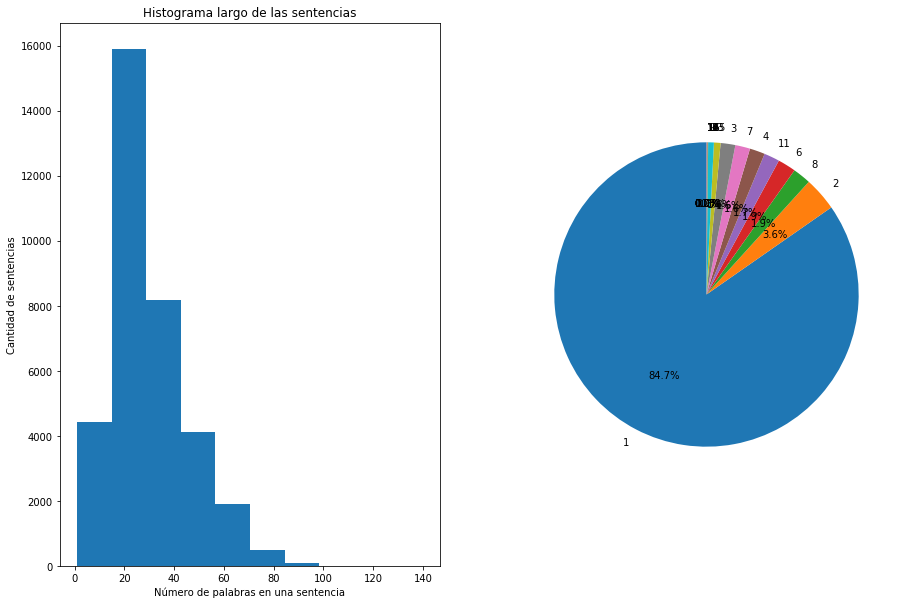

In [0]:
import matplotlib.pyplot as plt

lemma_df = dff.lemma.apply(lambda x: len(x))
tag_df = pd.value_counts(df.tag).to_frame()
labels = [index for index in tag_df.index]
tag = [tag for tag in tag_df.tag]

fig, ax = plt.subplots(1, 2,figsize=(15,10))

ax[0].hist(lemma_df)
ax[0].set_title("Histograma largo de las sentencias")
ax[0].set_ylabel("Cantidad de sentencias")
ax[0].set_xlabel("Número de palabras en una sentencia")

ax[1].pie(tag, labels=labels, autopct='%1.1f%%', startangle=90)

plt.show()


**¿Son todas las sentencias de igual tamaño? ¿Le hace sentido esto? ¿Las redes que conoce pueden manejar ejemplos de distintos tamaños, y si pueden que problemas podría traer? ¿Estan las clases repartidas de manera equitativa?**

Se puede observar el gráfico de barras que las sentencias no son de igual tamaño, lo cual tiene sentido.

Las redes que conocemos deben tener todos los inputs del mismo tamaños.

Se puede observar que las clases estan desbalanceadas. La clase "O" esta sobre-representada en el dataset.

In [0]:
from keras.preprocessing.sequence import pad_sequences
max_len = 100
x = pad_sequences(dff.lemma.values,
                  maxlen=max_len,
                  padding='post',
                  truncating='post'
)
y = pad_sequences(dff.tag.values,
                  maxlen=max_len,
                  padding='post',
                  truncating='post'
)

Using TensorFlow backend.


**¿Opinan que es deseable utilizar el valor 0 como codificación de palabras que "no existen", o creen que es irrelevante por ejemplo que su valor sea 1?**

Es deseable que el valor de las palabras "no existen" sea 0, puesto que, en caso contrario, se sobre-representaría alguna palabra.

In [0]:
print(x[1])
print(dff.lemma.iloc[1])
print(y[1])
print(dff.tag.iloc[1])

[23  2 24 25 12 10 26 27 10  9 28 29 30 31 32 33 34 35 36 37 38 39 35 14
 35 40 10 41 22 35 23  2 24 25 12 10 26 27 10  9 28 29 30 31 32 33 34 35
 36 37 38 39 35 14 35 40 10 41 22 35  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
[23  2 24 25 12 10 26 27 10  9 28 29 30 31 32 33 34 35 36 37 38 39 35 14
 35 40 10 41 22 35 23  2 24 25 12 10 26 27 10  9 28 29 30 31 32 33 34 35
 36 37 38 39 35 14 35 40 10 41 22 35]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1]


#### 1.d Even more encodding and preprocessing

Para la primera tarea, buscaremos realizar la predicción del tag, la cual es una variable categórica. Por lo tanto, como ya sabemos de la tarea anterior, resulta conveniente tener los _targets_ en _one hot vector_. 

Además debemos separar ambos conjuntos (`x` e `y`) en los conjuntos de entrenamiento y validación. 

Realice esto con las herramientas y proporciones que estime convenientes.

In [0]:
# do it yourself
from keras.utils import to_categorical

y = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

#### 1.e Primera red recurrente

Ahora entrenaremos una primera red recurrente LSTM. Explique la particularidad de estas redes y por qué podría comportarse bien para este tipo de problemas. 

La tarea de esta red será procesar la secuencia de _lemmas_ y predecir su _tag_. ¿Cuáles son las dimensiones de nuestro input y de nuestro output?

Considerando que si bien los _lemmas_ estan representados como enteros, esta representación no tiene ninguna relación con el "significado" de estos. Por eso, es recomendable utilizar otra representación que mejor extraiga la naturaleza "categorica" de estos, sin embargo por la cantidad de ejemplos que tenemos, no resultaría practico utilizar _one hot vector_, pues las dimensiones explotarían. Para esto, utilizaremos una primera capa que realiza una transformación entrenable entre el espacio discreto de la representación original y un _embedding_ en $\mathbb{R}^d$ donde $d$ corresponde a la dimensión de nuestro espacio de llegada.

Utilice un _embedding_ de dmensión 100, luego agregue una capa LSTM con 128 unidades y finalmente la capa densa de salida. Compile y entrene el modelo por al menos 10 epochs. Grafique el proceso de entrenamiento y evalue el desempeño final considerando alguna métrica relevante (F1 score, matriz de confusión, etc), considerando la repartición de clases que observó en la pregunta c.

**Explique la particularidad de estas redes y por qué podría comportarse bien para este tipo de problemas.**
- Redes recurrentes funcionan mejor con secuencias puesto que pueden recordar información de las entradas anteriores.
- Una red recurrente LSTM funciona mejor con secuencias largas puesto que tiene una memoria más larga.

**¿Cuáles son las dimensiones de nuestro input y de nuestro output?**

A priori el tamaño del input es: $\text{largo de la sentencia }*(\text{ cantidad de lemmas}+1)$. Esto es porque lemma es una variable categorica.

El output a priori es: $\text{cantidad de tags}+1$.

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, CuDNNLSTM

n_lemmas = len(lemma_to_code)+1
embedding_dim = 100
n_labels = len(tag_to_code)+1

In [0]:
ltsm = Sequential()

ltsm.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

ltsm.add(LSTM(units=128,return_sequences=True)) # You can use CuDNNLSTM if you have a CUDA enabled GPU for faster performance

ltsm.add(Dense(n_labels, activation='softmax'))

ltsm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h = ltsm.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 24623 samples, validate on 10554 samples
Epoch 1/10





24623/24623 [==============================] - 81s 3ms/step - loss: 0.5345 - acc: 0.8981 - val_loss: 0.2255 - val_acc: 0.9538
Epoch 2/10
24623/24623 [==============================] - 80s 3ms/step - loss: 0.1610 - acc: 0.9582 - val_loss: 0.1252 - val_acc: 0.9635
Epoch 3/10
24623/24623 [==============================] - 80s 3ms/step - loss: 0.1049 - acc: 0.9702 - val_loss: 0.0917 - val_acc: 0.9766
Epoch 4/10
24623/24623 [==============================] - 80s 3ms/step - loss: 0.0722 - acc: 0.9816 - val_loss: 0.0681 - val_acc: 0.9823
Epoch 5/10
24623/24623 [==============================] - 79s 3ms/step - loss: 0.0545 - acc: 0.9855 - val_loss: 0.0595 - val_acc: 0.9836
Epoch 6/10
24623/24623 [==============================] - 79s 3ms/step - loss: 0.0461 - acc: 0.9871 - val_loss: 0.0564 - val_acc: 0.9839
Epoch 7/10
24623/24623

In [0]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns

def history(h,title):
  fig, ax = plt.subplots(1, 2,figsize=(15,5))
  fig.suptitle(title, fontsize=16)
  ax[0].plot(h.history['val_acc'], label="val_acc")
  ax[0].plot(h.history['acc'], label="acc")
  ax[0].set_title("Accuracy vs Epoch", fontsize=20)
  ax[0].set_xlabel("Epoch")
  ax[0].set_ylabel("Accuracy")
  ax[0].legend()

  ax[1].plot(h.history['val_loss'], label="val_loss")
  ax[1].plot(h.history['loss'], label="loss")
  ax[1].set_title("Crossentropy loss vs Epoch", fontsize=20)
  ax[1].set_xlabel("Epoch")
  ax[1].set_ylabel("Crossentropy loss")
  ax[1].legend()
  plt.show()

def conf_matrix(model, x_val, y_val, label, title):
  y_pred = model.predict(x_val)
  y_pred = y_pred.reshape(y_pred.shape[0]*y_pred.shape[1],y_pred.shape[2])
  y_val = y_val.reshape(y_val.shape[0]*y_val.shape[1],y_val.shape[2])
  
  plt.figure(figsize=(25,15))
  ax = plt.subplot()
  sns.heatmap(confusion_matrix([np.where(r==1)[0][0] for r in y_val] ,[np.where(r==max(r))[0][0] for r in y_pred]),annot=True, ax = ax)

  ax.set_xlabel('Predicted labels');
  ax.set_ylabel('True labels'); 
  ax.set_title(title); 
  ax.xaxis.set_ticklabels(label); 
  ax.yaxis.set_ticklabels(label);

  plt.show()

labels = [label for label in tag_to_code]
labels.insert(0,"nan")

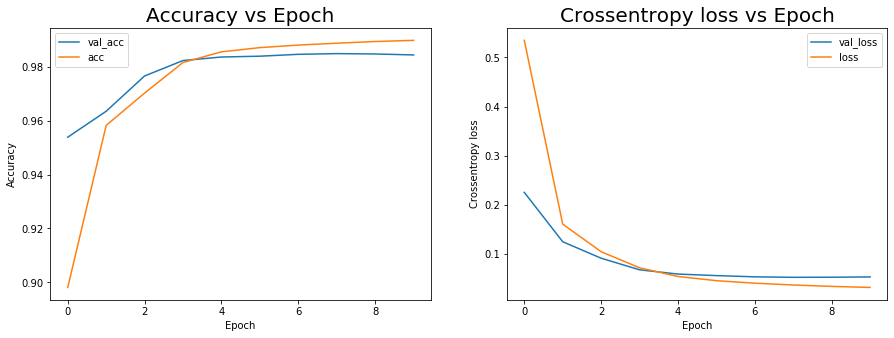

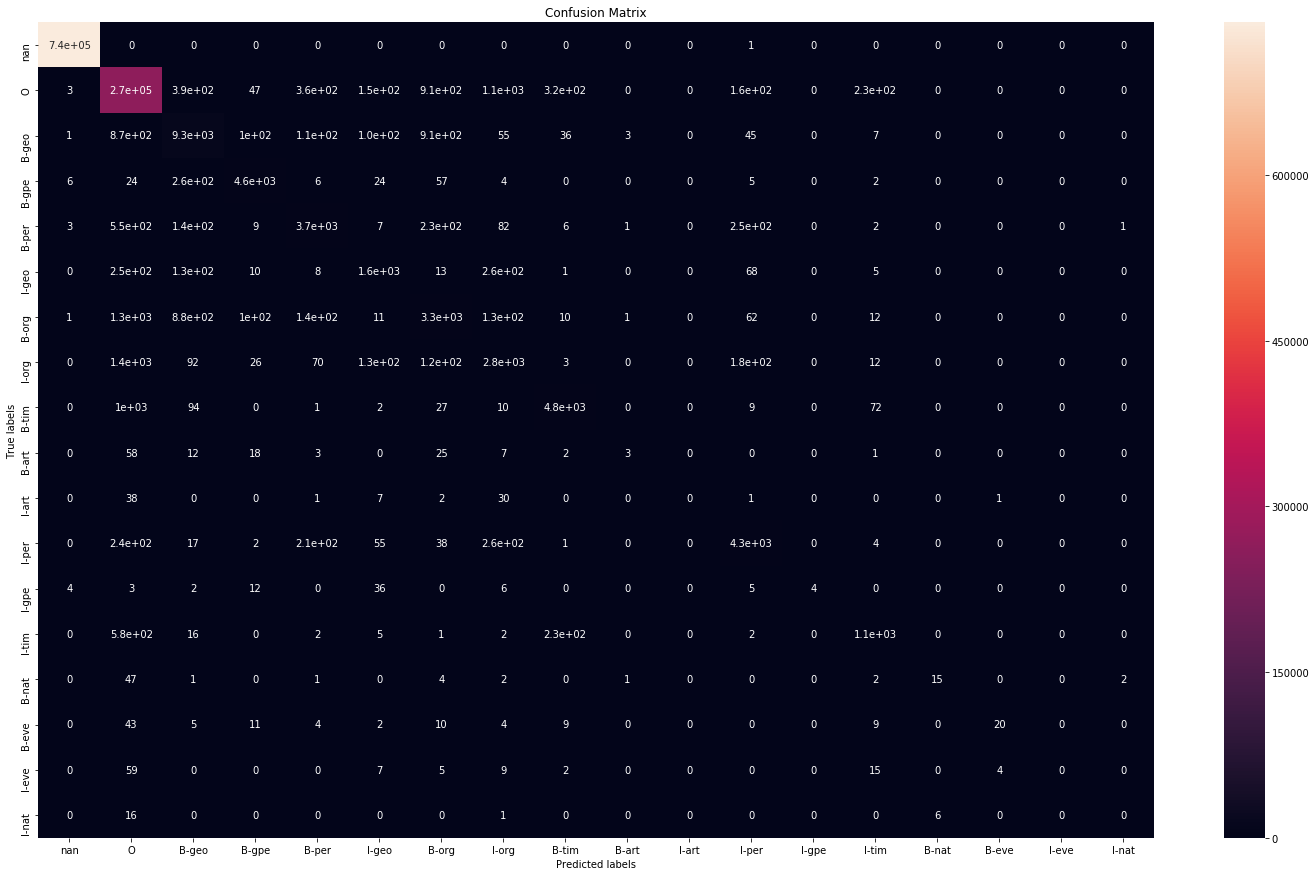

In [0]:
history(h)
conf_matrix(ltsm,x_val,y_val,labels)

#### 1.f Comparación con otras aproximaciones. 

Ahora entrenaremos dos redes más para comparar los desempeños de la red recurrente. Para esto entrenaremos una red convolucional 1-dimensional y una red densa. Discuta las diferencias entre ambas redes y la red recurrente, y cual cree a priori se adecua mejor a la naturaleza del problema. 

Defina y entrene luego las redes con la misma primera capa de encodding y las siguientes configuraciones:
* Convolucional: 2 capas conv1d con 128 filtros y kernel de tamaño 5
* Densa: 2 capas densas de 128 unidades

Compare los desempeños de las 3 redes en el problema su métrica preferida

**Discuta las diferencias entre ambas redes y la red recurrente, y cual cree a priori se adecua mejor a la naturaleza del problema.**

Una red convolucional extrae información en base a subsecuencias de la secuencia original, por lo que extrae información acerca de la posición en la secuencia. Por otro lado 
una red recurrente pondera las entradas anteriores de la secuencia, por lo que puede asignar un mayor valor a las entradas anteriores, a diferencia de la red convolucional que resume la secuencia, obeteniendo los atributos más importantes. Por último una red deep clásica a priori no aprende la relación entre los valores de la secuencia, por lo que debería tener un peor desempeño.

In [0]:
from keras.layers import Conv1D
conv = Sequential()

conv.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

conv.add(Conv1D(128, 5, activation='relu', padding='same'))

conv.add(Conv1D(128, 5, activation='relu', padding='same'))

conv.add(Dense(n_labels, activation='softmax'))

conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h_conv = conv.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 70s 3ms/step - loss: 0.3098 - acc: 0.9534 - val_loss: 0.0930 - val_acc: 0.9734
Epoch 2/10
24623/24623 [==============================] - 69s 3ms/step - loss: 0.0601 - acc: 0.9833 - val_loss: 0.0507 - val_acc: 0.9858
Epoch 3/10
24623/24623 [==============================] - 69s 3ms/step - loss: 0.0365 - acc: 0.9893 - val_loss: 0.0459 - val_acc: 0.9868
Epoch 4/10
24623/24623 [==============================] - 70s 3ms/step - loss: 0.0282 - acc: 0.9915 - val_loss: 0.0459 - val_acc: 0.9869
Epoch 5/10
24623/24623 [==============================] - 70s 3ms/step - loss: 0.0233 - acc: 0.9927 - val_loss: 0.0477 - val_acc: 0.9868
Epoch 6/10
24623/24623 [==============================] - 70s 3ms/step - loss: 0.0197 - acc: 0.9937 - val_loss: 0.0522 - val_acc: 0.9866
Epoch 7/10
24623/24623 [==============================] - 70s 3ms/step - loss: 0.0167 - acc: 0.9947 - val_loss: 0.0536 - val_acc

In [0]:
dense = Sequential()

dense.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

dense.add(Dense(128, activation='relu'))

dense.add(Dense(128, activation='relu'))

dense.add(Dense(n_labels, activation='softmax'))

dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h_dense = dense.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128)

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 26s 1ms/step - loss: 0.4791 - acc: 0.9505 - val_loss: 0.0947 - val_acc: 0.9773
Epoch 2/10
24623/24623 [==============================] - 25s 1ms/step - loss: 0.0749 - acc: 0.9800 - val_loss: 0.0720 - val_acc: 0.9799
Epoch 3/10
24623/24623 [==============================] - 25s 1ms/step - loss: 0.0610 - acc: 0.9822 - val_loss: 0.0696 - val_acc: 0.9798
Epoch 4/10
24623/24623 [==============================] - 26s 1ms/step - loss: 0.0571 - acc: 0.9827 - val_loss: 0.0692 - val_acc: 0.9800
Epoch 5/10
24623/24623 [==============================] - 25s 1ms/step - loss: 0.0555 - acc: 0.9828 - val_loss: 0.0691 - val_acc: 0.9801
Epoch 6/10
24623/24623 [==============================] - 25s 1ms/step - loss: 0.0544 - acc: 0.9828 - val_loss: 0.0691 - val_acc: 0.9802
Epoch 7/10
24623/24623 [==============================] - 25s 1ms/step - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0694 - val_acc

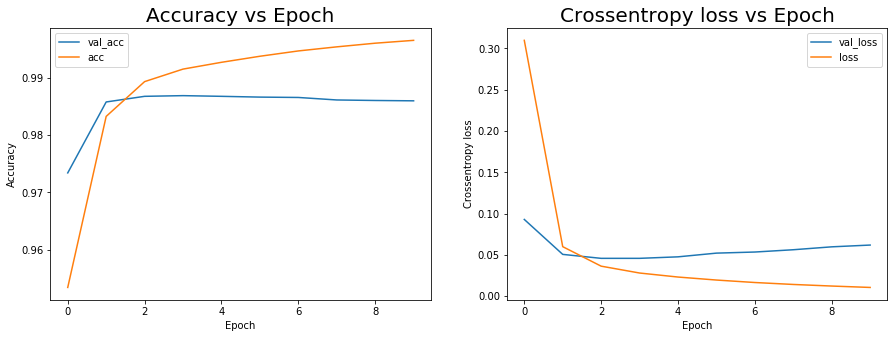

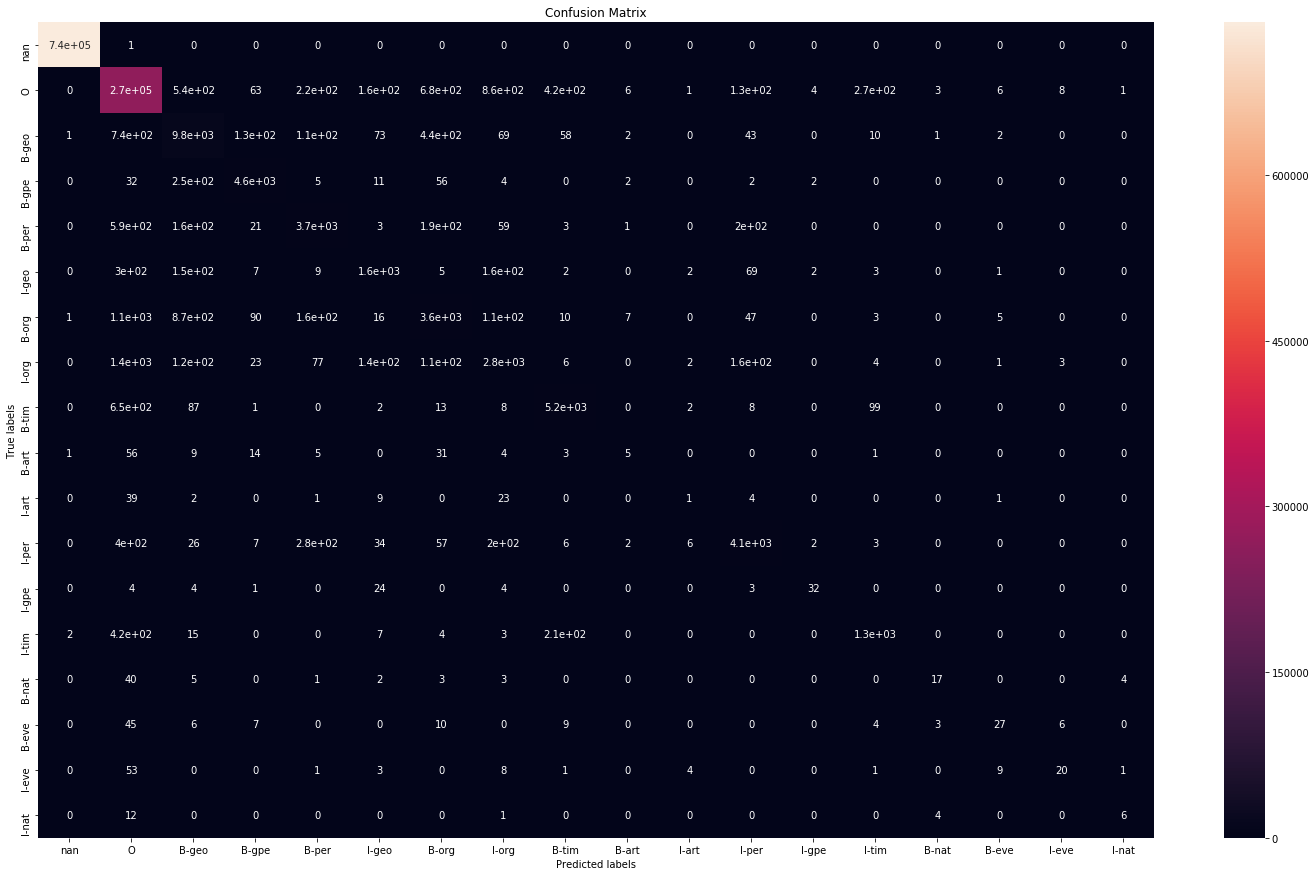

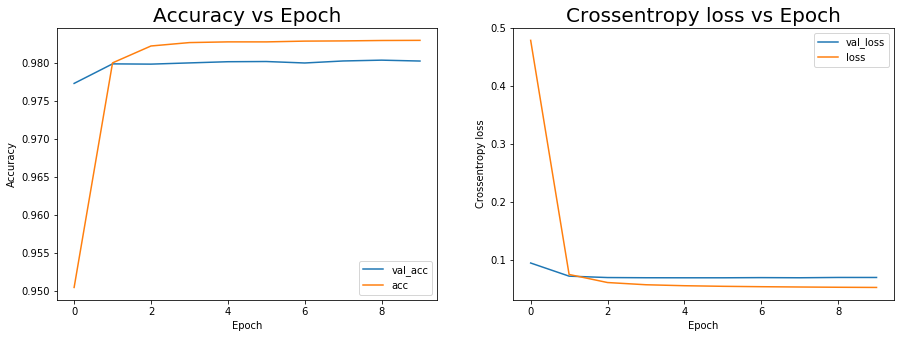

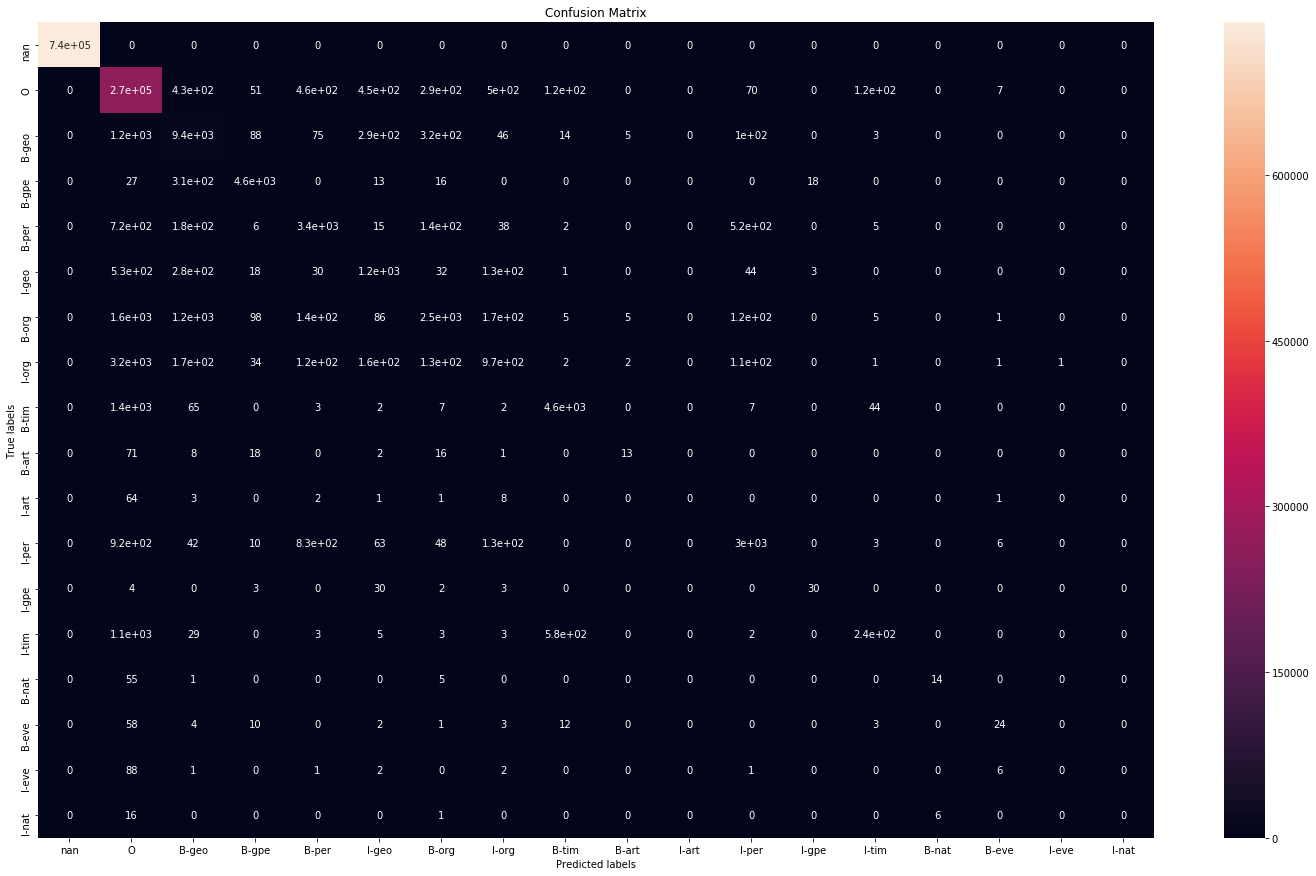

In [0]:
history(h_conv)
conf_matrix(conv,x_val,y_val,labels)

history(h_dense)
conf_matrix(dense,x_val,y_val,labels)

**Compare los desempeños de las 3 redes en el problema su métrica preferida**

Se puede observar que las 3 redes tienen un accuracy parecido, sin embargo esta medida esta sesgada, puesto que existe un desbalanceo de clases que oculta el mal desempeño en el reconocimiento de algunas clases. Mediante la matriz de confusión se puede observar que las redes tienen un desempeño más o menos parecido, sin embargo la red deep tiende a confudir más las clases menos representadas con la clase más representada. Por último la red convolucional es la que mejor logra diferenciar las clases menos representadas, superando a la red recurrente.

#### 1.g Red más profunda o bidireccional

Una pregunta natural que surge es saber que ocurre al aumentar la profundidad de la red, o por ejemplo porqué solo se recorre el _input_ en la dirección original. Considerando el tiempo acotado de este semestre, pueden elegir realizar una de las dos exploraciones solamente. 

* Profundidad: Entrene un par de redes con más capas LSTM y grafique como se comporta el desempeño a medida se aumenta la profundidad
* Bidireccional: Varie la cantidad de unidades (a lo menos 4 valores distintos) de la capa LSTM y compare con la red utilizando capas LSTM bidireccionales (como muestra el código). Comente sobre el número de parámetros en ambos casos.

In [0]:
h = list()
for i in range(1,5):
  ltsm = Sequential()

  ltsm.add(Embedding(input_dim=n_lemmas, output_dim=embedding_dim, input_length=max_len))

  for j in range(i):
    ltsm.add(LSTM(units=int(128/(j+1)),return_sequences=True)) # You can use CuDNNLSTM if you have a CUDA enabled GPU for faster performance
  
  ltsm.add(Dense(n_labels, activation='softmax'))

  ltsm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  h.append((ltsm.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128), ltsm))

Train on 24623 samples, validate on 10554 samples
Epoch 1/10
24623/24623 [==============================] - 84s 3ms/step - loss: 0.5143 - acc: 0.9006 - val_loss: 0.2177 - val_acc: 0.9538
Epoch 2/10
24623/24623 [==============================] - 81s 3ms/step - loss: 0.1517 - acc: 0.9598 - val_loss: 0.1168 - val_acc: 0.9669
Epoch 3/10
24623/24623 [==============================] - 81s 3ms/step - loss: 0.0903 - acc: 0.9764 - val_loss: 0.0771 - val_acc: 0.9809
Epoch 4/10
24623/24623 [==============================] - 81s 3ms/step - loss: 0.0611 - acc: 0.9844 - val_loss: 0.0635 - val_acc: 0.9833
Epoch 5/10
24623/24623 [==============================] - 81s 3ms/step - loss: 0.0491 - acc: 0.9866 - val_loss: 0.0568 - val_acc: 0.9842
Epoch 6/10
24623/24623 [==============================] - 81s 3ms/step - loss: 0.0428 - acc: 0.9877 - val_loss: 0.0543 - val_acc: 0.9845
Epoch 7/10
24623/24623 [==============================] - 81s 3ms/step - loss: 0.0388 - acc: 0.9883 - val_loss: 0.0531 - val_acc

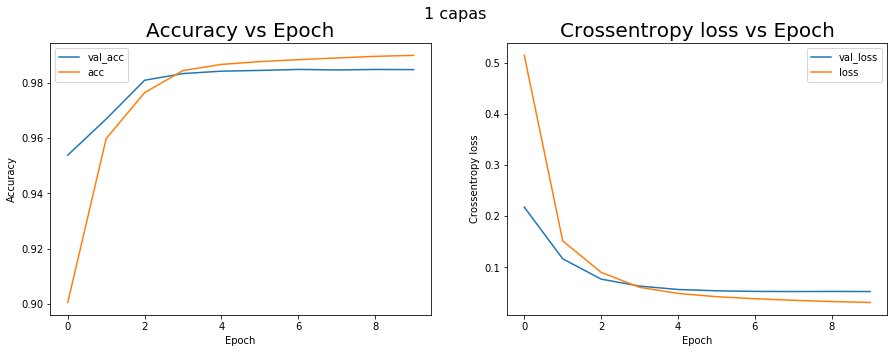

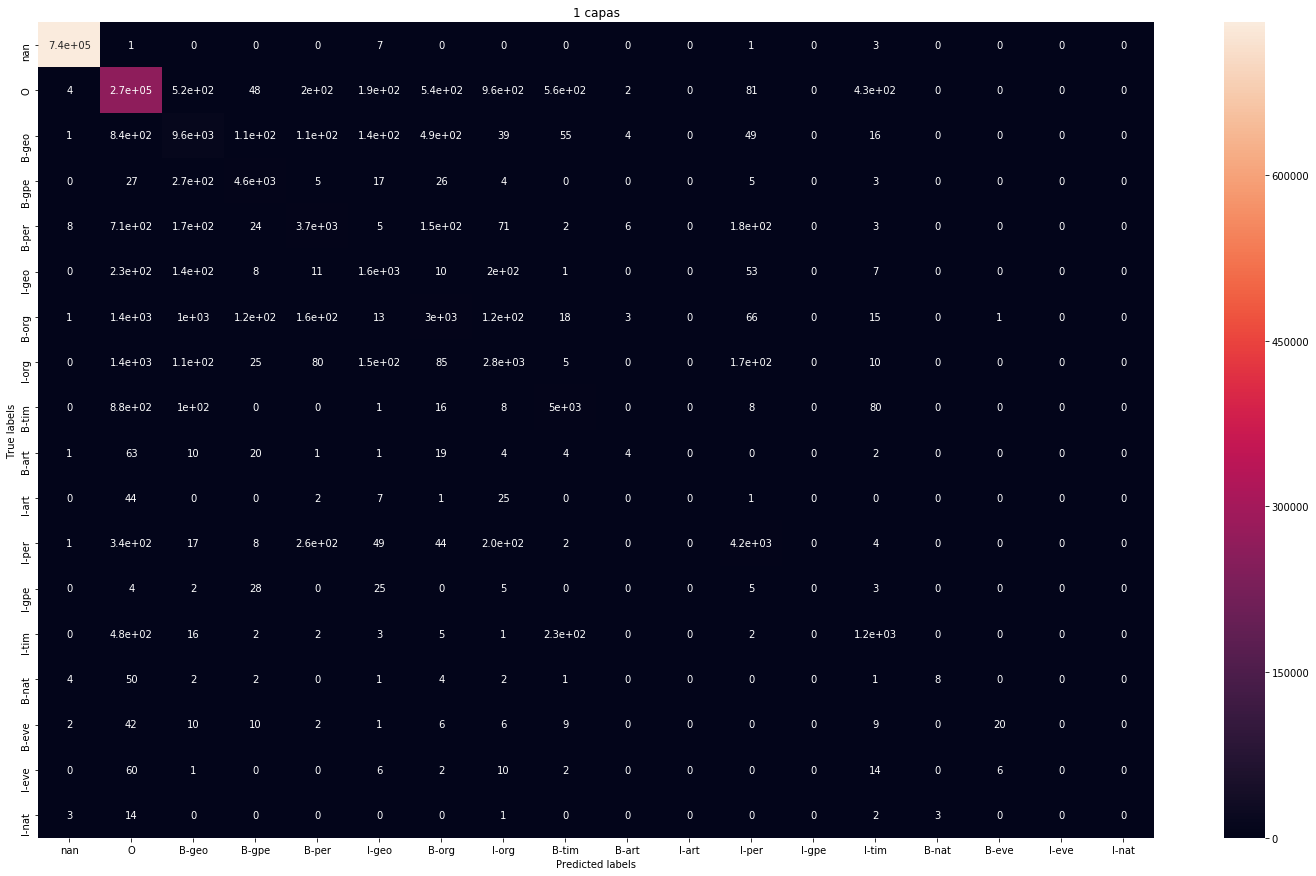

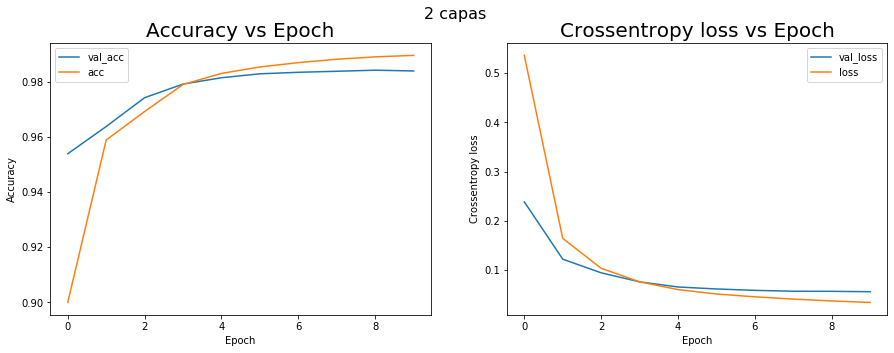

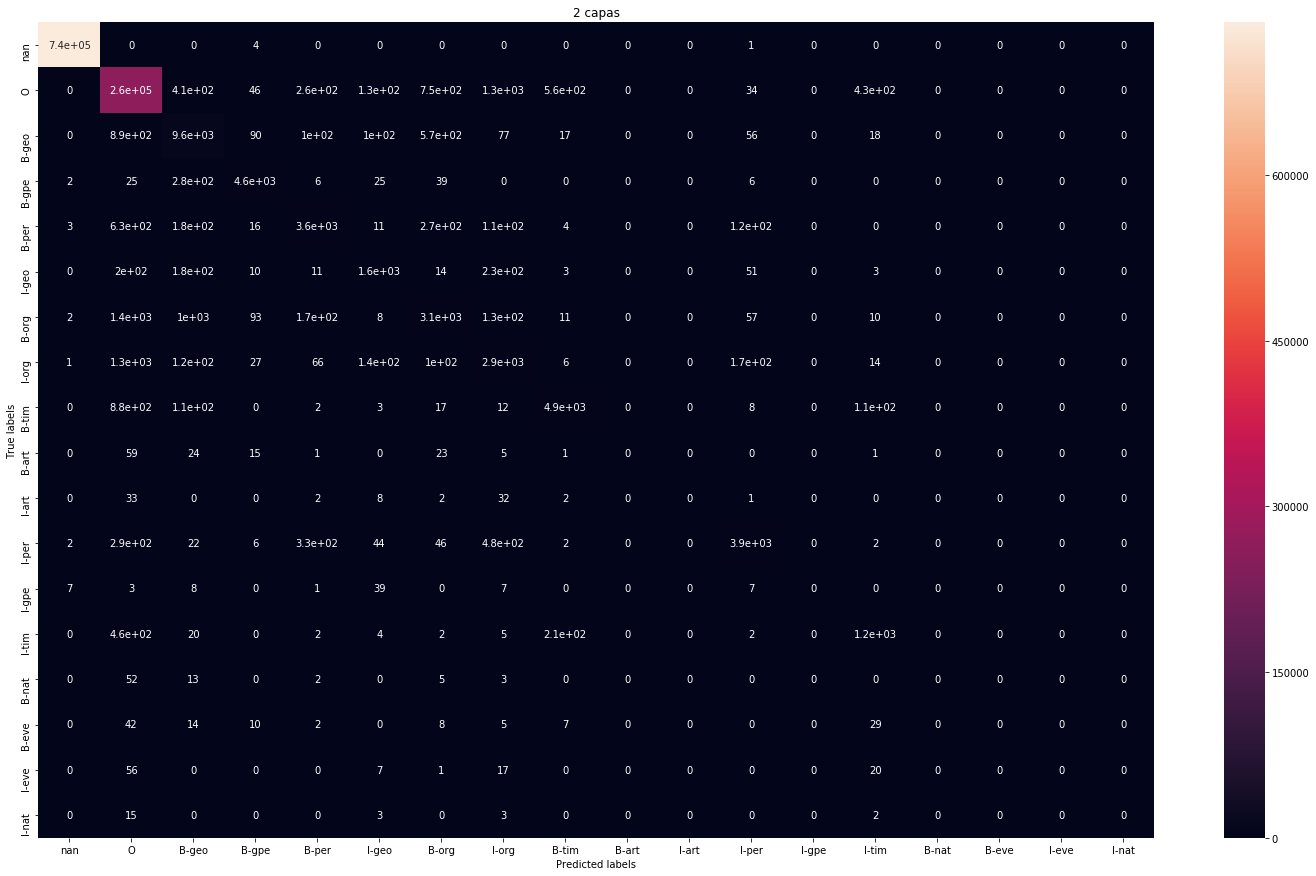

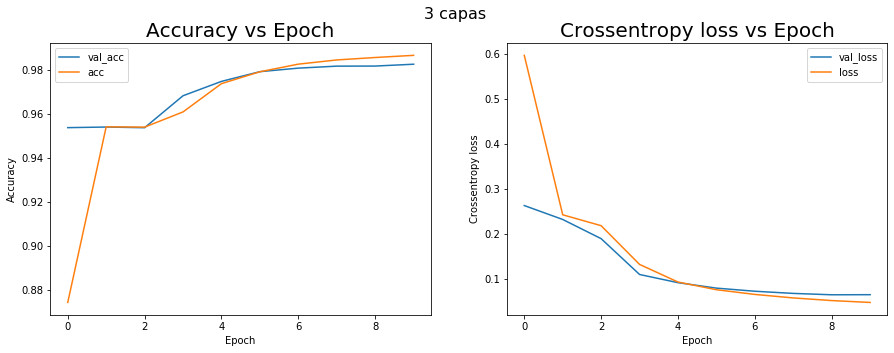

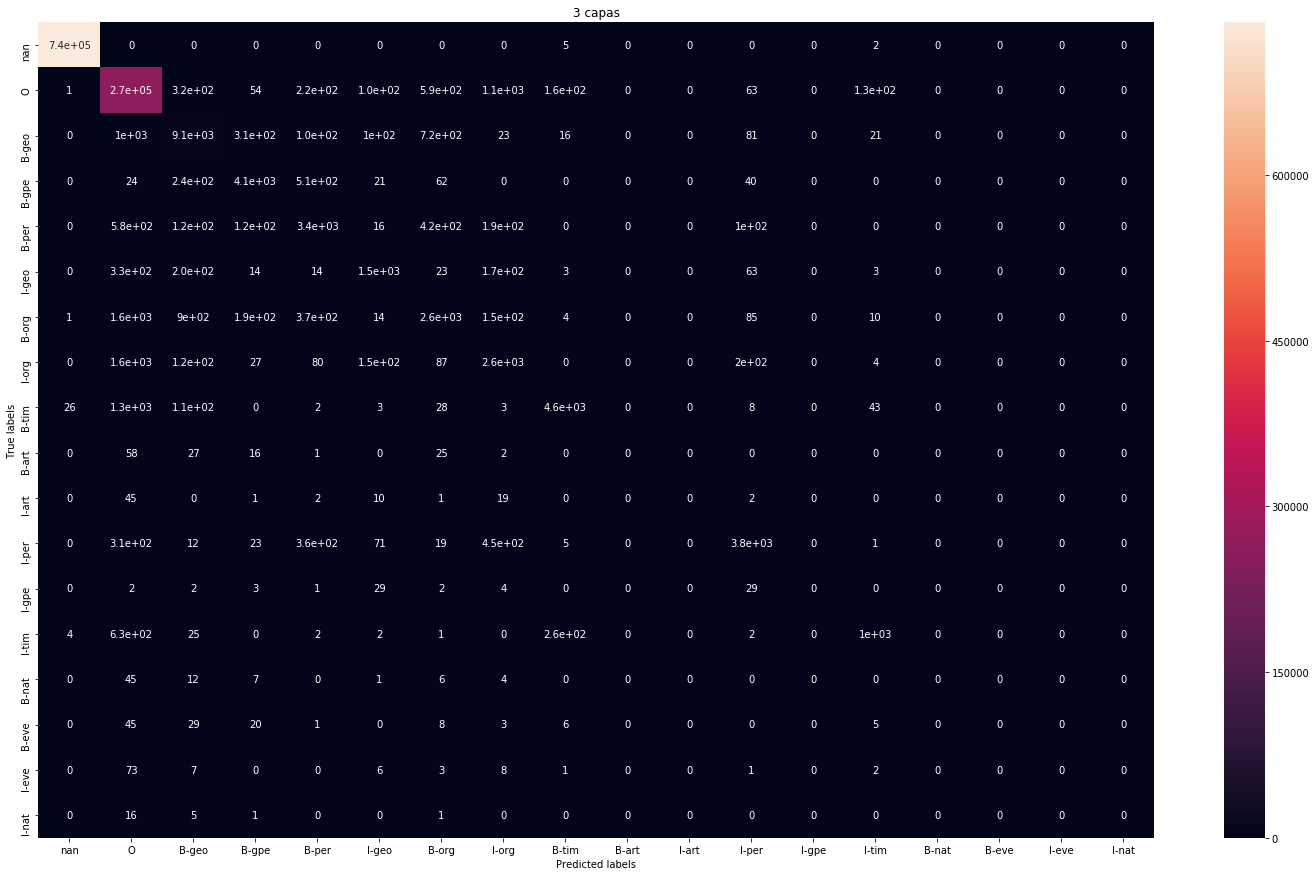

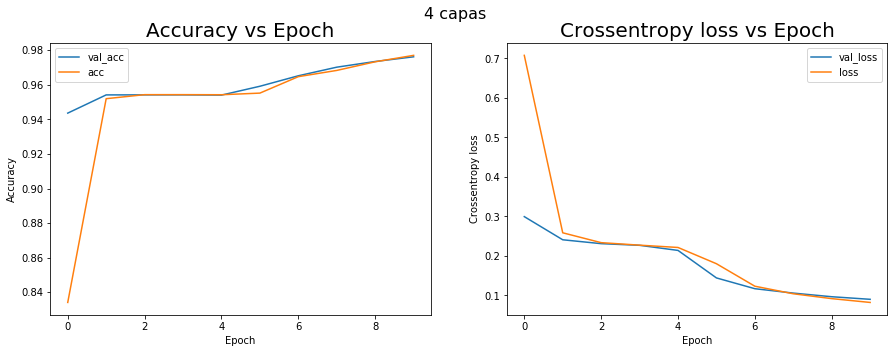

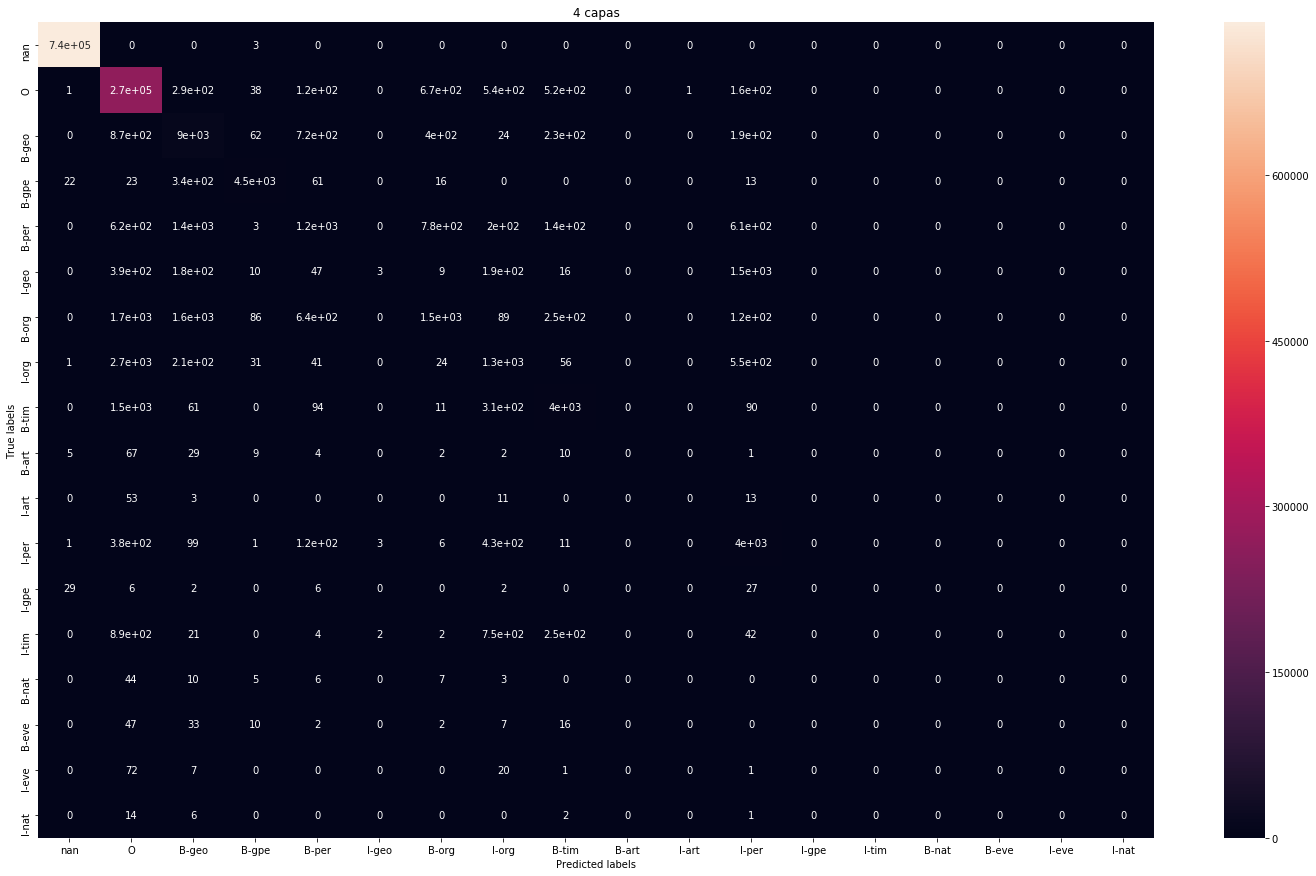

In [0]:
i = 1
for his,model in h:
  history(his, str(i) + ' capas')
  conf_matrix(model,x_val,y_val,labels,str(i)+' capas')
  i+=1

Se puede observar que a medida que aumenta la cantidad de capas la red empeora, puesto que cada vez logra clasificar menos clases minoriatrias.

#### 1.h Dimensión del Embedding

Como podrán haber notado, gran parte de los parámetros entrenables se encuentran en el embedding. Elija una de las redes entrenadas anteriormente y varíe la dimensión del embedding en un conjunto de potencias de 2 que le parezca razonable (a lo menos 6 valores). Comente sus observaciones.

In [0]:
h = list()
for i in range(3,9):
  ltsm = Sequential()
  
  ltsm.add(Embedding(input_dim=n_lemmas, output_dim=2**i, input_length=max_len))

  ltsm.add(LSTM(units=128,return_sequences=True))
  
  ltsm.add(Dense(n_labels, activation='softmax'))

  ltsm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  h.append((ltsm.fit(x_tr,y_tr, validation_data=(x_val,y_val), epochs=10, batch_size=128), ltsm))






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 24623 samples, validate on 10554 samples
Epoch 1/10





24623/24623 [==============================] - 50s 2ms/step - loss: 0.6959 - acc: 0.8394 - val_loss: 0.3236 - val_acc: 0.9423
Epoch 2/10
24623/24623 [==============================] - 40s 2ms/step - loss: 0.2754 - acc: 0.9498 - val_loss: 0.2477 - val_acc: 0.9535
Epoch 3/10
24623/24623 [==============================] - 40s 2ms/step - loss: 0.2205 - acc: 0.9537 - val_loss: 0.1842 - val_acc: 0.9538
Epoch 4/10
24623/24623 [==============================] - 40s 2ms/step - loss: 0.1489 - acc: 0.9583 - val_loss: 0.1299 - val_acc: 0.9624
Epoch 5/10
24623/24623 [==============================] - 40s 2ms/step - loss: 0.1153 - acc: 0.9661 - val_loss: 0.1098 - val_acc: 0.9693
Epoch 6/10
24623/24623 [==============================] - 40s 2ms/step - loss: 0.0958 - acc: 0.9727 - val_loss: 0.0925 - val_acc: 0.9751
Epoch 7/10
24623/2462

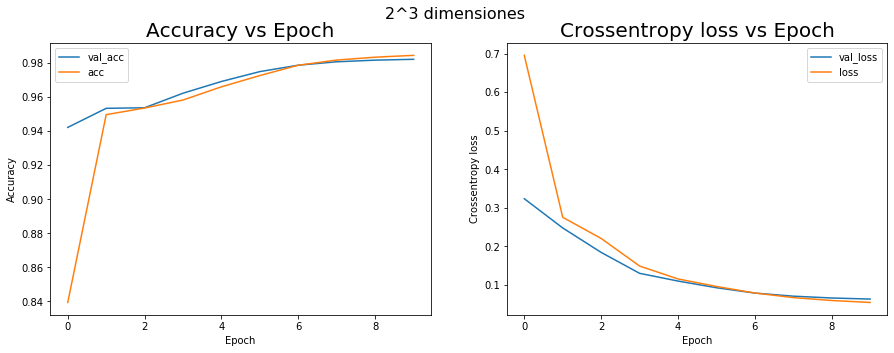

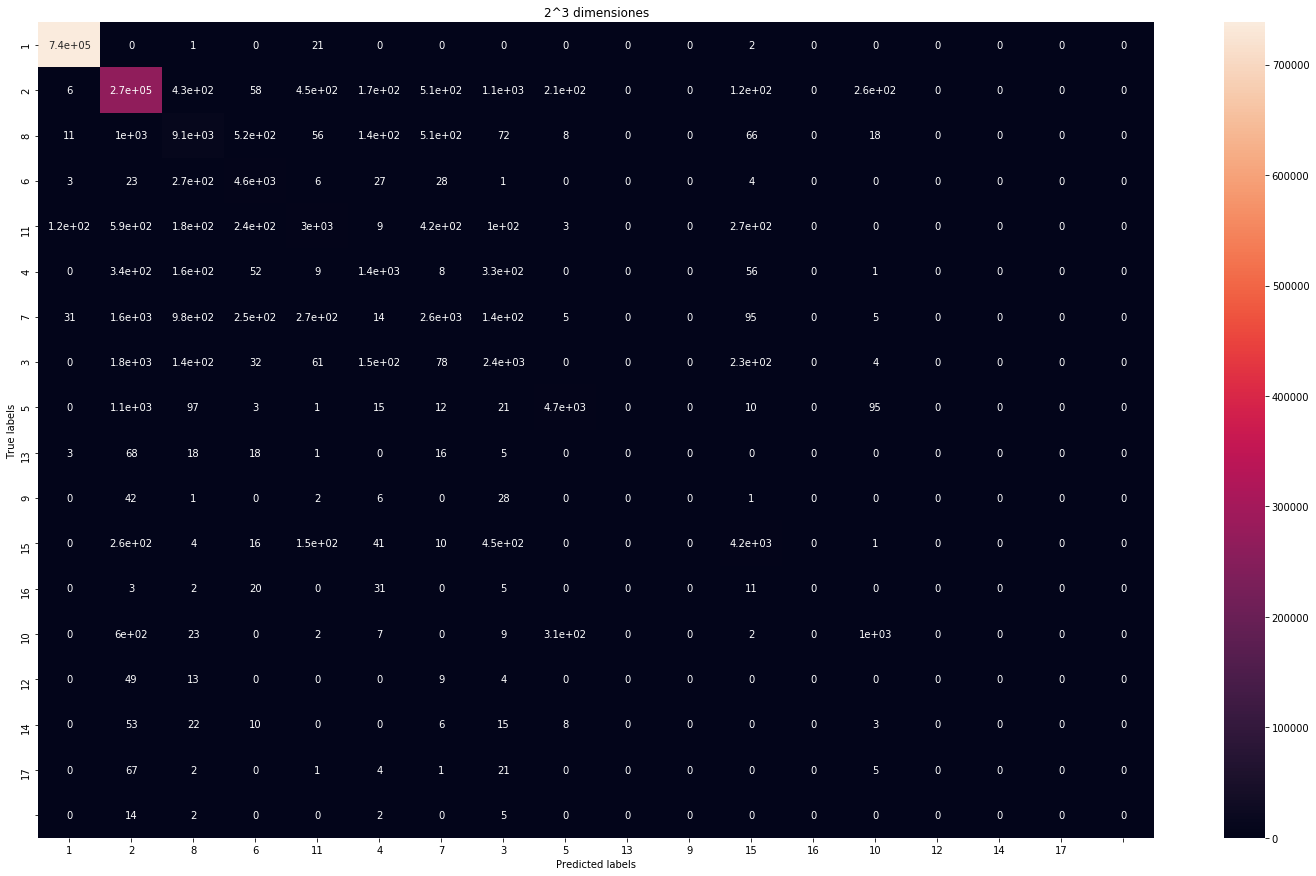

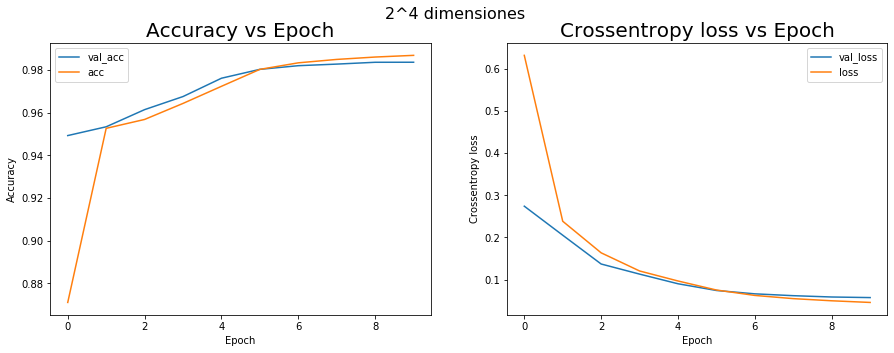

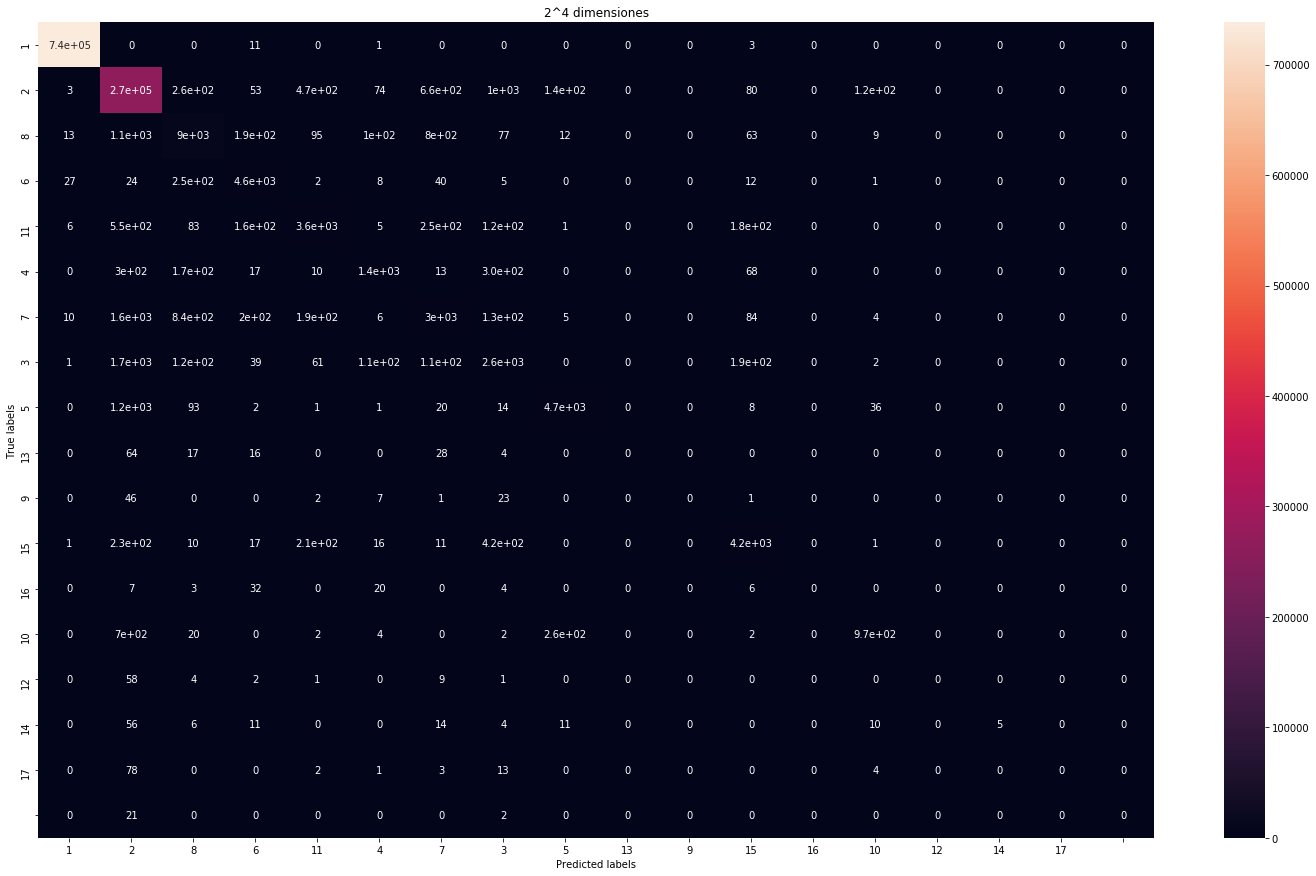

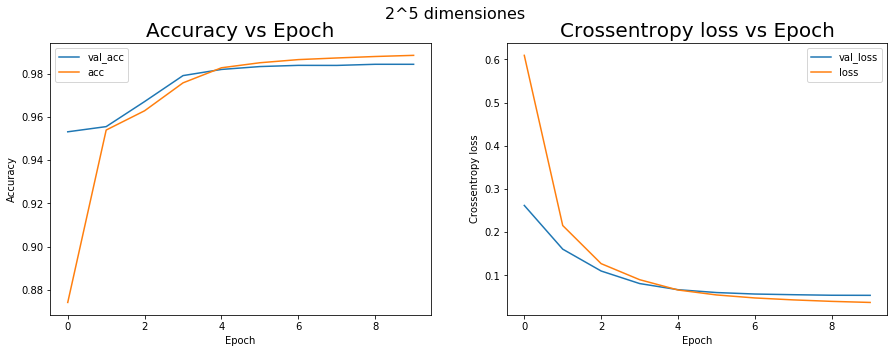

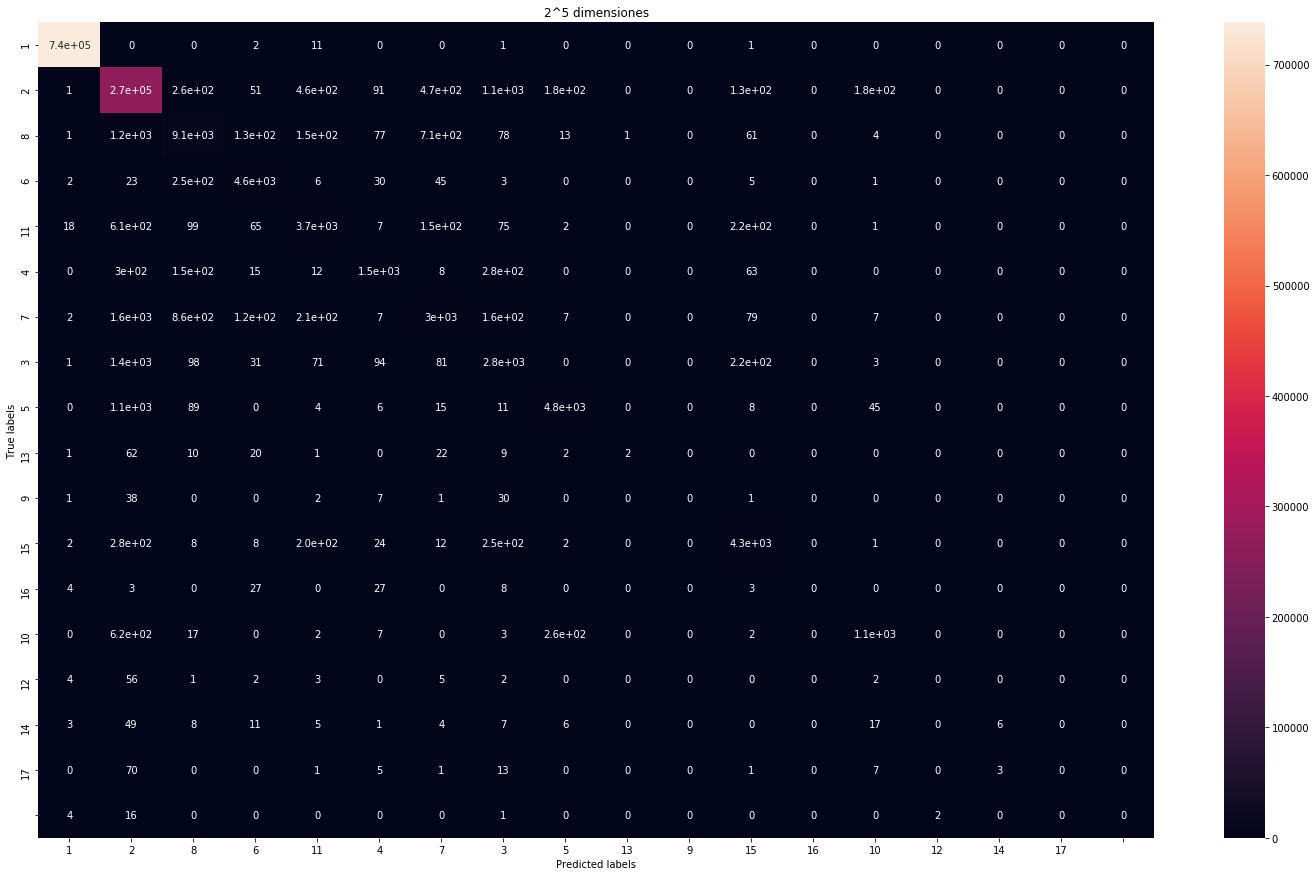

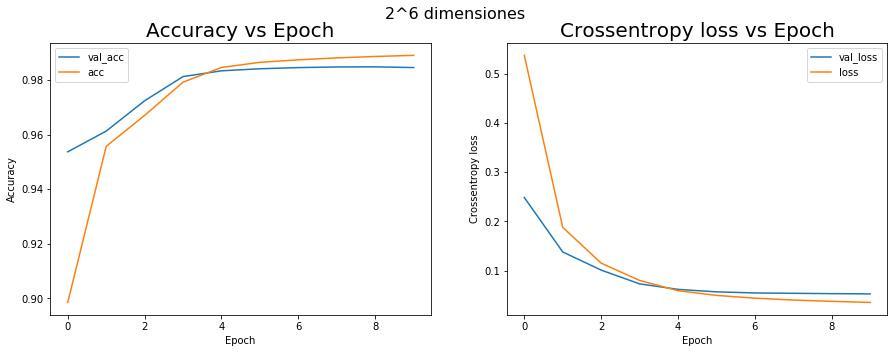

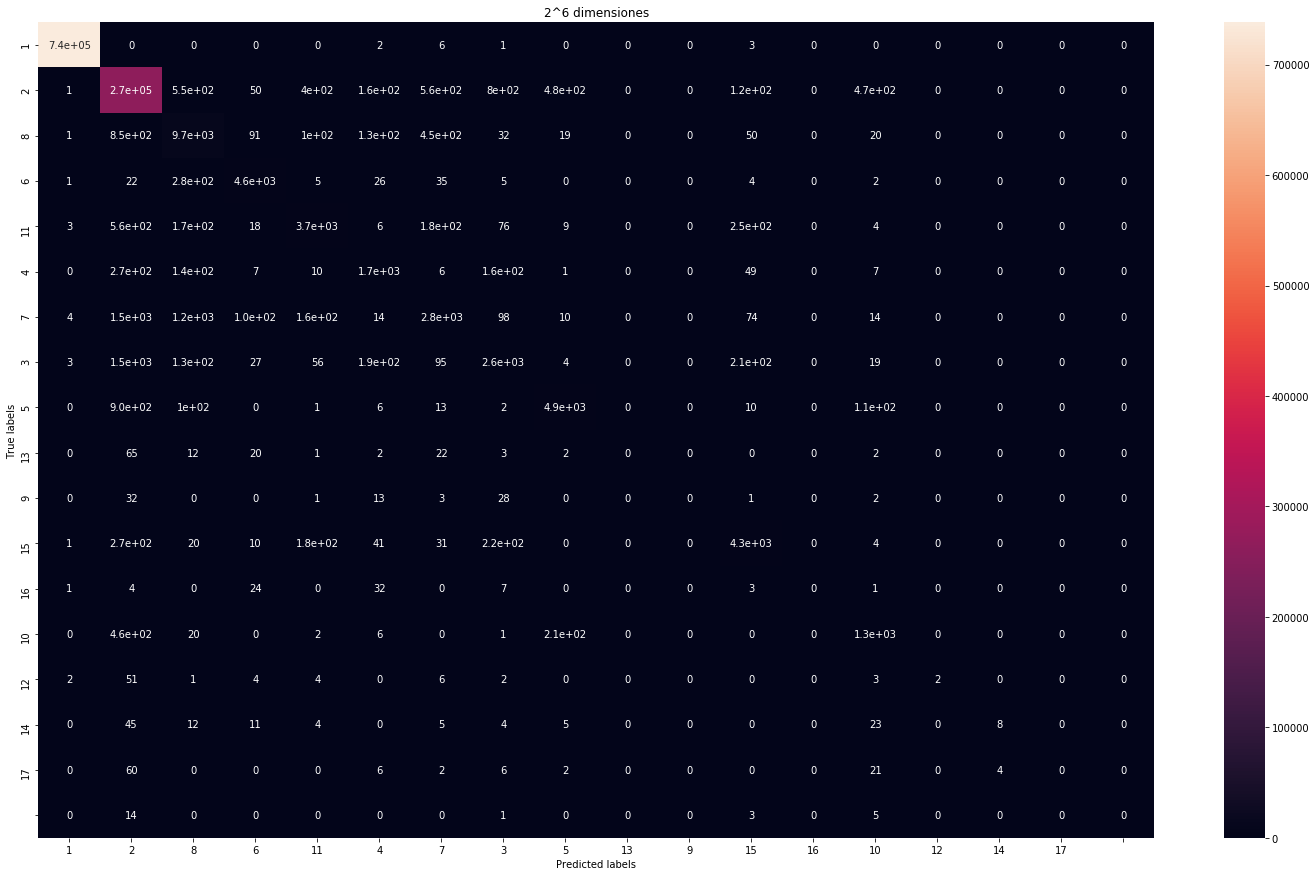

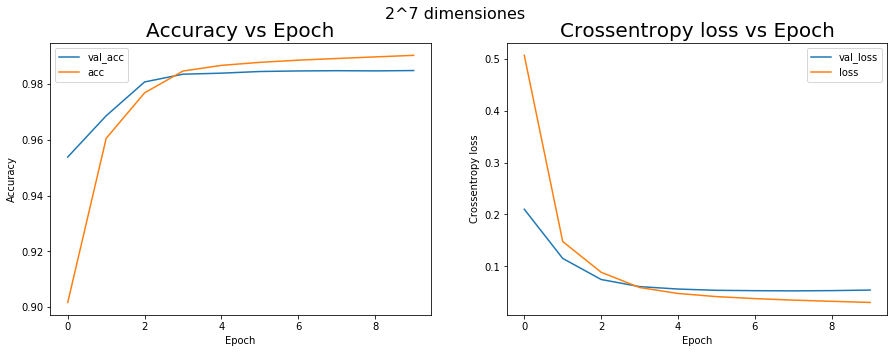

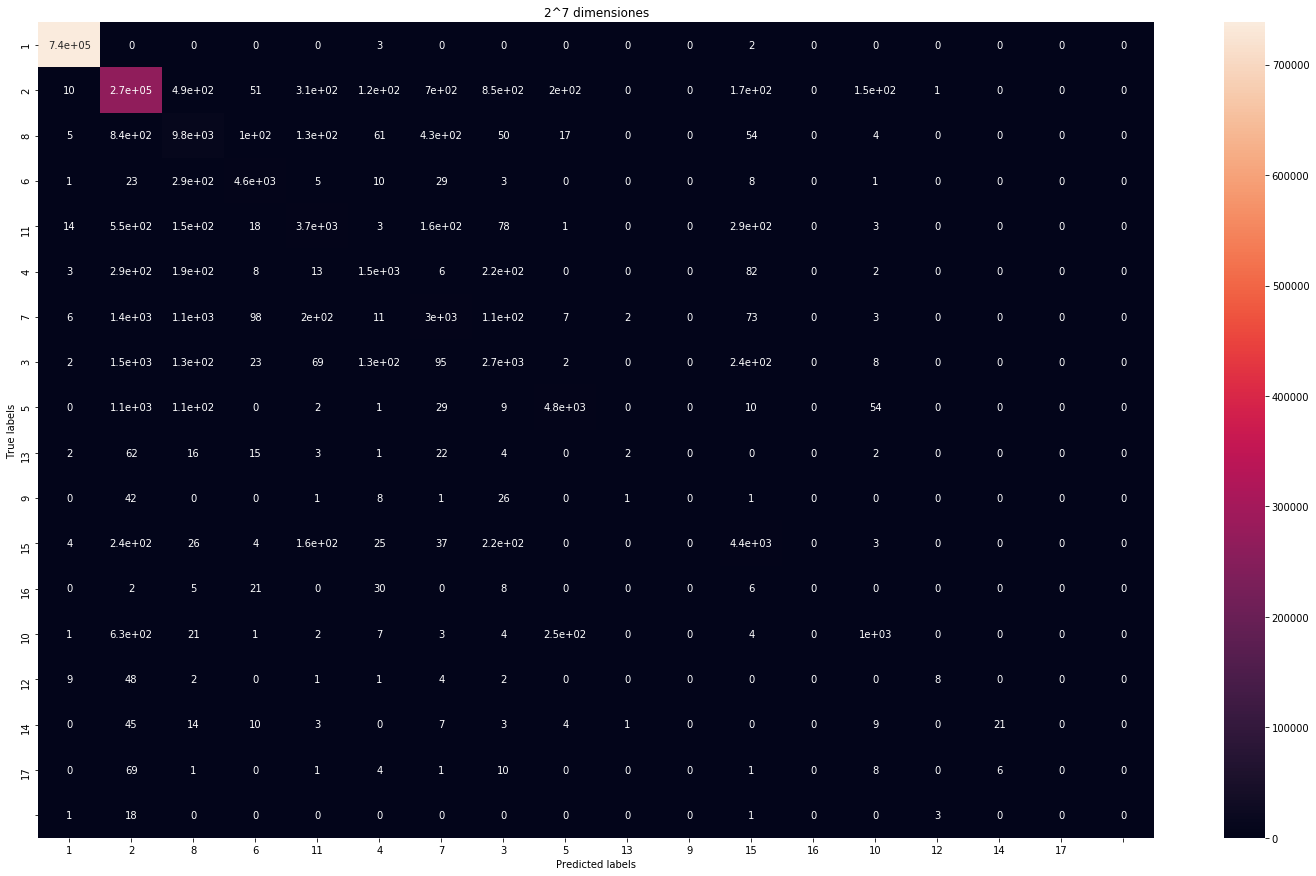

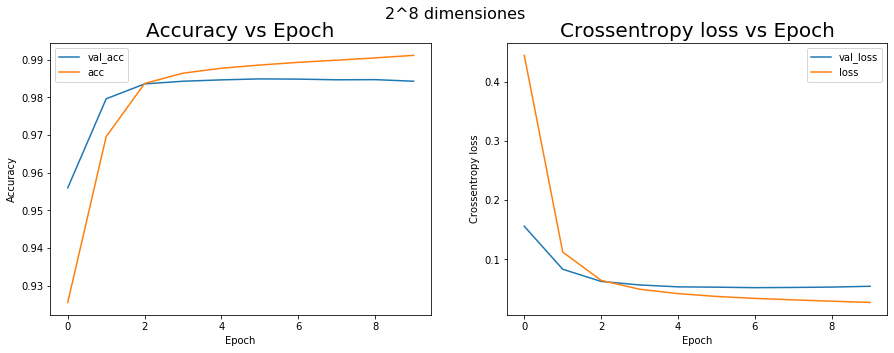

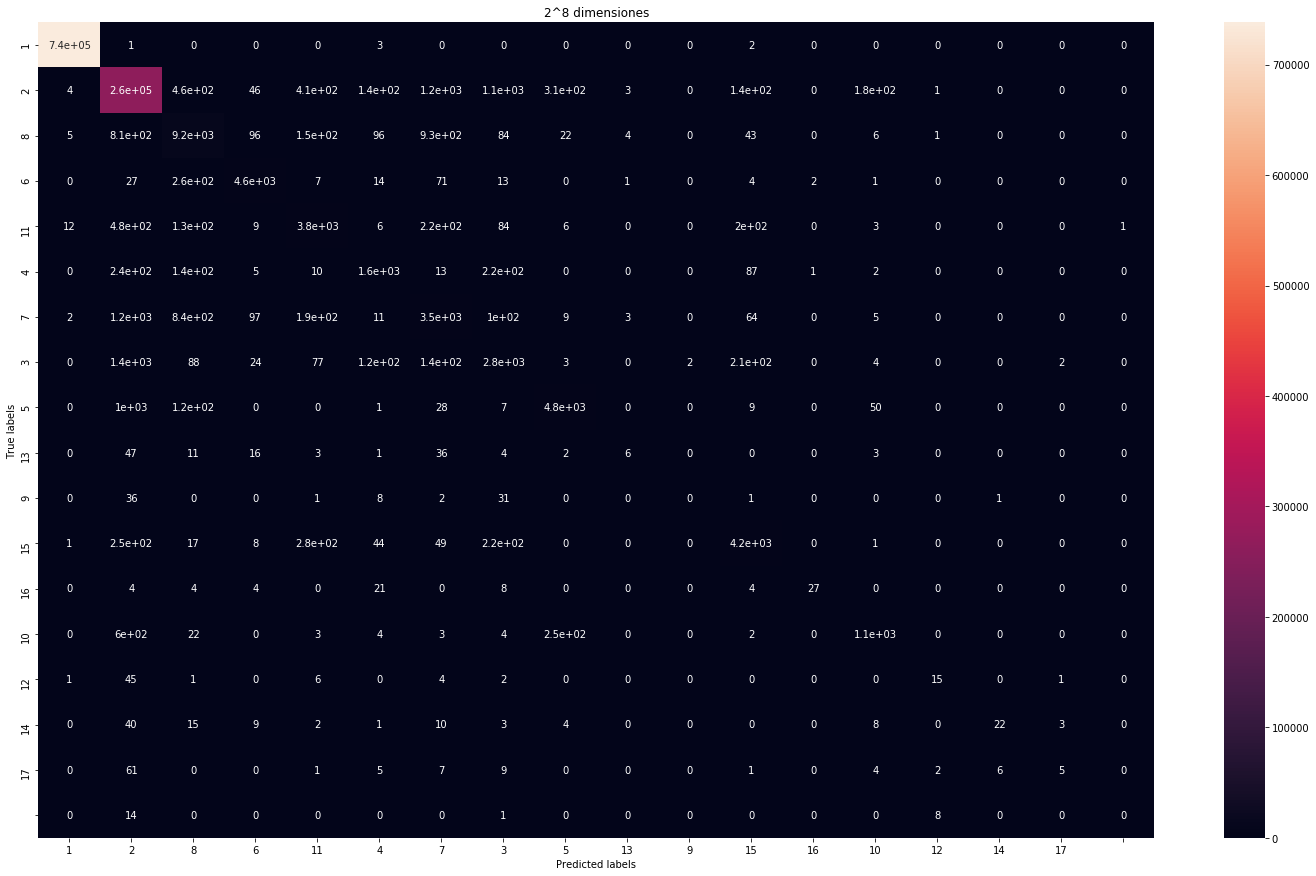

In [0]:
i = 3
for his,model in h:
  history(his, '2^'+str(i) + ' dimensiones')
  conf_matrix(model,x_val,y_val,labels,'2^'+str(i)+' dimensiones')
  i+=1

**Comente sus observaciones.**

Se puede observar que a medida que aumenta las dimensiones del embedding el modelo mejora, reconociendo de mejora manera las clases menos representadas.

#### 1.i Escribamos palabras - Datasest

Ahora buscaremos otra aplicación a las redes recurrentes, predecir el caracter siguiente. Si logramos entrenar una red que sea buena en esta tarea, podremos escribir texto automáticamente, pues podemos, a partir de una frase, predecir el caracter siguiente, y luego introducir la nueva frase sin el primer caracter en la red nuevamente, e iterando así escribir automáticamente. Si bien las redes recurrentes son adecuadas para esta tarea, no pretendemos entrenar un _Shakespeare_ en esta tarea, sin embargo es interesante investigar qué tan verosimil o no puede lograr ser el texto generado. 

Para esto, primero crearmos nuestro nuevo dataset. Para esta tarea preferiremos unir todas las frases en un solo gran corpus y luego crear nuevas secuencias semi redundantes. Esto nos evita primero el problema de tener que hacer padding, pues crearemos todas las entradas iguales, pero también nos permite aprovechar mejormente el dataset, de cierta forma aumentando el número de datos. El _target_ en este caso será solo el caracter siguiente correspondiente a cada secuencia. 

En este item debe cargar el dataset, completando el código propuesto abajo. 

In [0]:
from keras.utils import to_categorical
df_w = pd.read_csv(os.path.join("entity-annotated-corpus","ner.csv"), engine='python', error_bad_lines=False)

df_w = df_w.dropna()[['word']]

corpus = ' '.join(list(df_w.word.values)).lower()

sentence_length = 40
steps = 5

sentences = []
next_char = []
for i in range(0,len(corpus) - sentence_length - 1 , steps):
    sentences.append(corpus[i:i+sentence_length])
    next_char.append(corpus[i+sentence_length])

chars_to_code = {char:code for code, char in enumerate(set(corpus))}
code_to_chars = {code:char for char,code in chars_to_code.items()}

x = pd.np.array([[chars_to_code[char] for char in sentence] for sentence in sentences])
y = pd.np.array([chars_to_code[char] for char in next_char])
y = to_categorical(y)

Skipping line 281837: Expected 25 fields in line 281837, saw 34


#### 1.j Escribamos palabras - Red

Entrene ahora una red con estos datos utilizando GRU. El resto de la estructura queda a su elección. Evalue el desempeño de su red evaluando qué tan bien genera texto, puede utilizar las funciones propuestas como `callback` para ver como progresa su red. Pruebe a lo menos 2 estructuras distintas. 

Una vez esté satisfecho de su red, hagala escribir algunos textos a partir de textos semilla elegidos por usted. Describa sus observaciones. ¿Qué cree ocurriría si entrenamos la red con otro dataset?

In [0]:
from keras.layers import GRU
from keras.callbacks import LambdaCallback
import random
import sys

def predict_char(model, sentence):
    x = [chars_to_code[char] for char in sentence]
    x = pad_sequences([x], maxlen=sentence_length, padding='pre', value=0)
    probas = model.predict(x)[0]
    next_index = np.random.choice(len(chars_to_code), p=probas)
    return code_to_chars[next_index]

def on_epoch_end(epoch, logs):
    print(f'\n Generating random text for epoch: {epoch}')
    start_index = random.randint(0,x.shape[0]-1)
    sentence = ''.join([code_to_chars[code] for code in x[start_index]])
    print('\n Generating with seed: ' + sentence)
    sys.stdout.write(sentence)
    for i in range(400):
        next_char = predict_char(character, sentence)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
    return

n_senteces = len(chars_to_code)
n_labels = y.shape[1]
print_text_callback = LambdaCallback(on_epoch_end=on_epoch_end)

In [0]:
character = Sequential()

character.add(Embedding(input_dim=n_senteces, output_dim = 30, input_length=sentence_length))

character.add(GRU(units=64))
  
character.add(Dense(n_labels, activation='softmax'))

character.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h_1 = character.fit(x,y, epochs=20, callbacks=[print_text_callback],batch_size=128)

Epoch 1/20
1213495/1213495 [==============================] - 361s 298us/step - loss: 1.9503 - acc: 0.4263

 Generating random text for epoch: 0

 Generating with seed: ce . also thursday , police say the loca
ce . also thursday , police say the locac feoristing as and al leader tiek dibrinds senjury ane rene for alsit for net call-home comporit a toom for the sop umtarned youtwon unitions wack a forces accupped the ghoglack carting intera compersped said killaz . the usent in 1859078 ham geet relead to to vialom it was presidenthorst say the the wenks t, thiert callations has and coustanesed precedrent high pricis earling the small from a maEpoch 2/20
1213495/1213495 [==============================] - 358s 295us/step - loss: 1.6363 - acc: 0.5191

 Generating random text for epoch: 1

 Generating with seed: his report that lebanon 's inability to 
his report that lebanon 's inability to states talsbars of carriame foocin secani han cressed the asia abclease tiev of the deast tofw dauph

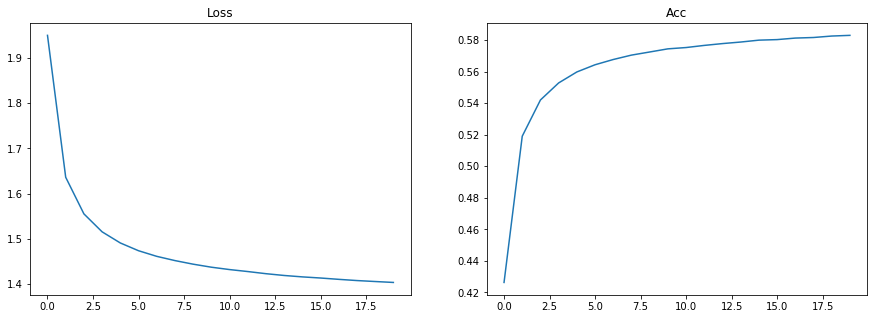

In [0]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(h_1.history['loss'])
ax[1].plot(h_1.history['acc'])
ax[0].set_title('Loss')
ax[1].set_title('Acc')
plt.show()

In [0]:
x_tr = to_categorical(x)

In [0]:
character = Sequential()

character.add(GRU(units=64))

character.add(Dense(n_labels, activation='softmax'))

character.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

h_2 = character.fit(x_tr ,y, epochs=20, callbacks=[print_text_callback],batch_size=128)

Epoch 1/20
1213495/1213495 [==============================] - 368s 303us/step - loss: 1.9825 - acc: 0.4184

 Generating random text for epoch: 0

 Generating with seed: o stop islamic insurgents from crossing 
o stop islamic insurgents from crossing 

ValueError: ignored

**Describa sus observaciones. ¿Qué cree ocurriría si entrenamos la red con otro dataset?**

Se puede observar que algunas de las palabras generada son palabras reales en inglés, sin embargo las oraciones generadas no tienen mucho sentido. Además se puede observar que tiende a repetir algunas palabras moda del dataset, por lo que se puede concluir que la generación de texto es muy dependiente del dataset con que se entrene la red.

# 2 - Autoencoders en Fashion MNIST

Si bien las redes neuronales han tenido desempeños sorprendentes en muchas áreas donde antes solo un ser humano podía alcanzar buenos desempeños, uno de sus desventajas suele serla alta dimensionalidad de los espacios de hipótesis. En la práctica, esto implica que para aprender una tarea predictiva con alguna capacidad de generalización, se requieren grandes bases de datos etiquetadas. Esto implica un problema, considerando que al momento de buscar la base de datos, no se tiene a priori una manera de automatizar esta etiquetación. Esta necesidad de gran cantidad de trabajo de clasificación realizado por humanos, ha engendrado soluciones ingeniosas, como la aproximación de _Facebook_ hace algunos años de pedirle a los mismos usuarios que etiquetaran a las personas en sus fotos, o la solución de _Amazon_, _Mechanical Turk_, donde cualquier usuario puede realizar tareas repetitivas de clasificación a cambio de dinero real, o por otro lado cualquier persona puede comprar la etiquetación de una base de datos la cual realizan varias personas en cualquier parte del mundo. 

Otra aproximación, quizás aún más ingeniosa, para solucionar el problema de las etiquetas, es utilizar las bases de datos sin preocuparse de sus etiquetas. Esta aproximación de aprendizaje no supervisado tiene su representante en redes neuronales en los _Autoencoders_, redes que utilizan el mismo input como target y buscan representaciones de menor dimensionalidad al interior de la red. Estas redes han permitido el uso de cantidades masivas de datos para aprender de ellos sin necesidad de tener etiquetas. Durante esta pregunta veremos algunos de los aspectos y posibilidades básicas que nos presentan los _autoencoders_, utilizando una base de datos de imagenes de articulos de vestimenta, el Fashion MNIST. 

### 2.a Carga de datos y visualizaciones
Cargue los datos. Puede user las funciones de `keras.datasets` como muestra el código o descargarlo manualmente. 

Luego, visualice algunas imagenes de cada una de las catégorias junto con sus nombres (investigue un poco para encontrar la codificación de `y`). Note que las imagenes deben representarse en blanco y negro, puede usar `cmap='Greys'`. ¿Qué pares de categorías cree podrían ocasionar problemas al momento de clasificación? ¿Qué tan bien cree que se desempeñaría un humano en esta tarea?

**R**: Podrían ocasionar problemas las categorías de T-shirt/top, Pullover, Shirt y Coat, ya que las imágenes son muy parecidas. Un humano en general podría desempeñarse bien, aunque igual podría confundirse en las categorías mencionadas.

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


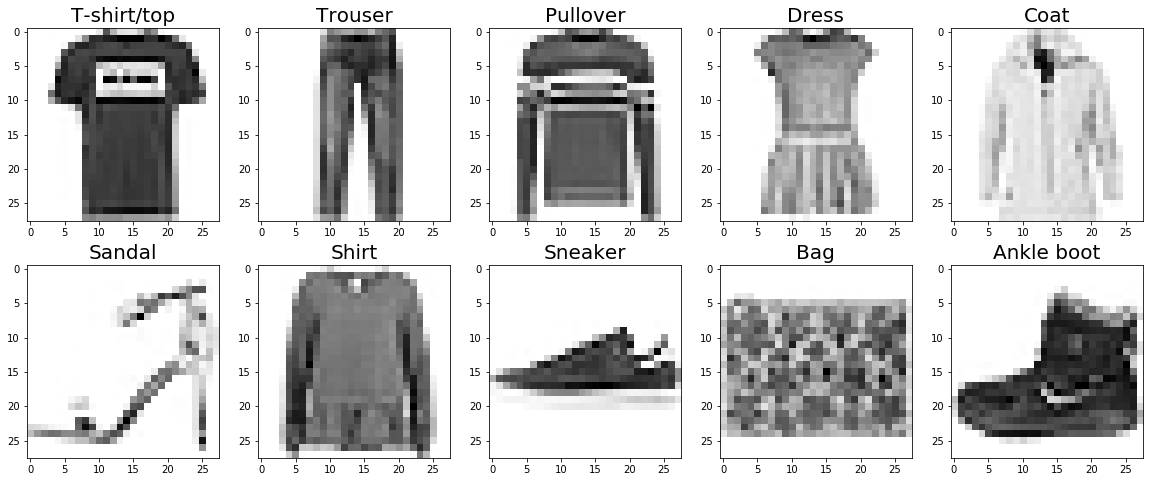

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LambdaCallback
from keras.utils import Sequence
from random import*

from keras.datasets import fashion_mnist
(x_train,y_train),(x_val,y_val) = fashion_mnist.load_data()

import matplotlib.pyplot as plt

#categorias del dataset
labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

fig, axis = plt.subplots(2,5,figsize=(20,8))

#ejemplos dentro del dataset de cada categoria
examples = [1, 16, 5, 3, 19, 8, 18, 6, 23, 0]

for j in range(10):
  idx = examples[j]
  axis[j//5,j%5].imshow(x_train[idx], cmap='Greys')
  axis[j//5,j%5].set_title(labels[y_train[idx]],fontsize=20)


### 2.b Posibilidades de preprocesamiento y pequeños análisis. 

¿Cuáles son los rangos de valores de `x`? ¿Por qué?

¿Las distintas clases de ejemplos están balanceadas?

¿Considera necesario realizar un preprocesamiento? Escale los valores de `x` al intervalo $[0,1]$, y guarde el conjunto de datos original de igual manera que el escalado. ¿Se pierde información al realizar este preprocesamiento? 

Las primeras redes que entrenaremos utilizarán arquitecturas _fully connected_, por lo cual también es necesario transformar nuestras imagenes 2-dimensionales a vectores, como muestra el ejemplo de código.

**R**: Los rangos de valores, como se tratan de píxeles de una imagen, van entre 0 y 255. 

Todas las clases tienen el mismo número de muestras, 6000. 

Como los valores están dentro de un intervalo, conviene escalar los datos. No se pierde información, debido a que existen suficientes cifras para represetar todos los números.

In [0]:
#se transforman las iamgenes de 2 dimensiones a 1, a vector
x_train_vector = x_train.reshape(-1,28*28)
x_val_vector = x_val.reshape(-1,28*28)

#se escalan los valores de x al intervalo [0,1]
x_train_scaled = x_train_vector/255
x_val_scaled = x_val_vector/255

for i in range(10):
  print("clase %d: %d muestras" % (i, len(x_train[y_train == i])))

clase 0: 6000 muestras
clase 1: 6000 muestras
clase 2: 6000 muestras
clase 3: 6000 muestras
clase 4: 6000 muestras
clase 5: 6000 muestras
clase 6: 6000 muestras
clase 7: 6000 muestras
clase 8: 6000 muestras
clase 9: 6000 muestras


### 2.c Primer Autoencoder

Entrenaremos un primer autoencoder de una capa oculta, usando arquitectura densa. Para esto, utilize como guía los códigos presentados abajo. 

Utilice en primera instancia su conjunto de datos escalados. Considerando el intervalo de los datos escalados, ¿Qué función de activación correspondería a la capa de salida de la red? ¿Debería afectar la elección de la función de activación de la capa oculta? 

Entrene esta primera red utilizando pérdida _binary cross entropy_. Compare luego las imagenes originales con las imagenes reconstruidas, como muestra el código. ¿Qué le parece el desempeño de la red, logra aprender la tarea en su opinion? Grafique como varia la pérdida a lo largo del entrenamiento y visualice algunas imagenes reconstruidas. 

**R**: Correspondería a la función sigmoide, ya que devuelve valores entre 0 y 1 que corresponde al intervalo de los datos. Si afecta la elección de la función de activación. La red logra reconstruir la forma y parte de los colores de la iamgen original, pero no logra aprender la tarea de forma perfecta.

In [0]:
autoencoder = Sequential()

autoencoder.add(Dense(32,activation='relu')) # encoder
 
autoencoder.add(Dense(28*28,activation="sigmoid")) #decoder

autoencoder.compile(optimizer=SGD(lr=9.5, decay=0.0004),loss='binary_crossentropy')
    
h_scaled = autoencoder.fit(x_train_scaled,x_train_scaled,epochs=50,validation_data=(x_val_scaled,x_val_scaled))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.3194 - val_loss: 0.2970
Epoch 2/50
60000/60000 [==============================] - 6s 94us/step - loss: 0.2926 - val_loss: 0.2918
Epoch 3/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2888 - val_loss: 0.2900
Epoch 4/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.2874 - val_loss: 0.2892
Epoch 5/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.2866 - val_loss: 0.2884
Epoch 6/50
60000/60000 [==============================] - 6s 102us/step - loss: 0.2861 - val_loss: 0.2881
Epoch 7/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.2857 - val_loss: 0.2878
Epoch 8/50
60000/60000 [==============================] - 6s 97us/step - loss: 0.2854 - val_loss: 0.2875
Epoch 9/50
60000/60000 [==============================] - 6s 92us/step - loss: 0.2852 - val_loss: 0.2873
Epoc

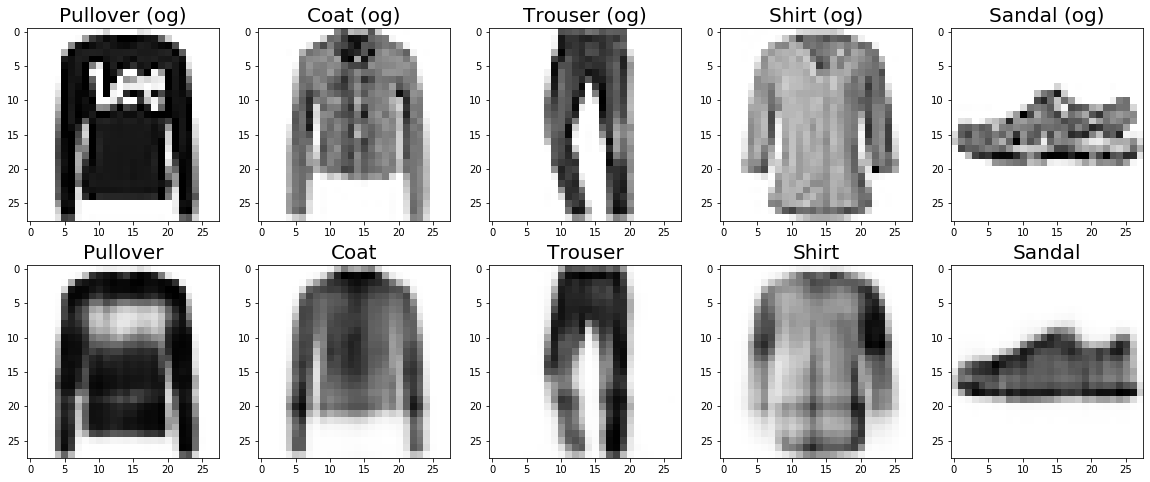

In [0]:
fig, axis = plt.subplots(2,5,figsize=(20,8))

#imagenes de cada clase del dataset
examples = [1, 10, 5, 4, 21, 1, 10, 5, 4, 21]
for j in range(10):
  idx = examples[j]
  if j < 5:
    axis[j//5,j%5].imshow(x_val_scaled[idx].reshape(-1,28*28).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+' (og)',fontsize=20)
  else:
    axis[j//5,j%5].imshow(autoencoder.predict(x_val_scaled[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]],fontsize=20)

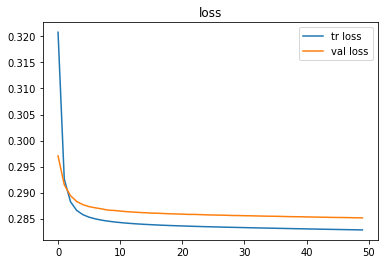

In [0]:
#plot de grafico epoch vs loss
x_data = np.arange(len(h_scaled.history["loss"]))
plt.plot(x_data, h_scaled.history["loss"], label = "tr loss")
x_data = np.arange(len(h_scaled.history["val_loss"]))
plt.plot(x_data, h_scaled.history["val_loss"], label = "val loss")
plt.title("loss")
plt.xlabel("epochs")
plt.legend()
plt.show()

### 2.d Sin escalar
Entrene nuevamente la misma estructura de red pero esta vez utilizando los datos originales (sin escalar). ¿Qué función de activación debe utilizar para la capa de salida? ¿Le parece sea una buena aproximación comparando con las caracteristicas de la red anterior? 

Compare los desempeños viendo las imagenes reconstruidas. 

De aquí en adelante prefiera la versión de los datos escaladas para consistencia. 

**R**: Debería ser una función lineal ya que el intervalo de datos de ahora es entre 0 y 255. No es una buena aproximación comparando con el desempeño de la red anterior, puesto que las imágenes reconstruidas son muy poco nada parecidas a las originales.

In [0]:
#autoencoder con funcion lineal en la capa de salida
#loss = mse
autoencoder_mse = Sequential()

autoencoder_mse.add(Dense(32,activation='relu')) # encoder
 
autoencoder_mse.add(Dense(28*28,)) #decoder

autoencoder_mse.compile(optimizer=SGD(lr=0.1), loss='mse')

h_mse = autoencoder_mse.fit(x_train_vector,x_train_vector,epochs=50,validation_data=(x_val_vector,x_val_vector))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 99us/step - loss: 1029769.5065 - val_loss: 9298.0474
Epoch 2/50
60000/60000 [==============================] - 6s 92us/step - loss: 8004.8749 - val_loss: 7044.5040
Epoch 3/50
60000/60000 [==============================] - 5s 92us/step - loss: 6559.1233 - val_loss: 6178.6869
Epoch 4/50
60000/60000 [==============================] - 6s 92us/step - loss: 6004.1265 - val_loss: 5844.6720
Epoch 5/50
60000/60000 [==============================] - 6s 93us/step - loss: 5790.8563 - val_loss: 5715.8042
Epoch 6/50
60000/60000 [==============================] - 6s 95us/step - loss: 5709.0462 - val_loss: 5666.0953
Epoch 7/50
60000/60000 [==============================] - 6s 94us/step - loss: 5677.6108 - val_loss: 5646.6632
Epoch 8/50
60000/60000 [==============================] - 6s 92us/step - loss: 5665.4822 - val_loss: 5639.0139
Epoch 9/50
60000/60000 [==============================] - 5

In [0]:
#autoencoder con funcion lineal en la capa de salida
#loss = msle
autoencoder_msle = Sequential()

autoencoder_msle.add(Dense(32,activation='relu')) # encoder
 
autoencoder_msle.add(Dense(28*28,)) #decoder

autoencoder_msle.compile(optimizer=SGD(lr=0.05, decay=0.0001),loss='mean_squared_logarithmic_error')

h_msle = autoencoder_msle.fit(x_train_vector,x_train_vector,epochs=50,validation_data=(x_val_vector,x_val_vector))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 104us/step - loss: 2.2093 - val_loss: 1.7696
Epoch 2/50
60000/60000 [==============================] - 6s 98us/step - loss: 1.6541 - val_loss: 1.6221
Epoch 3/50
60000/60000 [==============================] - 6s 98us/step - loss: 1.5689 - val_loss: 1.5424
Epoch 4/50
60000/60000 [==============================] - 6s 101us/step - loss: 1.4993 - val_loss: 1.4772
Epoch 5/50
60000/60000 [==============================] - 6s 99us/step - loss: 1.4606 - val_loss: 1.4652
Epoch 6/50
60000/60000 [==============================] - 6s 99us/step - loss: 1.4471 - val_loss: 1.4411
Epoch 7/50
60000/60000 [==============================] - 6s 99us/step - loss: 1.4288 - val_loss: 1.4281
Epoch 8/50
60000/60000 [==============================] - 6s 98us/step - loss: 1.4171 - val_loss: 1.4122
Epoch 9/50
60

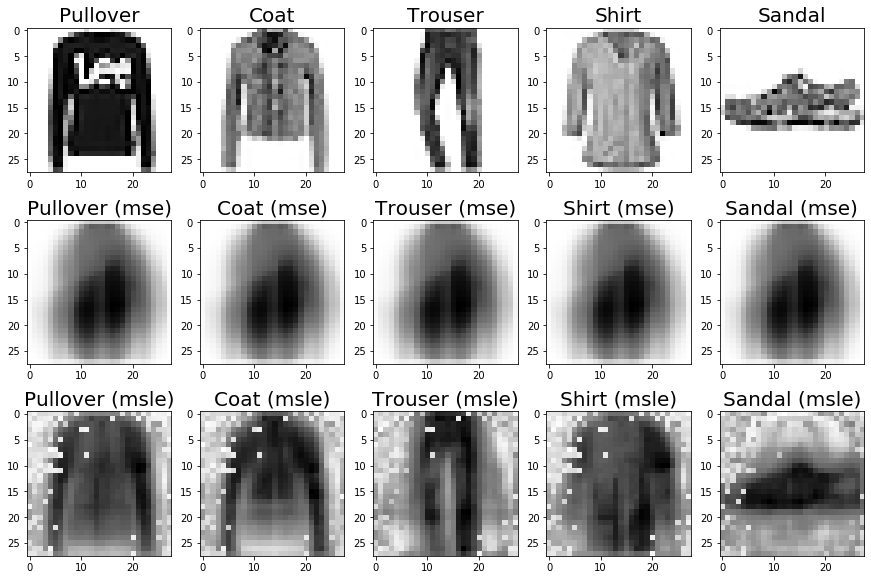

In [0]:
#se muestran las imagenes para las distintas redes
fig, axis = plt.subplots(3,5,figsize=(15,10))
examples = [1, 10, 5, 4, 21]
for j in range(15):
  idx = examples[j%5]
  if j < 5:
    axis[j//5,j%5].imshow(x_val_vector[idx].reshape(-1,28*28).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]],fontsize=20)
  elif j < 10:
    axis[j//5,j%5].imshow(autoencoder_mse.predict(x_val_vector[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+' (mse)',fontsize=20)
  elif j < 15:
    axis[j//5,j%5].imshow(autoencoder_msle.predict(x_val_vector[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+' (msle)' ,fontsize=20)

### 2.e Dimensionalidad

Una forma de interpretar lo que realiza el autoencoder, es considerar que si el autoencoder hace bien su tarea, la información necesaria para reconstruir la imagen original se encuentra en la capa oculta, la cual tiene menor dimensionalidad que la imagen original. Uno puede considerar por lo tanto que la capa de _encoding_ esta comprimiendo la información contenida en la imagen, mientras la capa de _decoding_ hace el proceso contrario, descomprimiendola a su estado original lo mejor posible. 

Explore como cambia el desempeño de la red en cuestión frente a cambios en la dimensión de la capa oculta. Pruebe a lo menos 5 niveles de compresión distintos, incluyendo uno donde la capa oculta tenga $50\%$ de ratio de compresión y otro donde la capa oculta tenga tan solo 2 neuronas. ¿Qué observa?

**R**: Usando una capa oculta de 2 neuronas el error de pérdida es bastante alto comparando con las demás y los desempeños anteriores, lo que significa que con ese número no se logra aprender bien la tarea. Con los demás valores de la capa oculta, 98, 196, 392 y 588 neuronas se logra tener un desempeño mejor a los anteriores, lo que se entiende porque que usando más neuronas se puede guardar más información.

In [0]:
#num de neuronas de la capa oculta
hidds = [2,98,196,392,588]

val_losses = []
tr_losses = []

#se explora por el num de neuronas de capa oculta
for n in hidds:
  autoencoder = Sequential()

  autoencoder.add(Dense(n,activation='relu')) # encoder
  
  autoencoder.add(Dense(28*28,activation="sigmoid")) #decoder

  if n == 2:
    autoencoder.compile(optimizer=SGD(lr=5.5, decay=0.0002),loss='binary_crossentropy')
  else:
    autoencoder.compile(optimizer=SGD(lr=9.5, decay=0.0004),loss='binary_crossentropy')

  history = autoencoder.fit(x_train_scaled,x_train_scaled,epochs=50,validation_data=(x_val_scaled,x_val_scaled))

  #se guardan los mejores loss de tr y val
  idx = np.argmin(history.history["val_loss"])
  tr_losses.append(history.history["loss"][idx])
  val_losses.append(history.history["val_loss"][idx])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 8s 130us/step - loss: 0.4200 - val_loss: 0.3987
Epoch 2/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.3909 - val_loss: 0.3883
Epoch 3/50
60000/60000 [==============================] - 6s 100us/step - loss: 0.3842 - val_loss: 0.3839
Epoch 4/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.3814 - val_loss: 0.3822
Epoch 5/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.3799 - val_loss: 0.3809
Epoch 6/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.3790 - val_loss: 0.3807
Epoch 7/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.3783 - val_loss: 0.3797
Epoch 8/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.3779 - val_loss: 0.3793
Epoch 9/50
60000/60000 [==============================] - 6s 101us/step - loss: 0.3775 - val_loss: 0.379

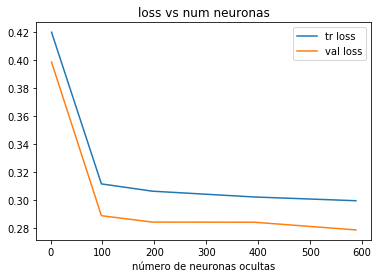

In [0]:
#se muestra el mejor loss de tr y val para la exploracion
plt.plot(hids, tr_losses, label="tr loss")
plt.plot(hids, val_losses, label="val loss")
plt.xlabel("número de neuronas ocultas")
plt.title("loss vs num neuronas")
plt.legend()
plt.show()

### 2.f Deep autoencoder

Pruebe ahora con una arquitectura ligeramente más profunda. Para esto utilice a lo menos 3 capas de encoding, es decir, 3 capas que progresivamente reduzcan la dimensionalidad de la representación hasta una dimensión objetivo inicialmente igual a la mejor obtenida en la pregunta anterior. Utilice igualmente a lo menos 2 capas de decoding, que se encarguen de aumentar la dimensionaliad de la representación hasta alcanzar la dimensión de la imagen original. Note que las primeras capas no necesariamente deben tener menor dimensionalidad que la imagen, la dimensión relevante es aquella de la última capa de encoding. 

¿Cómo aumenta el número de parámetros entrenables? ¿Aumenta el tamaño de la representación "comprimida"?

Una vez esté satisfecho con su arquitectura profunda, varíe la dimensión objetivo de la última capa de encoding, realizando una exploración similar a la pregunta anterior. 

¿Puede obtener una representación de menor dimensionalidad que la encontrada en el item anterior sin perder calidad en las imagenes obtenidas?

Utilice gráficos y muestre algunas imágenes reconstruidas para complementar sus comentarios. 


**R**: El número de parámetros aumenta en función a la cantidad de capas y de neuronas por capa, en este caso, aumenta significativamente comparado con las redes anteriores. La representación comprimida es del mismo tamaño.

Sí, incluso con 92 neuronas se logra construir una imagen casi igual a la red que usa 588 neuronas en la capa oculta, que fue la mejor obtenida de la pregunta anterior.

Al principio del código se muestran 2 redes profundas, una usando 4 capas de encoding y 3 de decoding y otra usando 3 de encoding y 2 de decoding, pero se obtuvo unas imágenes de mejor calidad usando la última red mencionada.

In [0]:
#autoencoder profundo con 4 capas de encoding y 3 de decoding

autoencoder_deep = Sequential()

#encoders
autoencoder_deep.add(Dense(1000,activation='relu')) 
autoencoder_deep.add(Dense(850,activation='relu')) 
autoencoder_deep.add(Dense(700,activation='relu')) 
autoencoder_deep.add(Dense(588,activation='relu')) 

#decoders
autoencoder_deep.add(Dense(650,activation="relu")) 
autoencoder_deep.add(Dense(720,activation="relu")) 
autoencoder_deep.add(Dense(28*28,activation="sigmoid")) 

autoencoder_deep.compile(optimizer=SGD(lr=3.1),loss='binary_crossentropy')
    
history_deep = autoencoder_deep.fit(x_train_scaled,x_train_scaled,epochs=50,validation_data=(x_val_scaled,x_val_scaled))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.3371 - val_loss: 0.3078
Epoch 2/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2981 - val_loss: 0.3015
Epoch 3/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2891 - val_loss: 0.2893
Epoch 4/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2836 - val_loss: 0.2817
Epoch 5/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2798 - val_loss: 0.2837
Epoch 6/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2771 - val_loss: 0.2845
Epoch 7/50
60000/60000 [==============================] - 63s 1ms/step - loss: 0.2750 - val_loss: 0.2795
Epoch 8/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2733 - val_loss: 0.2807
Epoch 9/50
60000/60000 [==============================] - 62s 1ms/step - loss: 0.2720 - val_loss: 0.2727
Epoch

In [0]:
autoencoder_deep.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 1000)              785000    
_________________________________________________________________
dense_134 (Dense)            (None, 850)               850850    
_________________________________________________________________
dense_135 (Dense)            (None, 700)               595700    
_________________________________________________________________
dense_136 (Dense)            (None, 588)               412188    
_________________________________________________________________
dense_137 (Dense)            (None, 650)               382850    
_________________________________________________________________
dense_138 (Dense)            (None, 720)               468720    
_________________________________________________________________
dense_139 (Dense)            (None, 784)             

Deep autoencoder con 4 capas de encoding y 3 de decoding


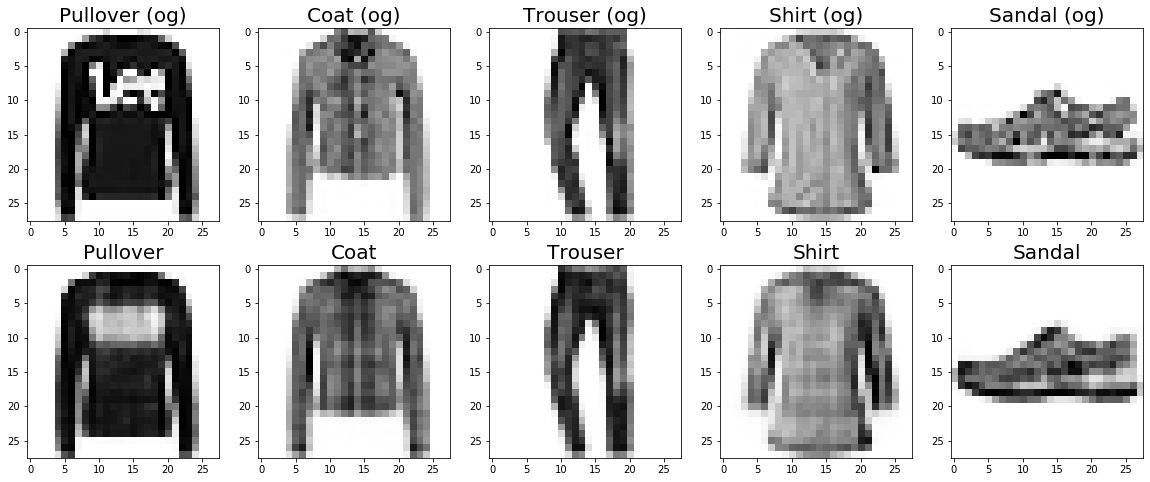

In [0]:
#se muestran las imagenes con el autoencoder profeundo de 4 capas de encoding y 3 de decoding

print("Deep autoencoder con 4 capas de encoding y 3 de decoding")
fig, axis = plt.subplots(2,5,figsize=(20,8))
examples = [1, 10, 5, 4, 21]
for j in range(10):
  idx = examples[j%5]
  if j < 5:
    axis[j//5,j%5].imshow(x_val_scaled[idx].reshape(-1,28*28).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+' (og)',fontsize=20)
  else:
    axis[j//5,j%5].imshow(autoencoder_deep.predict(x_val_scaled[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]],fontsize=20)

     ## AUTO ENCONDER USANDO 4 CAPAS DE ENCODING Y 3 DE DECODING


In [0]:
#se entrena autoencoder profundo con 3 capas de encoding y 2 de decoding
#es el que tuvo mejor desempeño de los entrenados
autoencoder_deep = Sequential()

#encoders
autoencoder_deep.add(Dense(1000,activation='relu')) 
autoencoder_deep.add(Dense(700,activation='relu')) 
autoencoder_deep.add(Dense(588,activation='relu')) 

#decoders
autoencoder_deep.add(Dense(650,activation="relu")) 
autoencoder_deep.add(Dense(28*28,activation="sigmoid")) 

autoencoder_deep.compile(optimizer=SGD(lr=3.1),loss='binary_crossentropy')
    
history_deep = autoencoder_deep.fit(x_train_scaled,x_train_scaled,epochs=50,validation_data=(x_val_scaled,x_val_scaled))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 10s 170us/step - loss: 0.3259 - val_loss: 0.2976
Epoch 2/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.2907 - val_loss: 0.2856
Epoch 3/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.2815 - val_loss: 0.2813
Epoch 4/50
60000/60000 [==============================] - 8s 137us/step - loss: 0.2766 - val_loss: 0.2764
Epoch 5/50
60000/60000 [==============================] - 8s 137us/step - loss: 0.2733 - val_loss: 0.2728
Epoch 6/50
60000/60000 [==============================] - 8s 140us/step - loss: 0.2708 - val_loss: 0.2751
Epoch 7/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.2690 - val_loss: 0.2706
Epoch 8/50
60000/60000 [==============================] - 8s 138us/step - loss: 0.2675 - val_loss: 0.2691
Epoch 9/50
60000/60000 [==============================] - 8s 137us/step - loss: 0.2662 - val_loss: 0.

In [0]:
autoencoder_deep.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 700)               700700    
_________________________________________________________________
dense_8 (Dense)              (None, 588)               412188    
_________________________________________________________________
dense_9 (Dense)              (None, 650)               382850    
_________________________________________________________________
dense_10 (Dense)             (None, 784)               510384    
Total params: 2,791,122
Trainable params: 2,791,122
Non-trainable params: 0
_________________________________________________________________


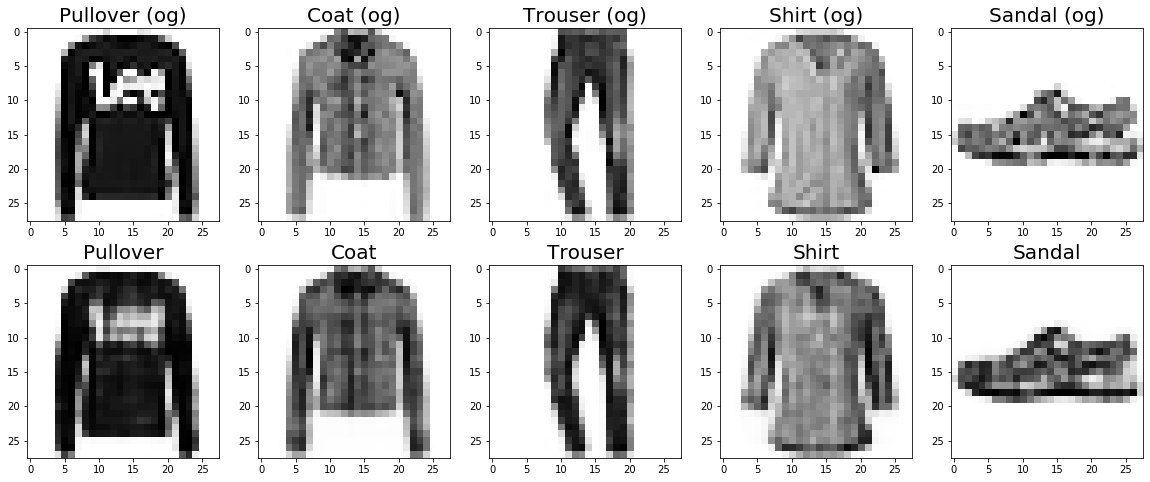

In [0]:
#se muestran las imagenes para el autoencoder profundo de 3 capas de encoding y 2 de decoding

print("Deep autoencoder con 3 capas de encoding y 2 de decoding")
fig, axis = plt.subplots(2,5,figsize=(20,8))
examples = [1, 10, 5, 4, 21]
for j in range(10):
  idx = examples[j%5]
  if j < 5:
    axis[j//5,j%5].imshow(x_val_scaled[idx].reshape(-1,28*28).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+' (og)',fontsize=20)
  else:
    axis[j//5,j%5].imshow(autoencoder_deep.predict(x_val_scaled[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]],fontsize=20)

    ## AUTO ENCONDER USANDO 3 CAPAS DE ENCODING Y 2 DE DECODING

In [0]:
#se realiza una exploracion en el numero de neuronas de la ultima capa de encoding
#se cambia la compresion

#num de neuronas de la ultima capa de encoding
hids = [32,98,196,392,450]

models = []
val_losses2 = []
tr_losses2 = []

#se realiza la exploracion
for n in hids:
  autoencoder = Sequential()

  autoencoder.add(Dense(1000,activation='relu')) 
  autoencoder.add(Dense(700,activation='relu')) 
  autoencoder.add(Dense(n,activation='relu')) 

  #decoders
  autoencoder.add(Dense(650,activation="relu")) 
  autoencoder.add(Dense(28*28,activation="sigmoid")) 
  if (n == 2):
    autoencoder.compile(optimizer=SGD(lr=0.5),loss='binary_crossentropy')
  else:
    autoencoder.compile(optimizer=SGD(lr=3.1),loss='binary_crossentropy')
      
  history = autoencoder.fit(x_train_scaled,x_train_scaled,epochs=50,validation_data=(x_val_scaled,x_val_scaled))

  idx = np.argmin(history.history["val_loss"])

  #se guardan los modelos para poder realizar poder predecir posteriormente
  models.append(autoencoder)

  #se guardan los mejores loss de tr y val 
  tr_losses2.append(history.history["loss"][idx])
  val_losses2.append(history.history["val_loss"][idx])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 30s 508us/step - loss: 0.3364 - val_loss: 0.3048
Epoch 2/50
60000/60000 [==============================] - 30s 503us/step - loss: 0.3011 - val_loss: 0.3005
Epoch 3/50
60000/60000 [==============================] - 30s 499us/step - loss: 3.6576 - val_loss: 5.3336
Epoch 4/50
60000/60000 [==============================] - 31s 510us/step - loss: 5.3261 - val_loss: 5.3336
Epoch 5/50
60000/60000 [==============================] - 29s 489us/step - loss: 5.3261 - val_loss: 5.3336
Epoch 6/50
60000/60000 [==============================] - 29s 484us/step - loss: 5.3261 - val_loss: 5.3336
Epoch 7/50
60000/60000 [==============================] - 29s 486us/step - loss: 5.3261 - val_loss: 5.3336
Epoch 8/50
60000/60000 [==============================] - 29s 482us/step - loss: 5.3261 - val_loss: 5.3336
Epoch 9/50
60000/60000 [==============================] - 29s 486us/step - loss: 5.3261 - val_

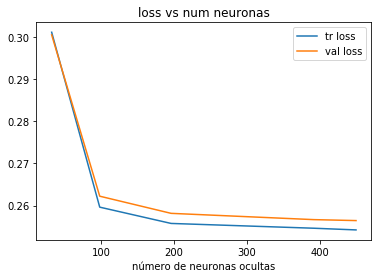

In [0]:
#se grafica loss vs epoch de la exploracion anterior

plt.plot(hids, tr_losses2, label="tr loss")
plt.plot(hids, val_losses2, label="val loss")
plt.xlabel("número de neuronas ocultas")
plt.title("loss vs num neuronas")
plt.legend()
plt.show()


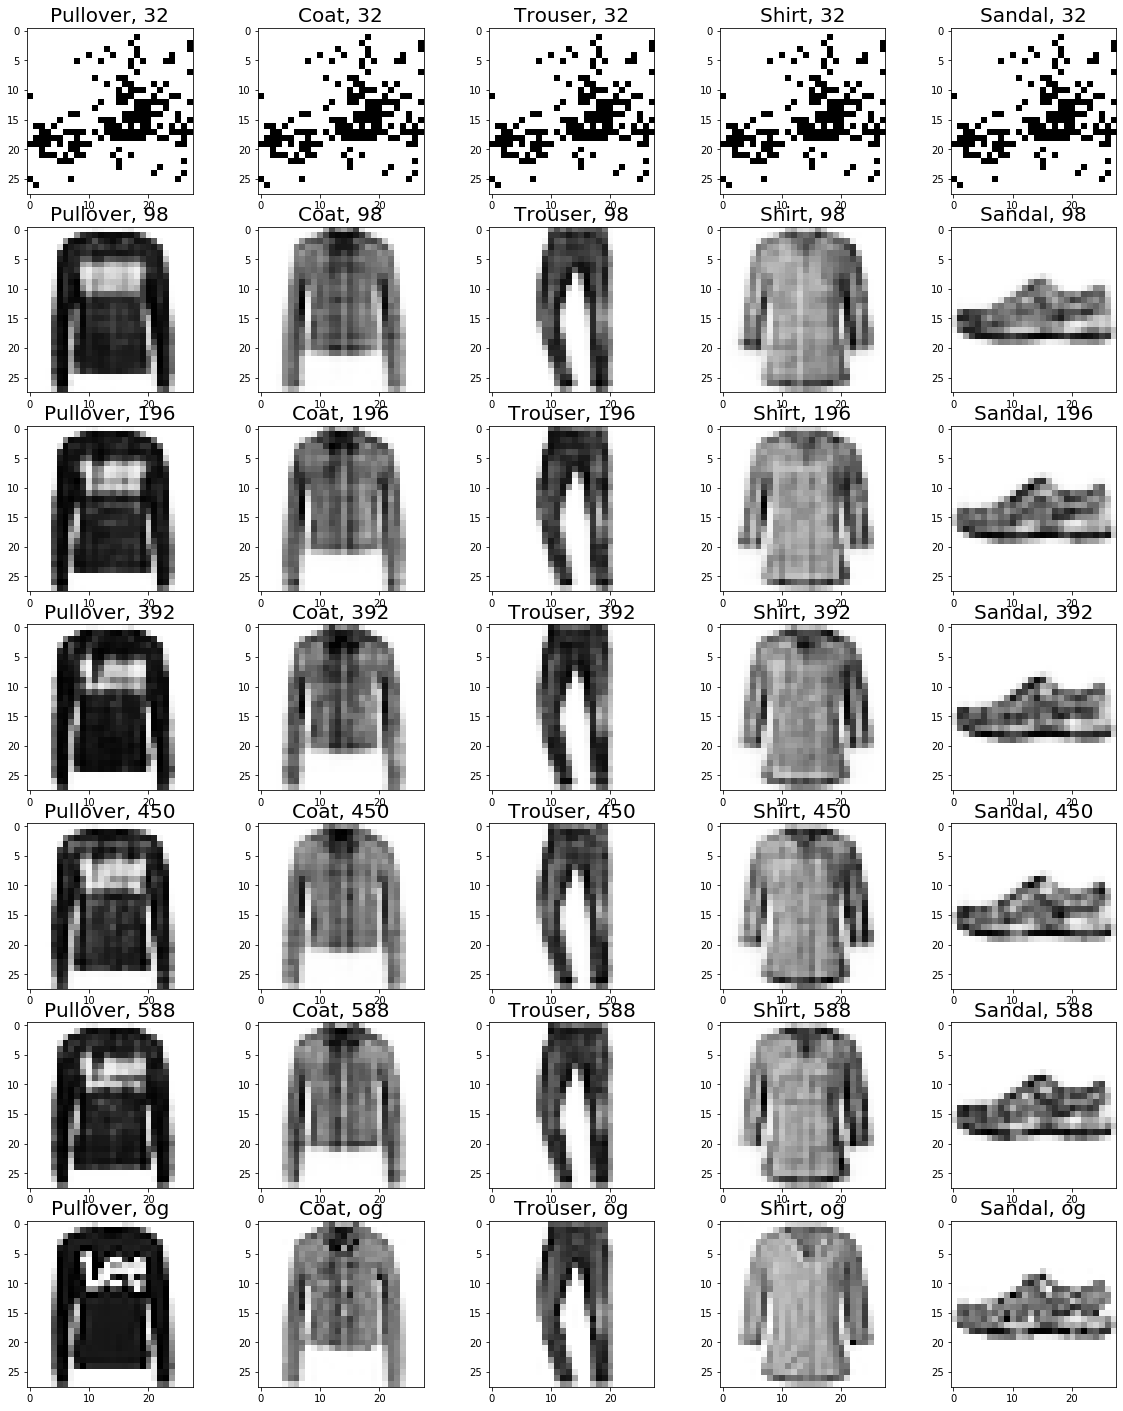

In [0]:
#se muestran las imagenes de la exploracion realizada
#con 32, 98, 196, 392 y 450 neuronas en la ultima capa de encoding, y se compara con 588, el mejor autoencoder profundo encontrado hasta ahora y
#         imagen original

fig, axis = plt.subplots(7,5,figsize=(20,25))
examples = [1, 10, 5, 4, 21]

for j in range(25):
  idx = examples[j%5]
  axis[j//5,j%5].imshow(models[j//5].predict(x_val_scaled[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
  axis[j//5,j%5].set_title(labels[y_val[idx]]+', '+str(hids[j//5]),fontsize=20)
 
for j in range(5):
  idx = examples[j%5]
  axis[5,j].imshow(autoencoder_deep.predict(x_val_scaled[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
  axis[5,j].set_title(labels[y_val[idx]]+', '+str(588),fontsize=20)

for j in range(5):
  idx = examples[j%5]
  axis[6,j].imshow(x_val_scaled[idx].reshape(28,28),cmap='Greys')
  axis[6,j].set_title(labels[y_val[idx]]+', og',fontsize=20)


### 2.g Convolutional Autoencoder

Como hemos hasta ahora  utilizado una arquitectura fully connected, nuestra red no toma en cuenta la infomación local contenida en la proximidad de un pixel en la imagen. Como vimos en la tarea anterior, esta información podría ser crucial al momento de procesar imágenes. 

En este item deberá implementar un autoencoder convolucional. La sección de encoding de la red se creará de igual manera que las redes convolucionales creadas en la tarea 1. Puede utilizar capas de Max Pooling o Strides mayores a 1 para reducir la dimensionalidad en esta etapa. Tenga en mente como varía la dimensión de la imagen a lo largo del proceso. 

Para luego recuperar la dimensionalidad de la imagen original debemos utilizar una capa llamada usualmente como "Deconvolution Layer". Esta capa realiza el proceso inverso que aquel realizado por una capa convolucional, por lo cual utilizando por ejemplo `stride=2` puede duplicar la dimensionalidad de su input. 

Puede realizar la profundidad que desee, pero tome en cuenta que una mayor profundidad de la sección convolucional permite a la red reducir dimensionalidad más lentamente, sin "forzar" la compresión de las características. Note que para reconstruir la dimensión original puede usar `output_padding` para corregir problemas de paridad, entre otros. 

Puede igualmente optar por usar algun número de capas densas en el cuello de botella del autoencoder, usando al comienzo de esta una capa `Flatten` y al final de ella una capa `Reshape` (`keras.layers.Reshape(target_shape)`) para recuperar la bidimensionalidad.

¡No olvide que para entrenar esta red debe usar la versión bidimensional de los datos escalados!

Visualice que tan bien se comporta la convolución, en terminos de la función de pérdida y visualizando las imagenes reconstruidas. Compárese con la red densa. 

**R**: La función de pérdida llega a valores un poco menores comparado a las redes densas, sin embargo, al ver las imágenes reconstruidas se puede ver que la red convolucional tiene un desempeño mucho mejor que las redes densas, puesto que las imágenes reconstruidas son casi iguales a las originales, algo que no se logró con ninguna red densa.

In [0]:
from keras.layers import Conv2D, Deconvolution2D, MaxPooling2D

#autoencoder convolucional
autoencoder_conv = Sequential()

#capas de encoding
autoencoder_conv.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(28,28,1)))

autoencoder_conv.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

autoencoder_conv.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

autoencoder_conv.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

autoencoder_conv.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

autoencoder_conv.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#capas de decoding
autoencoder_conv.add(Deconvolution2D(32, 2, strides=1,activation='relu', padding='same'))
autoencoder_conv.add(Deconvolution2D(64, 2, strides=2,activation='relu', padding='same'))
autoencoder_conv.add(Deconvolution2D(1, 2, strides=2,activation='sigmoid', padding='same'))

autoencoder_conv.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 7, 7, 32)       

In [0]:
#se entrena autoenconder convolucional
autoencoder_conv.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

h = autoencoder_conv.fit(x=x_train_scaled.reshape(x_train_scaled.shape[0],28,28,1), 
          y=x_train_scaled.reshape(x_train_scaled.shape[0],28,28,1),
          epochs=20,
          validation_data=(x_val_scaled.reshape(x_val_scaled.shape[0],28,28,1),x_val_scaled.reshape(x_val_scaled.shape[0],28,28,1)))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 45s 744us/step - loss: 0.2511 - acc: 0.5100 - val_loss: 0.2514 - val_acc: 0.5078
Epoch 2/20
60000/60000 [==============================] - 44s 734us/step - loss: 0.2485 - acc: 0.5101 - val_loss: 0.2503 - val_acc: 0.5078
Epoch 3/20
60000/60000 [==============================] - 44s 736us/step - loss: 0.2473 - acc: 0.5101 - val_loss: 0.2487 - val_acc: 0.5079
Epoch 4/20
60000/60000 [==============================] - 44s 737us/step - loss: 0.2464 - acc: 0.5101 - val_loss: 0.2480 - val_acc: 0.5079
Epoch 5/20
60000/60000 [==============================] - 44s 734us/step - loss: 0.2458 - acc: 0.5101 - val_loss: 0.2473 - val_acc: 0.5079
Epoch 6/20
60000/60000 [==============================] - 44s 733us/step - loss: 0.2452 - acc: 0.5101 - val_loss: 0.2469 - val_acc: 0.5079
Epoch 7/20
60000/60000 [==============================] - 44s 733us/step - loss: 0.2449 - acc: 0.5101 - val_loss: 0.

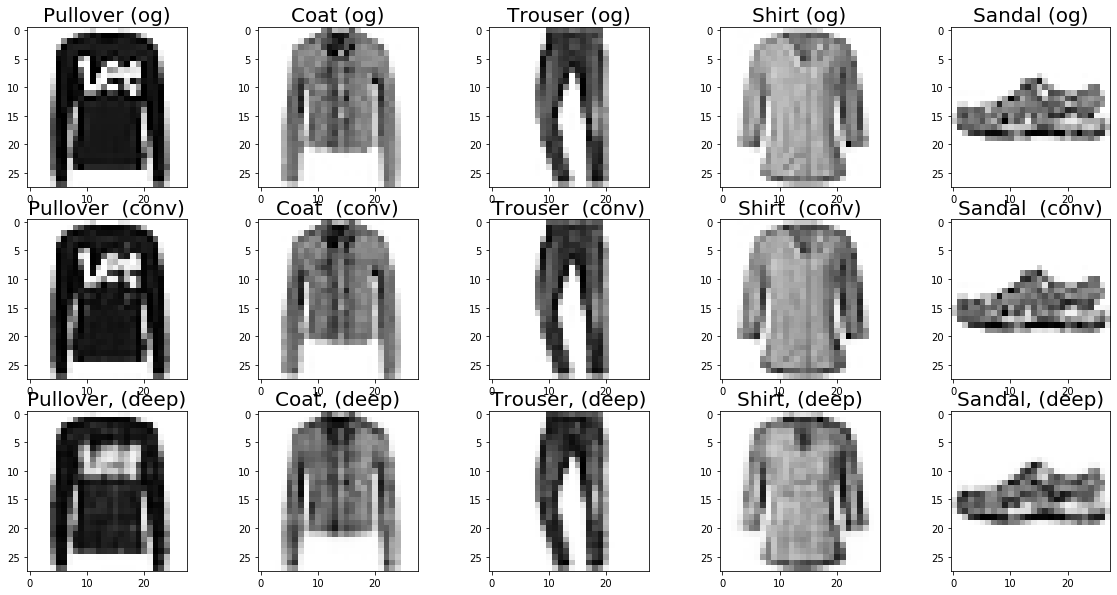

In [0]:
#se muestran las imagenes del autoencoder convolucional y se comparan con el mejor autoencoder denso profundo y las imagenes originales

fig, axis = plt.subplots(3,5,figsize=(20,10))
examples = [1, 10, 5, 4, 21]
for j in range(15):
  idx = examples[j%5]
  if j < 5:
    axis[j//5,j%5].imshow(x_val_scaled[idx].reshape(-1,28*28).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+' (og)',fontsize=20)
  elif j < 10:
    axis[j//5,j%5].imshow(autoencoder_conv.predict(x_val_scaled[idx].reshape(-1,28,28,1)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+'  (conv)',fontsize=20)
  else:
    axis[j//5,j%5].imshow(autoencoder_deep.predict(x_val_scaled[idx].reshape(-1,28*28)).reshape(28,28),cmap='Greys')
    axis[j//5,j%5].set_title(labels[y_val[idx]]+', (deep)',fontsize=20)

### 2.h Transfer Learning y reducción de dimensionalidad

Como mencionamos inicialmente, una de las utilidades de los autoencoders corresponde a la no necesidad de tener etiquetas. En ese caso, podemos utilizar los autoencoders para extraer representaciones significativas de los ejemplos no etiquetados, y luego utilizar ese conocimiento para mejorar el desempeño de nuestros algoritmos. 

Para simular esta tarea supongamos que tenemos la misma base de datos original, sin embargo solo poseemos un pequeño porcentaje de las etiquetas del conjunto de entrenamiento, menos del $5\%$ (considere que si tuviera que etiquetar manualmente incluso solo un $5\%$ correspondería a 3000 imagenes por etiquetar!).

Seleccione un subconjunto de datos correspondiente a menos del $5\%$ de los datos y entrene un modelo predictivo para el problema de clasificación. Si bien la aproximación convolucional suele ser la mejor para este tipo de bases de datos, utilice arquitectura densa. 

Luego, utilizando el mejor autoencoder entrenado hasta ahora (o entrene uno nuevo si prefiere), utilize lo aprendido por la red sobre el conjunto de datos sin etiquetas para intentar aprender la relación suyaciente. Para esto, lo más fácil es primero preprocesar el conjunto `x` de entrenamiento, utilizando la sección de encoding de su autoencoder. Puede crear un nuevo modelo secuencial solo con las capas de encoding como se muestra en el código y luego usar el método `.predict` del modelo. Luego sobre estos datos preprocesados entrene un nuevo modelo predictivo fully connected. 

La otra opción sería crear un modelo cuya primeras capas correspondan a la sección de encoding del autoencoder y las últimas capas a su modelo denso, pero fijando el atributo `trainable` de las primeras capas como `False`, sin embargo esto resulta poco eficiente. 


Comente sus resultados basándose en métricas adecuadas. Comente igualmente sobre la dimensionalidad de las representaciones utilizadas por cada uno de los dos modelos entrenados en esta sección y el número de parametros _entrenables_ y totales del modelo (considerando el encoding). 

Considerando la dimensionalidad obtenida por el encoder, compare la calidad de la representación obtenida por el autoencoder frente a otras aproximaciones de reducción de dimensionalidad, como por ejemplo Principal Component Analysis (PCA). Para esto, transforme los datos de entrenamiento utilizando PCA con un número de componentes principales igual a la dimensión de la representación engendrada por su encoder. Compare el desempeño de un modelo determinado utilizando ambas representaciones. 

Comente sus resultados.

**R**: Si bien el autoencoder convolucional es el que mejor desempeño tiene, se uso un modelo de arquitectura densa para los datos pre procesados, para que los modelos predictivos tengan estructura similar y se comparen desde un mismo punto de vista. 

El modelo con los datos pre procesados tienen una dimensión menor, puesto que los datos pasaron por el encoder y se redujo su dimensionalidad, lo que implica que el número de parámetros entrenables y totales del modelo sea menor al que usa los datos sin pre procesar.

Usando un modelo de arquitectura densa para comparar el encoder con PCA, se puede ver en los desempeños de accuray como en la matriz de confusión que se logran mejores resultados usando encoder, incluso de la matriz de confusión se puede ver que PCA no logra clasificar 2 clases, shirt ni ankle boots

In [0]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.layers import Flatten

x_tr_full = x_train_scaled
y_val_full = y_val

#Se obtiene el 3% de la data
x_tr, x_test, y_tr, y_test = train_test_split(x_train_scaled, y_train, test_size= 0.97)
x_val, x_test, y_val, y_test = train_test_split(x_val_scaled, y_val, test_size= 0.97)

#Se pre procesan los datos (se encodan)
encoder = Sequential()
encoder.add(autoencoder_deep.get_layer(index=0))
encoder.add(autoencoder_deep.get_layer(index=1))
encoder.add(autoencoder_deep.get_layer(index=2))

pre_x_tr = encoder.predict(x_tr.reshape(-1,28,28,1))
pre_x_val = encoder.predict(x_val.reshape(-1,28,28,1))

y_tr = to_categorical(y_tr)
y_val= to_categorical(y_val)

In [0]:
#se entrena un modelo predictivo de clasificacion con data preprocesada por el autoencoder
model_pre = Sequential()
model_pre.add(Dense(500,activation="relu")) 
model_pre.add(Dense(300,activation="relu")) 
model_pre.add(Dense(300,activation="relu")) 
model_pre.add(Dense(10,activation="softmax")) 
model_pre.compile(optimizer=SGD(lr=0.005),loss='categorical_crossentropy', metrics=["acc"])
history_pre = model_pre.fit(pre_x_tr,y_tr,epochs=50,validation_data=(pre_x_val,y_val))

Train on 1800 samples, validate on 300 samples
Epoch 1/50
1800/1800 [==============================] - 6s 3ms/step - loss: 1.8692 - acc: 0.4311 - val_loss: 1.4322 - val_acc: 0.6467
Epoch 2/50
1800/1800 [==============================] - 0s 202us/step - loss: 1.1843 - acc: 0.6967 - val_loss: 1.0160 - val_acc: 0.7300
Epoch 3/50
1800/1800 [==============================] - 0s 194us/step - loss: 0.8751 - acc: 0.7572 - val_loss: 0.8273 - val_acc: 0.7467
Epoch 4/50
1800/1800 [==============================] - 0s 202us/step - loss: 0.7235 - acc: 0.7889 - val_loss: 0.7140 - val_acc: 0.7767
Epoch 5/50
1800/1800 [==============================] - 0s 206us/step - loss: 0.6381 - acc: 0.8017 - val_loss: 0.6556 - val_acc: 0.7767
Epoch 6/50
1800/1800 [==============================] - 0s 208us/step - loss: 0.5814 - acc: 0.8106 - val_loss: 0.6264 - val_acc: 0.7600
Epoch 7/50
1800/1800 [==============================] - 0s 207us/step - loss: 0.5356 - acc: 0.8244 - val_loss: 0.6144 - val_acc: 0.7800
Epo

In [0]:
model_pre.summary()

Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_467 (Dense)            (None, 500)               294500    
_________________________________________________________________
dense_468 (Dense)            (None, 300)               150300    
_________________________________________________________________
dense_469 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_470 (Dense)            (None, 10)                3010      
Total params: 538,110
Trainable params: 538,110
Non-trainable params: 0
_________________________________________________________________


In [0]:
#se entrena un modelo predictivo de clasificacion usando el 3% de los datos
model = Sequential()
model.add(Dense(500,activation="relu")) 
model.add(Dense(300,activation="relu")) 
model.add(Dense(300,activation="relu")) 
model.add(Dense(10,activation="softmax")) 
model.compile(optimizer=SGD(lr=0.005),loss='categorical_crossentropy', metrics=["acc"])
history = model.fit(x_tr,y_tr,epochs=50,validation_data=(x_val,y_val))

Train on 1800 samples, validate on 300 samples
Epoch 1/50
1800/1800 [==============================] - 6s 3ms/step - loss: 2.1742 - acc: 0.3133 - val_loss: 1.9987 - val_acc: 0.5100
Epoch 2/50
1800/1800 [==============================] - 0s 222us/step - loss: 1.8408 - acc: 0.5450 - val_loss: 1.6930 - val_acc: 0.5333
Epoch 3/50
1800/1800 [==============================] - 0s 222us/step - loss: 1.5346 - acc: 0.5894 - val_loss: 1.4050 - val_acc: 0.6200
Epoch 4/50
1800/1800 [==============================] - 0s 220us/step - loss: 1.2902 - acc: 0.6317 - val_loss: 1.2158 - val_acc: 0.6000
Epoch 5/50
1800/1800 [==============================] - 0s 220us/step - loss: 1.1234 - acc: 0.6644 - val_loss: 1.0714 - val_acc: 0.6633
Epoch 6/50
1800/1800 [==============================] - 0s 219us/step - loss: 1.0132 - acc: 0.6694 - val_loss: 0.9871 - val_acc: 0.6867
Epoch 7/50
1800/1800 [==============================] - 0s 213us/step - loss: 0.9342 - acc: 0.7000 - val_loss: 0.9090 - val_acc: 0.7000
Epo

In [0]:
model.summary()

Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_471 (Dense)            (None, 500)               392500    
_________________________________________________________________
dense_472 (Dense)            (None, 300)               150300    
_________________________________________________________________
dense_473 (Dense)            (None, 300)               90300     
_________________________________________________________________
dense_474 (Dense)            (None, 10)                3010      
Total params: 636,110
Trainable params: 636,110
Non-trainable params: 0
_________________________________________________________________


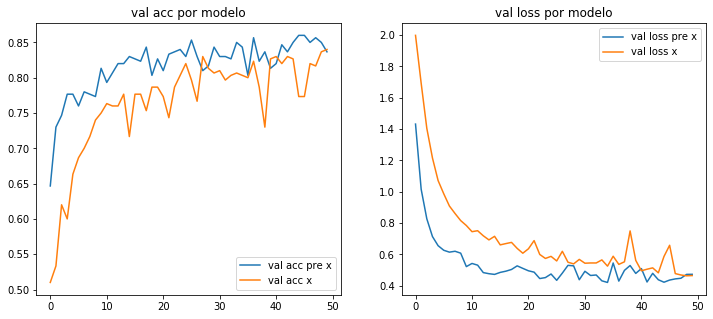

In [0]:
#se comparan ambos modelos, usando la data x (3% de los datos) y pre x (datos pre procesados por el autoencoder)

fig, axis = plt.subplots(1,2,figsize=(12,5))

axis[0].plot(np.arange(50), history_pre.history["val_acc"], label="val acc pre x")
axis[0].plot(np.arange(50), history.history["val_acc"], label="val acc x")
axis[0].set_title("val acc por modelo")
axis[0].legend()

axis[1].plot(np.arange(50), history_pre.history["val_loss"], label="val loss pre x")
axis[1].plot(np.arange(50), history.history["val_loss"], label="val loss x")
axis[1].set_title("val loss por modelo")
axis[1].legend()

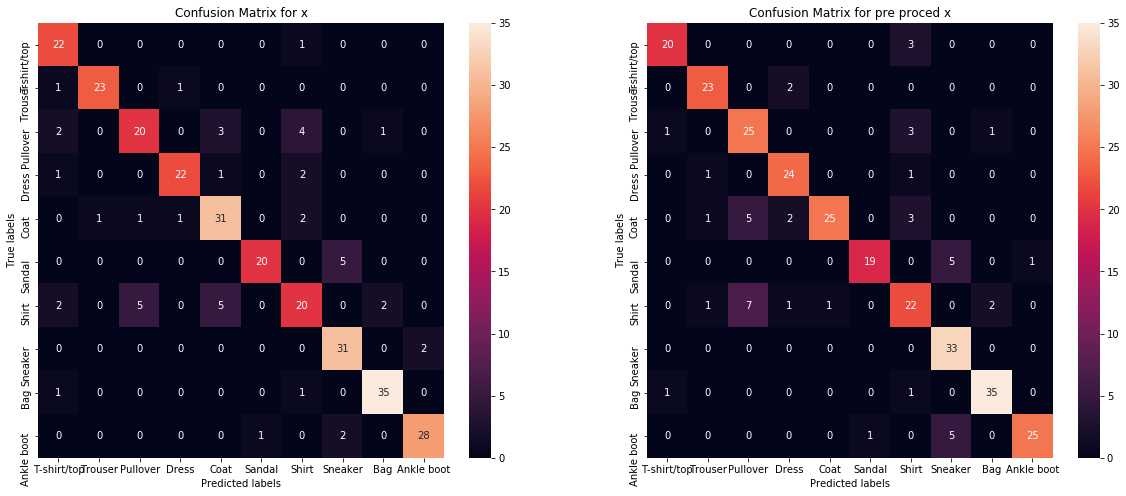

In [0]:
#se muestran matrices de confusion par ambos modelos
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
y_pred = model.predict(x_val)
pre_y_pred = model_pre.predict(pre_x_val)

label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fig, axis = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(confusion_matrix([np.where(r==1)[0][0] for r in y_val] ,[np.where(r==max(r))[0][0] for r in y_pred]),annot=True, ax = axis[0])
sns.heatmap(confusion_matrix([np.where(r==1)[0][0] for r in y_val] ,[np.where(r==max(r))[0][0] for r in pre_y_pred]),annot=True, ax = axis[1])

axis[0].set_xlabel('Predicted labels');
axis[0].set_ylabel('True labels'); 
axis[0].set_title('Confusion Matrix for x'); 

axis[0].xaxis.set_ticklabels(label); 
axis[0].yaxis.set_ticklabels(label);

axis[1].set_xlabel('Predicted labels');
axis[1].set_ylabel('True labels'); 
axis[1].set_title('Confusion Matrix for pre proced x'); 

axis[1].xaxis.set_ticklabels(label); 
axis[1].yaxis.set_ticklabels(label);

plt.show()

In [0]:
from sklearn.decomposition import PCA

#se aplica PCA con 588 componentes, la misma dimension que la compresion realizada por el autoencoder
pca = PCA(n_components=588)
pca_x_tr = pca.fit_transform(x_train_scaled)

pca = PCA(n_components=588)
pca_x_val = pca.fit_transform(x_val_scaled)

pca_x_tr, pca_x_test, pca_y_tr, pca_y_test = train_test_split(pca_x_tr, y_train, test_size= 0.97)
pca_x_val, pca_x_test, pca_y_val, pca_y_test = train_test_split(pca_x_val, y_val_full, test_size= 0.97)

pca_y_tr = to_categorical(pca_y_tr)
pca_y_val= to_categorical(pca_y_val)

In [0]:
#se entrena el modelo con la data comprimida mediante pca
model_pca = Sequential()
model_pca.add(Dense(500,activation="relu")) 
model_pca.add(Dense(300,activation="relu")) 
model_pca.add(Dense(300,activation="relu")) 
model_pca.add(Dense(10,activation="softmax")) 
model_pca.compile(optimizer=SGD(lr=0.002),loss='categorical_crossentropy', metrics=["acc"])
history_pca = model_pca.fit(pca_x_tr,pca_y_tr,epochs=50,validation_data=(pca_x_val,pca_y_val))

Train on 1800 samples, validate on 300 samples
Epoch 1/50
1800/1800 [==============================] - 7s 4ms/step - loss: 2.2210 - acc: 0.1728 - val_loss: 2.1999 - val_acc: 0.2333
Epoch 2/50
1800/1800 [==============================] - 0s 222us/step - loss: 2.1429 - acc: 0.3406 - val_loss: 2.1444 - val_acc: 0.3267
Epoch 3/50
1800/1800 [==============================] - 0s 223us/step - loss: 2.0660 - acc: 0.4544 - val_loss: 2.0894 - val_acc: 0.4233
Epoch 4/50
1800/1800 [==============================] - 0s 225us/step - loss: 1.9885 - acc: 0.5211 - val_loss: 2.0327 - val_acc: 0.4667
Epoch 5/50
1800/1800 [==============================] - 0s 214us/step - loss: 1.9087 - acc: 0.5572 - val_loss: 1.9744 - val_acc: 0.4967
Epoch 6/50
1800/1800 [==============================] - 0s 218us/step - loss: 1.8266 - acc: 0.5778 - val_loss: 1.9143 - val_acc: 0.5033
Epoch 7/50
1800/1800 [==============================] - 0s 241us/step - loss: 1.7439 - acc: 0.5856 - val_loss: 1.8529 - val_acc: 0.5033
Epo

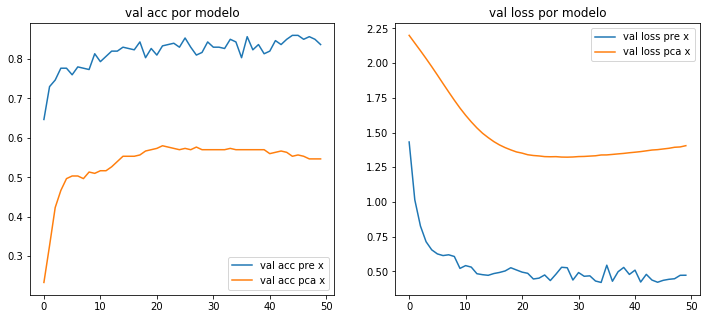

In [0]:
#se comparan los modelos entrenados mediante pca y por el autoencoder (pre x)
fig, axis = plt.subplots(1,2,figsize=(12,5))

axis[0].plot(np.arange(50), history_pre.history["val_acc"], label="val acc pre x")
axis[0].plot(np.arange(50), history_pca.history["val_acc"], label="val acc pca x")
axis[0].set_title("val acc por modelo")
axis[0].legend()

axis[1].plot(np.arange(50), history_pre.history["val_loss"], label="val loss pre x")
axis[1].plot(np.arange(50), history_pca.history["val_loss"], label="val loss pca x")
axis[1].set_title("val loss por modelo")
axis[1].legend()

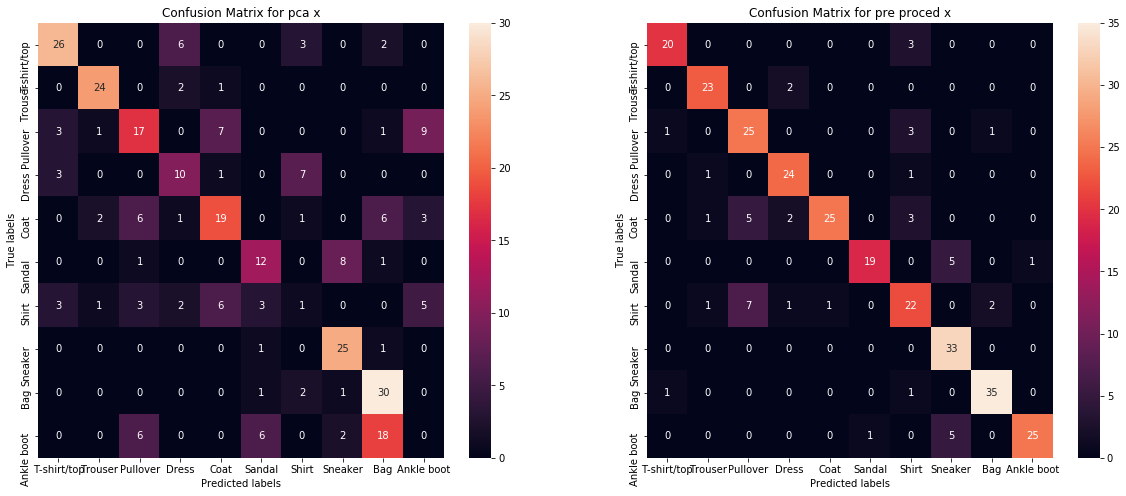

In [0]:
#se muestran las matrices de confusion para ambos modelos
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
pca_y_pred = model_pca.predict(pca_x_val)
pre_y_pred = model_pre.predict(pre_x_val)

label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

fig, axis = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(confusion_matrix([np.where(r==1)[0][0] for r in pca_y_val] ,[np.where(r==max(r))[0][0] for r in pca_y_pred]),annot=True, ax = axis[0])
sns.heatmap(confusion_matrix([np.where(r==1)[0][0] for r in y_val] ,[np.where(r==max(r))[0][0] for r in pre_y_pred]),annot=True, ax = axis[1])

axis[0].set_xlabel('Predicted labels');
axis[0].set_ylabel('True labels'); 
axis[0].set_title('Confusion Matrix for pca x'); 

axis[0].xaxis.set_ticklabels(label); 
axis[0].yaxis.set_ticklabels(label);

axis[1].set_xlabel('Predicted labels');
axis[1].set_ylabel('True labels'); 
axis[1].set_title('Confusion Matrix for pre proced x'); 

axis[1].xaxis.set_ticklabels(label); 
axis[1].yaxis.set_ticklabels(label);

plt.show()

### 2.i Denoising Autoencoder 

Otra utilidad que se le ha dado a los autoencoders es la posibilidad de utilizarlos para separar ruido de información. Para entrenar tal tipo de modelo, la idea es simple: utilizar como datos de entrada imagenes a las cuales se les ha agregado artificialmente ruido y como objetivo la imagen original sin ruido. 

Entrene alguna arquitectura de autoencoder que le parezca apropiada para la tarea utilizando algún tipo de ruido aleatorio. Puede utilizar cambios en valores de pixeles aleatoriamente, o por ejemplo "promediar" ponderadamente la imagen original con alguna otra imagen del dataset ligeramente modificada. Puede utilizar las librerías `random` de `numpy` o utilizar por ejemplo el `ImageDataGenerator` que utilizamos en la tarea anterior para generar imágenes similares con las cuales "sumar" ruido. Sea creativo, puede crear el ruido que desee. Idealmente, considerando la naturaleza del problema que se buscaría modelar (eliminar ruido real de mediciones), la naturaleza del ruido agregado debe ser estocástica y no puede "repetirse" el mismo patron de ruido a lo largo de todo el entrenamiendo, es decir, si agregó un ruido estocástico a cada imagen del conjunto, este proceso debe iterarse igualmente luego de cada época de entrenamiento, para evitar que la red aprenda un patrón especifico de ruido, si no aprenda realmente a diferenciar ruido sin información de la información suyaciente a la imagen. 

Una vez esté satisfecho con la red, muestre ejemplos de la imagen con ruido, la imagen original y la imagen reconstruida. Pruebe igualmente entregarle a la red nuevas.

**R**: El ruido escogido fue aplicar una rotación de 90 grados a cada imagen (el grado de rotación es un número aleatorio entre 0 y 90) y esta imagen rotada promediarla con la imagen original. Se puede ver que la red logra reconstruir bien la imagen original a partir de la imagen con ruido. Por cada iteración del entrenamiento se vuelve a rotar cada imagen original de nuevo, por lo que cada vez se usan imagenes rotadas de distinta forma.

Sin embarlo, al entregarle un nuevo tipo de ruido que la red no conoce, como lo es agregar ruidos gaussianos a cada pixel de la imagen, la red no logra limpiar el ruido.

In [0]:
#funcion que agrega un tipo de ruido a cada imagen de data
def genNoiseData(data, alpha = 0.5, h_flip = False, v_flip = False, w_shift = 0.0, h_shift = 0.0, rot = 0.0, zoom = 0.0, shear = 0.0, w = 28, h = 28, z = 1):
  noise = []

  datagen = ImageDataGenerator(
    horizontal_flip=h_flip,
    width_shift_range=w_shift, #random shift, para imagenes no centradas
    height_shift_range=h_shift,
    rotation_range=rot,
    #zca_whitening=True, #reduce la redundancia en la matriz de pixeles
    zoom_range = zoom,  
    shear_range = shear
    )
  
  datagen.fit(data.reshape(data.shape[0],w,h,z))
  idx = 0

  for X_batch in datagen.flow(data.reshape(data.shape[0],w,h,z), shuffle=False, seed=1, batch_size=32):
    for i in range(len(X_batch)):
      noise.append(alpha*X_batch[i]+(1-alpha)*data.reshape(data.shape[0],w,h,z)[idx])
      idx += 1
    if (idx == data.shape[0]):
      return np.array(noise).reshape(-1,w*h)

#clase usada para modificar el conjunto x para cada epoca
class MySequence(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.epoch = 0
        self.batch_size = batch_size
        self.og_x = x_set
    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return np.array([batch_x,batch_y])
        
    def on_epoch_end(self):
        self.x = genNoiseData(self.y, rot=90).reshape(-1,28,28,1)
        self.epoch += 1

In [0]:
#se genera las iamgenes con ruido
x_tr_noise = genNoiseData(x_train_scaled, rot=90)
x_val_noise = genNoiseData(x_val_scaled, rot=90)

In [0]:
#se instancia la clase
s = MySequence(x_tr_noise.reshape(-1,28,28,1),x_train_scaled.reshape(-1,28,28,1),32)

#se entrena la red
autoencoder_con = Sequential()

#encoding
autoencoder_con.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(28,28,1)))

autoencoder_con.add(Conv2D(filters=128,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

autoencoder_con.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

autoencoder_con.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

autoencoder_con.add(Conv2D(filters=64,
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))

autoencoder_con.add(MaxPooling2D(pool_size=(2, 2), 
                       strides=(2,2)))

#decoding
autoencoder_con.add(Deconvolution2D(32, 2, strides=1,activation='relu', padding='same'))
autoencoder_con.add(Deconvolution2D(64, 2, strides=2,activation='relu', padding='same'))
autoencoder_con.add(Deconvolution2D(1, 2, strides=2,activation='sigmoid', padding='same'))

autoencoder_con.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

h = autoencoder_con.fit_generator(s, epochs=20,  validation_data=(x_val_noise.reshape(-1,28,28,1),x_val_scaled.reshape(-1,28,28,1)))

Epoch 1/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3096 - acc: 0.5041 - val_loss: 0.2853 - val_acc: 0.5052
Epoch 2/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.2787 - acc: 0.5082 - val_loss: 0.2763 - val_acc: 0.5065
Epoch 3/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2718 - acc: 0.5088 - val_loss: 0.2712 - val_acc: 0.5067
Epoch 4/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2679 - acc: 0.5091 - val_loss: 0.2682 - val_acc: 0.5071
Epoch 5/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2652 - acc: 0.5093 - val_loss: 0.2665 - val_acc: 0.5071
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2633 - acc: 0.5094 - val_loss: 0.2646 - val_acc: 0.5073
Epoch 7/20
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2620 - acc: 0.5095 - val_loss: 0.2635 - val_acc: 0.5072
Epoch 8/20
1875/1875 [==========================

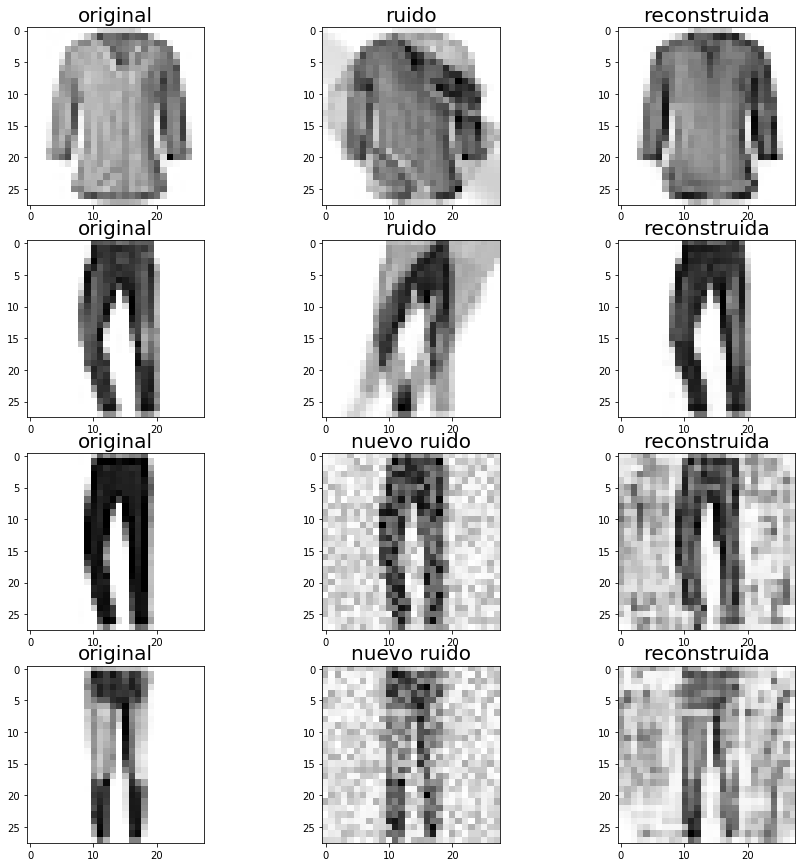

In [0]:
#se define un nuevo tipo de ruido, que consiste en promediar el valor del pixel con un random entre 0 y 0.7
def addNoise(idx):
  new = np.copy(x_val_scaled.reshape(-1,28*28)[idx])

  for i in range(28):
    for j in range(28):
      new[i*28+j] = (new[i*28+j] + uniform(0,0.7))/2
      
  return new

fig, axis = plt.subplots(4,3,figsize=(15,15))

#se muestran las iamgenes originales, a las que se le aplico ruido, y a las reconstruidas por la red a partir de las imagenes con ruido
for j in range(2,4):
  new = addNoise(j+2)
  axis[j%4-2,0].imshow(x_val_scaled[j+2].reshape(-1,28*28).reshape(28,28),cmap='Greys')
  axis[j%4-2,0].set_title("original",fontsize=20)

  axis[j%4-2,1].imshow(x_val_noise[j+2].reshape(-1,28*28).reshape(28,28),cmap='Greys')
  axis[j%4-2,1].set_title("ruido",fontsize=20)

  axis[j%4-2,2].imshow(autoencoder_con.predict(x_val_noise[j+2].reshape(-1,28,28,1)).reshape(28,28),cmap='Greys')
  axis[j%4-2,2].set_title("reconstruida",fontsize=20)

for j in range(2):
  new = addNoise(j+2)
  axis[j%4+2,0].imshow(x_val_scaled[j+2].reshape(-1,28*28).reshape(28,28),cmap='Greys')
  axis[j%4+2,0].set_title("original",fontsize=20)

  axis[j%4+2,1].imshow(new.reshape(28,28),cmap='Greys')
  axis[j%4+2,1].set_title("nuevo ruido",fontsize=20)

  axis[j%4+2,2].imshow(autoencoder_con.predict(new.reshape(-1,28,28,1)).reshape(28,28),cmap='Greys')
  axis[j%4+2,2].set_title("reconstruida",fontsize=20)

### 2.j Generación de imágenes

Otra utilización posible que podría darse, quizás, a los autoencoders, es utilizar los decoders para generar nuevas imagenes. La idea de esto sería considerar que la habilidad que tiene la sección decoder de generar una imagen a partir de una representación de menor dimensionalidad puede aprovecharse. 

Para esto, extraiga la sección de encoding y la sección de decoding de alguno de los autoencoders entrenados que prefiera. Obtenga los valores de la representación interna de las imagenes usando el encoder para calcularlos. Luego agréguele a esta representación algún ruido de su preferencia, y calcule la imagen resultante utilizando el decoder. ¿Qué observa? Muestre las imagenes obtenidas junto con otras imagenes de la misma categoría que la imagen que utilizó originalmente. Preube con distintos valores de ruido.

Pruebe también, por ejemplo, calcular la imagen obtenida al promediar las representaciones comprimidas de varias (o todas) las imagenes de una clase. Utilice el encoder para generar imagenes a partir de otros valores que se les ocurran y especule sobre el por qué la imagen obtenida se asimila o no a las imagenes del dataset. 

**R**: Para comprimir las imágenes se usó el autoencoder deep y convolucional, y se puede ver que para ambos autoencoders se conserva el ruido que se aplicó a la imagen que ya pasó por el encoding, aunque usando en autoencoder convolucional el ruido generado es menor. 

Se observa que el promedio de las imagenes compromidas por clase usando el autoencoder convolucional se parecen a las imagenes reales de la clase en general. Para la clase de sandalia se obtiene una imagen un poco desvanecida, lo que puede significar que en esa clase las imágenes son más diferentes entre si.


se aplico rotacion de 270 grados
Sneaker, Dress


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:940: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1, 7, 7, 64) (64 channels).
  ' channels).')
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:127: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1, 7, 7, 64) (64 channels).
  str(self.x.shape[channels_axis]) + ' channels).')


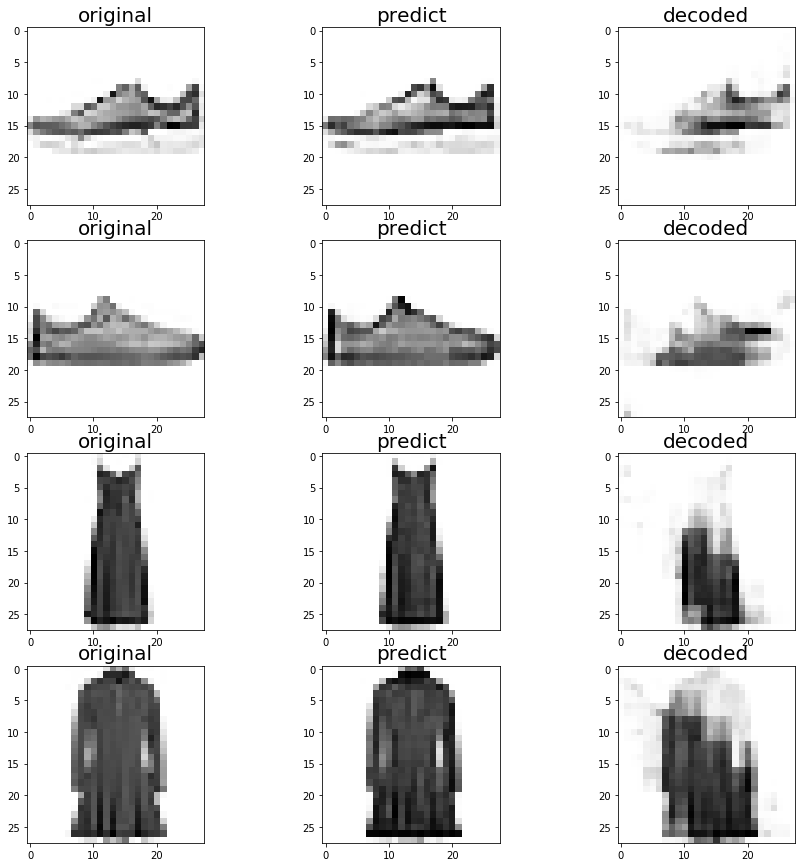

In [0]:
## SE USA AUTOENCODER CONVOLUCIONAL

#se comprimen las iamgenes mediante el encoder del autoencoder convolucional
fig, axis = plt.subplots(4,3,figsize=(15,15))

decoder = Sequential()
decoder.add(autoencoder_con.get_layer(index=6))
decoder.add(autoencoder_con.get_layer(index=7))
decoder.add(autoencoder_con.get_layer(index=8))

encoder = Sequential()
encoder.add(autoencoder_con.get_layer(index=0))
encoder.add(autoencoder_con.get_layer(index=1))
encoder.add(autoencoder_con.get_layer(index=2))
encoder.add(autoencoder_con.get_layer(index=3))
encoder.add(autoencoder_con.get_layer(index=4))
encoder.add(autoencoder_con.get_layer(index=5))

class_0 = x_val_scaled[y_val == 7]
class_1 = x_val_scaled[y_val == 3]

classes = [class_0, class_1]

print("se aplico rotacion de 270 grados")
print('Sneaker, Dress')
for j in range(4):
  im = classes[j//2][j%2].reshape(-1,28*28)

  #se comprime la imagen original
  im_enc = encoder.predict(im.reshape(-1,28,28,1))

  #se le aplica ruido
  im_enc_ruido = genNoiseData(np.array([im_enc]), w=7, h=7, z = 64, rot=270)

  axis[j,0].imshow(im.reshape(28,28),cmap='Greys')
  # se muestra la imagen original
  axis[j,0].set_title("original",fontsize=20)

  axis[j,1].imshow(decoder.predict(im_enc).reshape(28,28),cmap='Greys')
  # se muestra la imagen reconstruida a partir de la imagen original
  axis[j,1].set_title("predict",fontsize=20)

  axis[j,2].imshow(decoder.predict(im_enc_ruido.reshape(1,7,7,64)).reshape(28,28),cmap='Greys')
  # se muestra la iamgen reconstruida a partir de la imagen con ruido
  axis[j,2].set_title("decoded",fontsize=20)


primeras 2 filas se aplicó rot=45, las 2 sig rot=90
Sneaker, Dress


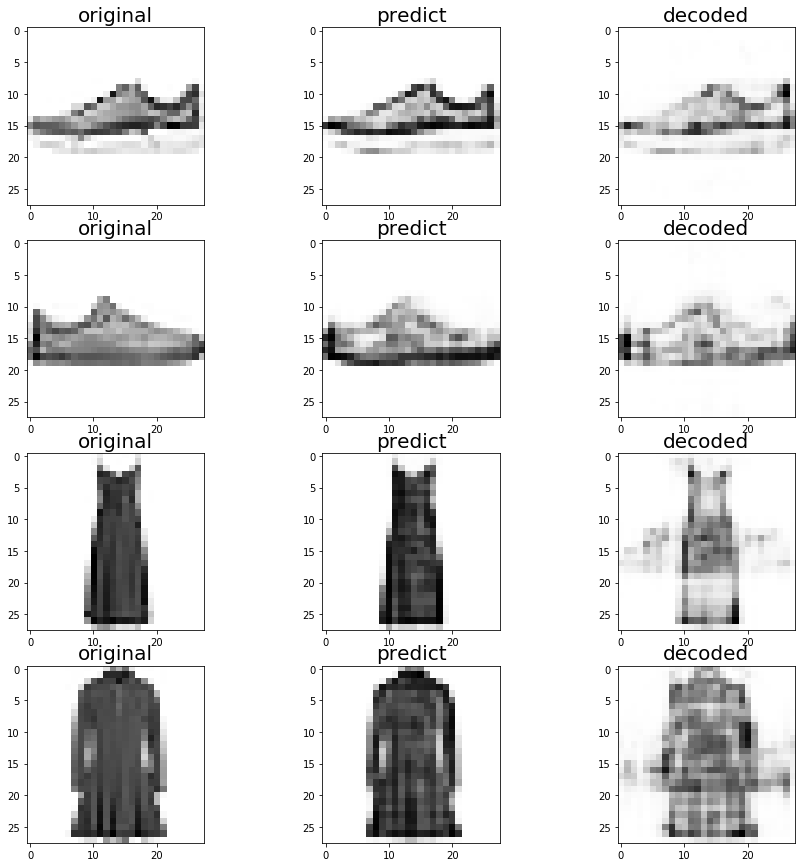

In [0]:
##SE USA AUTOENCODER DENSO
#se comprimen las iamgenes mediante el encoder del autoencoder denso
fig, axis = plt.subplots(4,3,figsize=(15,15))

decoder = Sequential()
decoder.add(autoencoder_den.get_layer(index=1))
decoder.add(autoencoder_den.get_layer(index=2))

encoder = Sequential()
encoder.add(autoencoder_den.get_layer(index=0))

class_0 = x_val_scaled[y_val == 7]
class_1 = x_val_scaled[y_val == 3]

classes = [class_0, class_1]

print("primeras 2 filas se aplicó rot=45, las 2 sig rot=90")
print('Sneaker, Dress')
for j in range(4):
  im = classes[j//2][j%2].reshape(-1,28*28)
  s#se comprime
  im_enc = encoder.predict(im)
  # se aplica ruido
  im_enc_ruido = genNoiseData(np.array([im_enc]), w=28, h=21, rot=45*(j%2+1))

  #se muestran las imagenes de la misma forma anterior
  axis[j,0].imshow(im.reshape(28,28),cmap='Greys')
  axis[j,0].set_title("original",fontsize=20)

  axis[j,1].imshow(decoder.predict(im_enc).reshape(28,28),cmap='Greys')
  axis[j,1].set_title("predict",fontsize=20)

  axis[j,2].imshow(decoder.predict(im_enc_ruido).reshape(28,28),cmap='Greys')
  axis[j,2].set_title("decoded",fontsize=20)


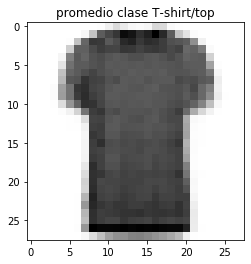

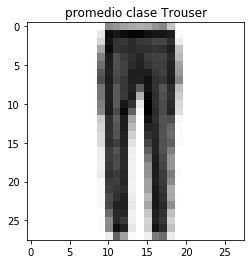

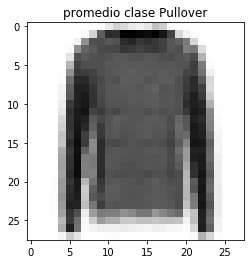

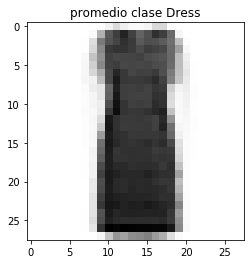

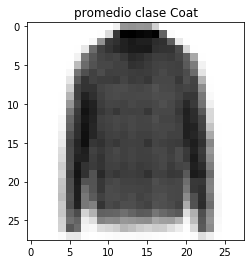

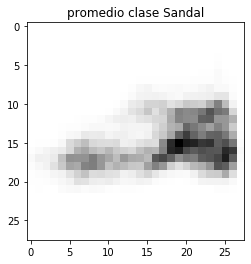

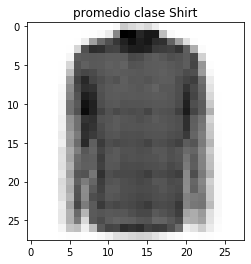

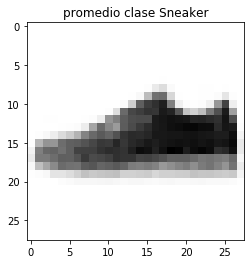

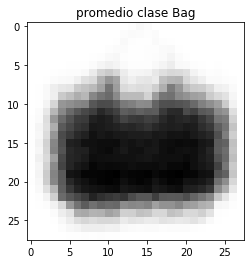

In [0]:
#se promedian las iamgenes por clase mediante la compresion del encoder convolucional

label = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
for i in range(9):
  clss = x_val_scaled[y_val == i]
  #se comprime mediante encoder convolucional
  enc_clss = encoder.predict(clss.reshape(-1,28,28,1))
  
  prom_enc_clss = (sum(enc_clss)/enc_clss.shape[0])
  plt.imshow(decoder.predict(prom_enc_clss.reshape(-1,7,7,64)).reshape(28,28), cmap="Greys")
  plt.title("promedio clase "+ label[i])
  plt.show()

# 3 - GAN para MNIST 

Probablemente uno de los desarrollos recientes del area de las redes neuronales más interesantes son las GAN, o _Generative Adversarial Networks_. Estas han deslumbrado al mundo los últimos años generando resultados inesperados, como los llamados _deep fakes_ (https://www.youtube.com/watch?v=dh-QM54RuAs), caras no no existentes generadas artificialmente, entre muchas otras aplicaciones de las cuales las más creativas y divertidas son ampliamente divulgadas. Estos resultados nos dan cuenta que estas redes cuando son implementadas correctamente tienen la habilidad de realizar tareas muy especificas logrando desempeños que en logran incluso en algunos casos engañar a observadores humanos.

<img src="https://pathmind.com/images/wiki/GANs.png" background="white">

Dependiendo del problema que uno quiera resolver las GAN no requieren datos etiquetados. Esto lo logran gracias a su estructura adversarial, es decir, donde simultaneamente se entrenan dos redes, una especializada en generar datos y otra red especializada en discriminar datos verdaderos de datos falsos, en su configuración más simple al menos. En esta parte de la tarea deberan generar una red de este tipo que genere dígitos que aparenten ser hechos a mano. Para esto utilizaremos las imagenes de entrenamiento del dataset MNIST que ya conocen.

A diferencia de otras preguntas, en esta deberán tener mayor iniciativa propia y solamente se presentará una estructura básica la cual ustedes deberán completar y ajustar para que el entrenamiento se realice bien. Además deberán:

* Graficar alguna medida del desempeño tanto del generador como del disciminador (por ejemplo f1-score, precision and recall o accuracy) a lo largo del entrenamiento. ¿Variaciones en esta medidas representan mejoras en nuestra red?

* Visualizar imagenes generadas por el generador a lo largo del entrenamiento y ver su evolución (idealmente graficar epocas representativas de etapas del entrenamiento)
* Explicar el comportamiento de la evolución de ambos desempeños y por qué no necesariamente esos valores representan que la red alcance su cometido
* Describir, teórica o práctiamente, que ocurriría si la red generadora no pudiera por algún motivo (divergencia en entrenamiento, excesivo _underfitting_, etc) generar imágenes razonables.
* Describir la contraparte de lo que ocurriría si la red discriminadora no pudiera aprender a diferenciar imagenes reales de ruido aleatorio.
* Una vez teniendo una red entrenada a completitud, muestre varias imagenes generadas. ¿Se logra obtener imagenes convincentes?
* Igualmente con la red entrenada, guarde el ruido aleatorio que origina dos números reconocibles distintos. ¿Qué ocurre si vemos las imagenes generadas por el generador al entregarle puntos distribuidos linealmente entre los dos puntos?
* Proponga o investigue como realizaría las siguientes tareas:
    * A partir de una base de datos de imagenes RGB, entrenar una GAN que genere imágenes a color convincentes a partir de imagenes en blanco y negro, es decir que deduzca el color a partir de imagenes en blanco y negro.
    * A partir de una base de datos de cuadros de paisajes reales y las fotos correspondientes al cuadro, entrenar una GAN que permita transformar fotografias a cuadros y viceversa (puede utilizar más de 2 redes)
    * Proponga un problema que les parezca interesante y una estructura de GAN que le permitiría resolverlo
    
Esta pregunta si bien es libre, debe ser redactada de manera ordenada. La recomendación es separar tanto el código como las respuestas en varios bloques, y enunciar nuevamente las preguntas o redactar sus respuestas de manera que no quede duda a qué pregunta en particular estan respondiendo. El código de abajo está incompleto y es solo una guía (de todas formas la estructura y entrenamiento de la red "funciona", aunque se recomienda prueben pequeños cambios), puede crear funciones, cambiar nombres e incluso las redes mismas como estimen conveniente, la intención es que se aproximen a la exploración que deberán hacer si alguna vez les toca resolver un problema real con ANN y luego reportar sus resultados. 

<!-- glhf -->

In [0]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import*
from keras.optimizers import*
from keras import backend as K
import sys
import warnings
warnings.filterwarnings("ignore")

(x,_),(_,_) = mnist.load_data()
x = x.reshape((-1,28,28,1)).astype(np.float32)
x = x/255
input_shape = x.shape[1:]

In [0]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

* Visualizar imagenes generadas por el generador a lo largo del entrenamiento y ver su evolución (idealmente graficar epocas representativas de etapas del entrenamiento)

23400/23400 [===========================>] - d_loss: 0.6970000267028809 - g_loss: 0.7429999709129333

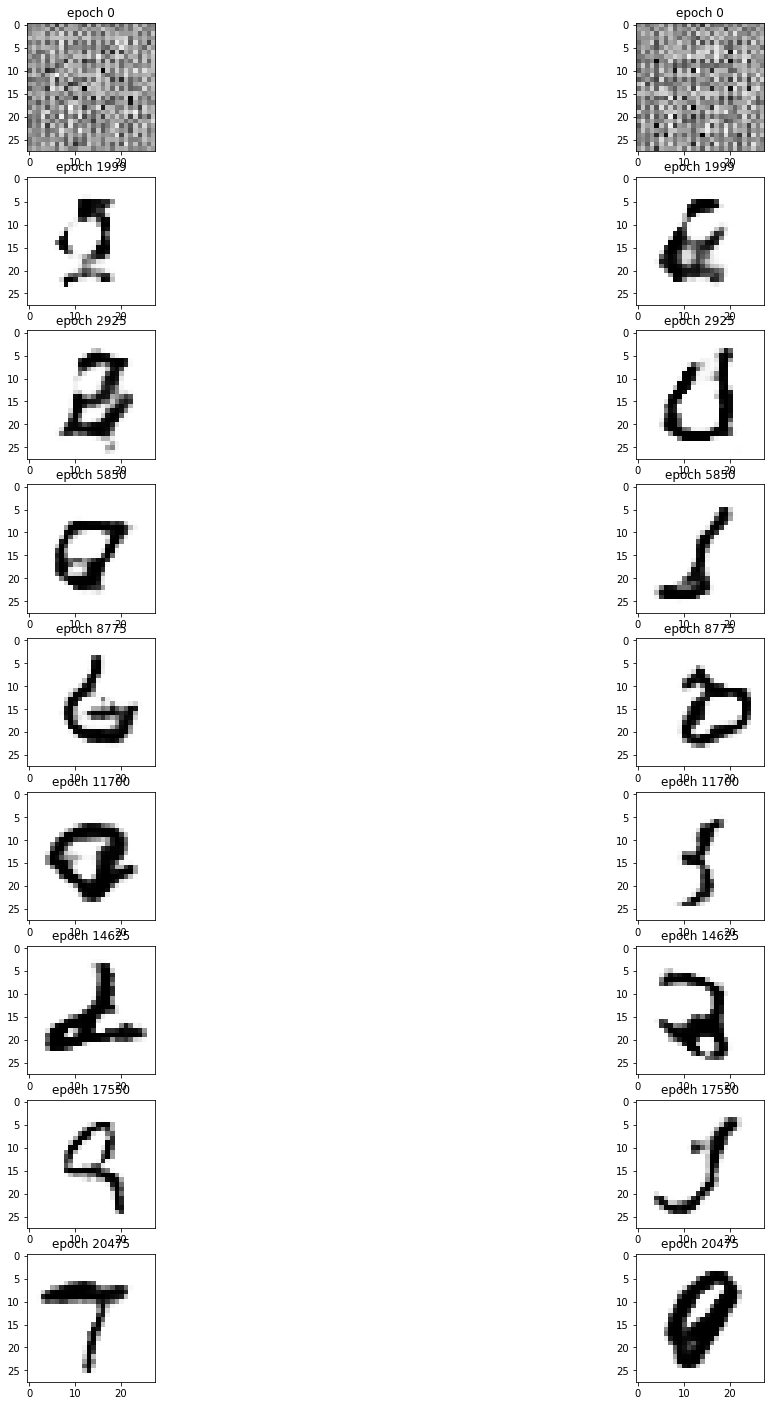

In [0]:
#HIPERPARAMETROS
latent_dim = 100
n_epochs=234*100
batch_size = 256
dropout_prob = 0.4

# Definicion modelo del discriminador
discriminator_net = Sequential()
discriminator_net.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=(28,28,1)))
discriminator_net.add(LeakyReLU(alpha=0.2))
discriminator_net.add(Dropout(dropout_prob))
discriminator_net.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
discriminator_net.add(LeakyReLU(alpha=0.2))
discriminator_net.add(Dropout(dropout_prob))
discriminator_net.add(Flatten())
discriminator_net.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.0002, beta_1=0.5)
discriminator = Sequential()
discriminator.add(discriminator_net)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', recall_m, f1_m])


# Definicion modelo del generador

generator_net = Sequential()
# foundation for 7x7 image
n_nodes = 128 * 7 * 7
generator_net.add(Dense(n_nodes, input_dim=latent_dim))
generator_net.add(LeakyReLU(alpha=0.2))
generator_net.add(Reshape((7, 7, 128)))
# upsample to 14x14
generator_net.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator_net.add(LeakyReLU(alpha=0.2))
# upsample to 28x28
generator_net.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
generator_net.add(LeakyReLU(alpha=0.2))
generator_net.add(Conv2D(1, (7,7), activation='sigmoid', padding='same'))

generator = Sequential()
generator.add(generator_net)

# Defincion modelo GAN

# Se hacen no entrenables los pesos del discriminador
d = discriminator_net
d.trainable = False
# Se define la GAN
gan = Sequential()
# Se añade el generador
gan.add(generator_net)
# Se añade el discriminador
gan.add(d)
# Compilacion del modelo
opt = Adam(lr=0.0002, beta_1=0.5)
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy', recall_m, f1_m])

# Cantidad de imagenes que se quieren imprimir
n_plot = 8
# Indice de la imagen a imprimir
idx_img = 0
# Guardar resultado cada x epochs
save_results_every = 100
# Cantidad de epochs cada cuanto se imprime una imagen
plot_every = n_epochs//n_plot

fig, axis = plt.subplots(n_plot+1,2,figsize=(20,25))

metrics_dis = []
metrics_gen = []

# train model
for i in range(n_epochs):
    # Se selecciona de manera random imagenes del dataset para el entrenamiento
    idx = np.random.randint(0, x.shape[0], int(batch_size/2))
    images_train = x[idx]
    # Se genera imagenes falsas
    noise = np.random.normal(0, 1, (int(batch_size/2), latent_dim))
    images_fake = generator_net.predict(noise)
    # Conjunto de entrenamiento con imagenes reales y falsas
    
    X = np.concatenate((images_train, images_fake))
    #y = np.concatenate((np.ones(int(batch_size/2)), np.zeros(int(batch_size/2))))
    
    # target suavizado
    y = np.concatenate((np.random.uniform(0.9,1,int(batch_size/2)),np.random.uniform(0,0.1,int(batch_size/2))))
    # entrenamiento del discriminador
    response_dis = discriminator.train_on_batch(X, y)
    # entrenamiento gan
    noise = np.random.normal(0, 1, (int(batch_size/2), latent_dim))
    response_gen = gan.train_on_batch(noise, np.random.uniform(0.9,1,int(batch_size/2)))
    #save results
    if i%save_results_every==0:
        metrics_dis.append(response_dis)
        metrics_gen.append(response_gen)
    #plots
    if (i%plot_every==0 or i==total_epochs-1):
      axis[idx_img,0].imshow(images_fake[0].reshape(28,28), cmap="Greys")
      axis[idx_img,0].set_title("epoch %d" % i)

      axis[idx_img,1].imshow(images_fake[1].reshape(28,28), cmap="Greys")
      axis[idx_img,1].set_title("epoch %d" % i)

      idx_img += 1
    #barra de carga
    percent = float(i+1) / n_epochs
    arrow = '=' * int(round(percent * 28)-1) + '>'
    spaces = ' ' * (28 - len(arrow))

    sys.stdout.write("\r{0}/{1} [{2}] - d_loss: {3} - g_loss: {4}".format(i+1, n_epochs, arrow + spaces, round(response_dis[0], 3), round(response_gen[0], 3)))
    sys.stdout.flush()

* Graficar alguna medida del desempeño tanto del generador como del disciminador (por ejemplo f1-score, precision and recall o accuracy) a lo largo del entrenamiento. ¿Variaciones en esta medidas representan mejoras en nuestra red?

**R**: No necesariamente puesto que un mejor o peor desempeño de estas medidas no va a implicar una mejor o peor imagen generada

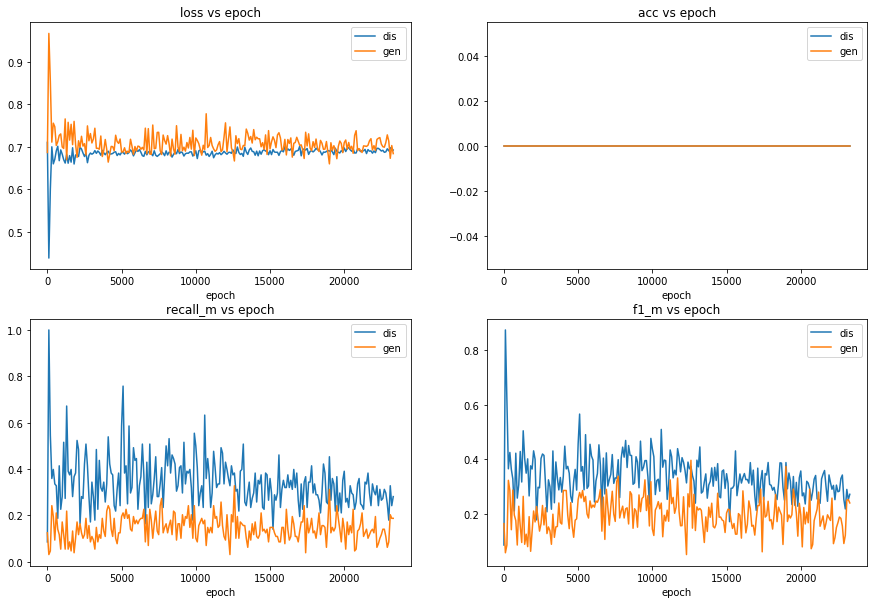

In [0]:
# Graficos metricas
# se muestran los graficos usando un modelo con target suavizado, es decir, envés de usar sólo los valores de 0 y 1, 
#    ahora envés de 0 se usa un random entre 0 y 0.1 y envés de 1 se usa un random entre 0.9 y 1
metrics_gen = np.array(metrics_gen)
metrics_dis = np.array(metrics_dis)

fig, axis = plt.subplots(2,2,figsize=(15,10))

for i in range(4):
  axis[i//2,i%2].plot(np.arange(n_epochs, step=save_results_every), metrics_dis[:,i], label="dis")
  axis[i//2,i%2].plot(np.arange(n_epochs, step=save_results_every), metrics_gen[:,i], label="gen")
  axis[i//2,i%2].set_title(discriminator.metrics_names[i]+" vs epoch")
  axis[i//2,i%2].set_xlabel("epoch")
  axis[i//2,i%2].legend()

  ##  LABELS ENTRE 0 - 0.1 Y 0.9 - 1

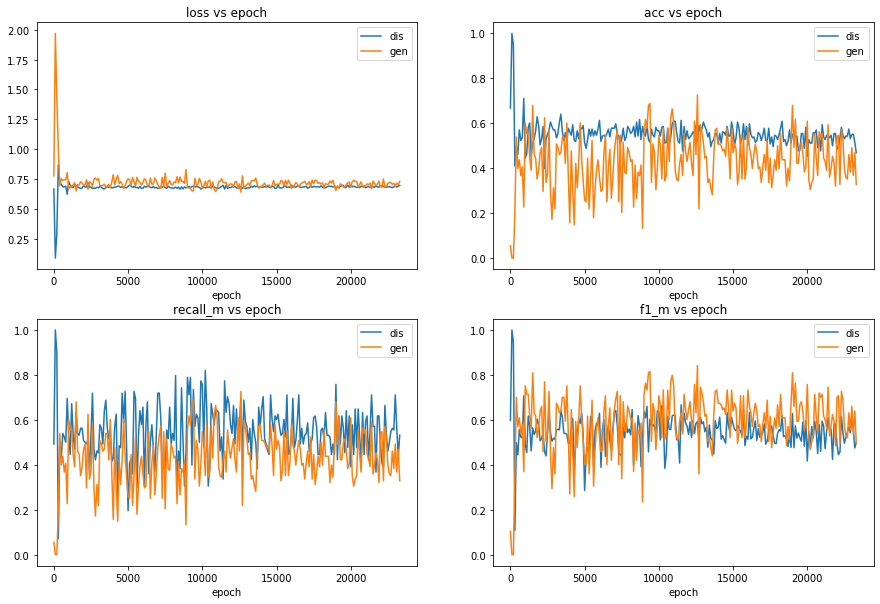

In [0]:
# se muestran los graficos usando un modelo que usa los target 0 y 1, sin valores suavizados

metrics_gen = np.array(metrics_gen)
metrics_dis = np.array(metrics_dis)

fig, axis = plt.subplots(2,2,figsize=(15,10))

for i in range(4):
  axis[i//2,i%2].plot(np.arange(n_epochs, step=save_results_every), metrics_dis[:,i], label="dis")
  axis[i//2,i%2].plot(np.arange(n_epochs, step=save_results_every), metrics_gen[:,i], label="gen")
  axis[i//2,i%2].set_title(discriminator.metrics_names[i]+" vs epoch")
  axis[i//2,i%2].set_xlabel("epoch")
  axis[i//2,i%2].legend()

##  LABELS SON 0 Y 1

* Explicar el comportamiento de la evolución de ambos desempeños y por qué no necesariamente esos valores representan que la red alcance su cometido

**R**: La idea de un red GAN es que el generador cree imagenes que logren engañar al discriminador, sin embargo un buen desempeño de la red no significa que esta alcance su cometido. Si el discriminador es bueno y el generador logra engañarlo, entonces la red alcanzara su cometido, pero si el discriminador tiene un mal desempeño, entonces la red no logrará su cometido.

* Describir, teórica o práctiamente, que ocurriría si la red generadora no pudiera por algún motivo (divergencia en entrenamiento, excesivo _underfitting_, etc) generar imágenes razonables.

**R**: Si la red generadora no pudiera por algún motivo generar imágenes razonables, el desempeño del discriminador mejoraria significativamente y el desempeño del generador sería muy malo. Esto se comprobó prácticamente, donde el generador no generaba buenas imágenes y el discriminador, por lo tanto, siempre reconocía que eran imágenes falsas.

* Describir la contraparte de lo que ocurriría si la red discriminadora no pudiera aprender a diferenciar imagenes reales de ruido aleatorio.

Si la red discriminadora no pudiera aprender a diferenciar imagenes reales de ruido aleatorio, desempeño del generador mejoraría, dando un falso indicio de que la red GAN tiene un buen desempeño.

* Una vez teniendo una red entrenada a completitud, muestre varias imagenes generadas. ¿Se logra obtener imagenes convincentes?

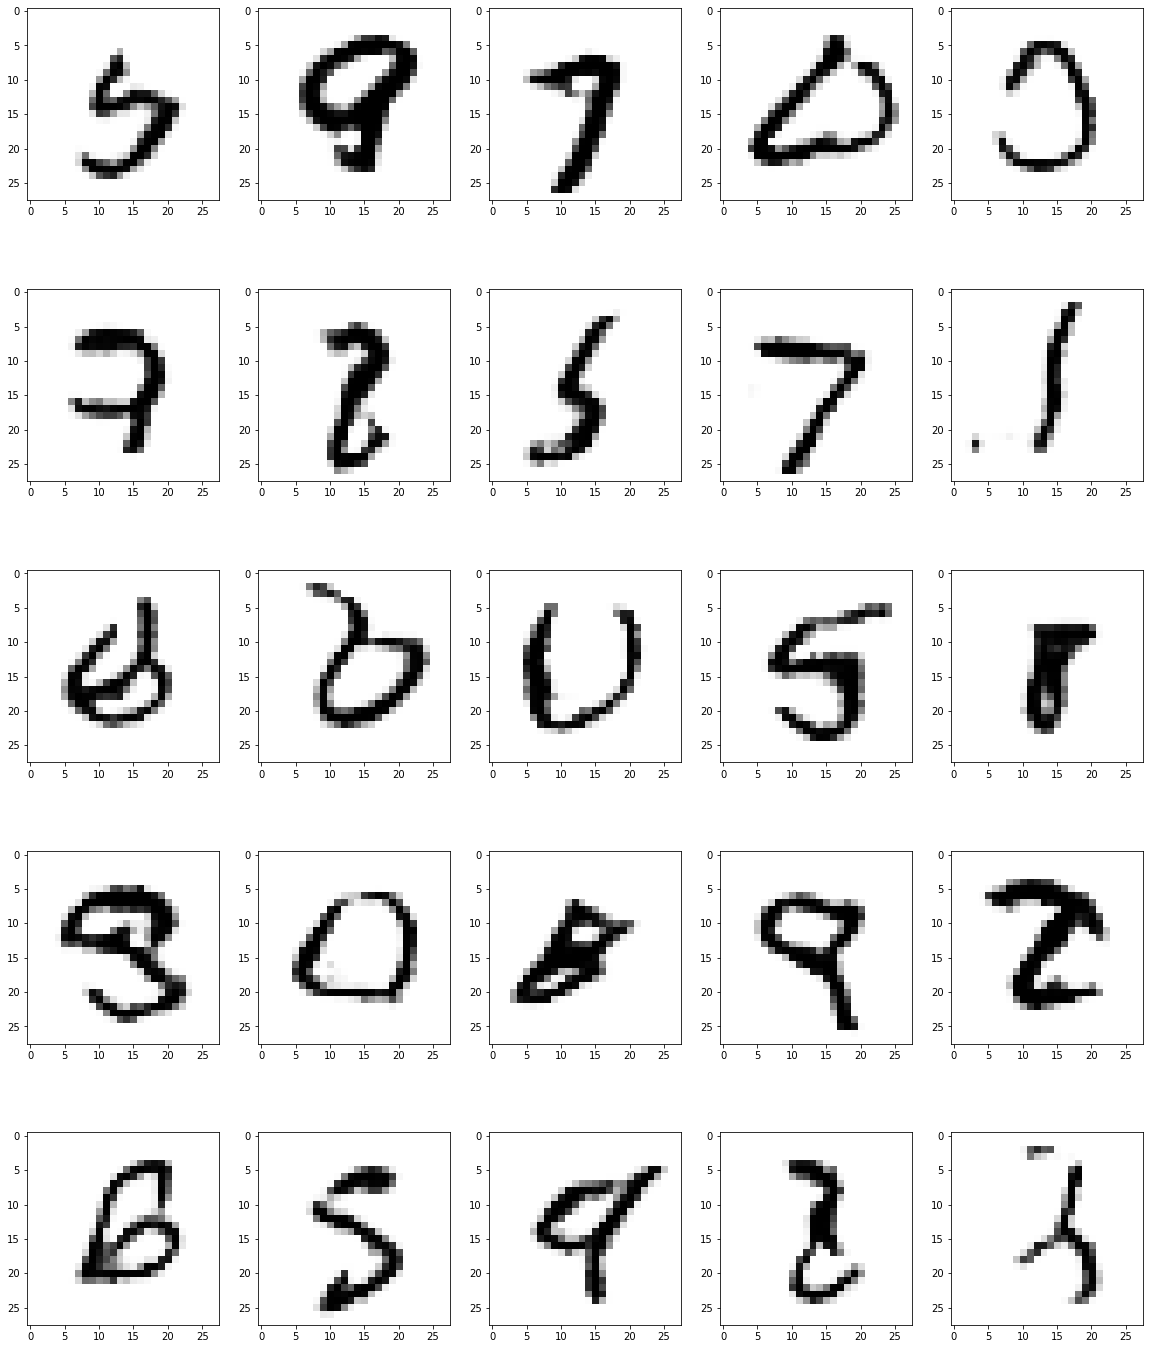

In [0]:
# imagenes usadas con el modelo que usa el target suavizado

fig, axis = plt.subplots(5,5,figsize=(20,25))

for i in range(25):
  noise = np.random.normal(0, 1, latent_dim).reshape(1,100)
  axis[i//5,i%5].imshow(generator.predict(noise).reshape(28,28), cmap="Greys")

  ##  LABELS ENTRE 0 - 0.1 Y 0.9 - 1

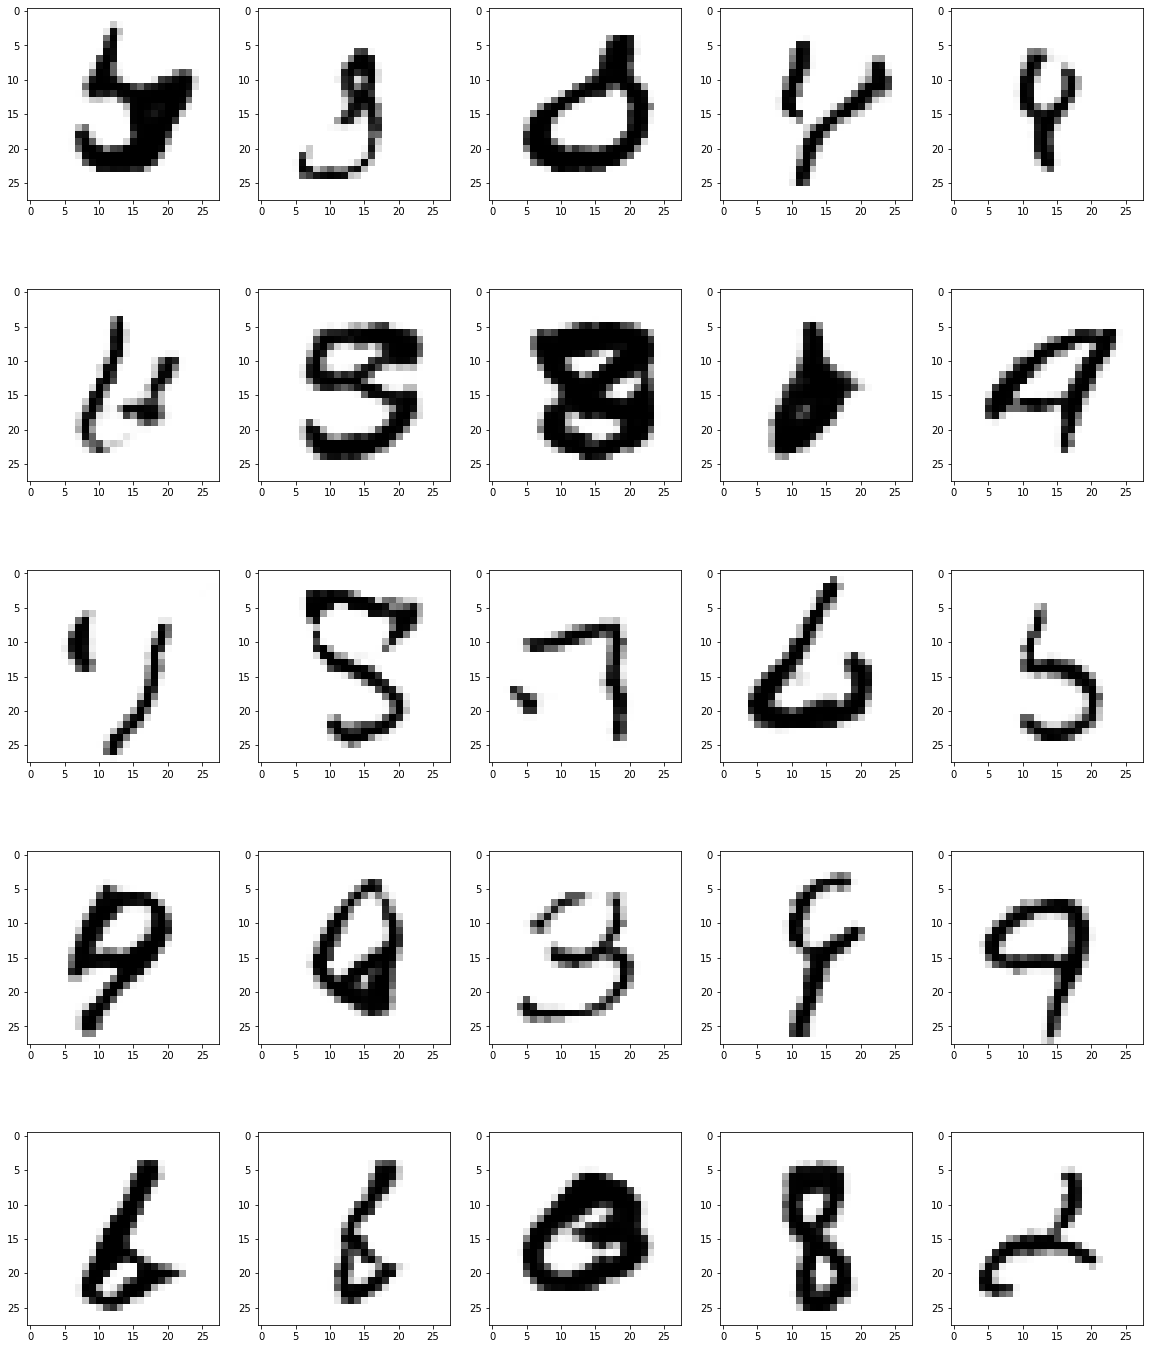

In [0]:
# imagenes usadas con el modelo que usa el target no suavizado, es decir, sólo con valores o 0 o 1

fig, axis = plt.subplots(5,5,figsize=(20,25))

for i in range(25):
  noise = np.random.normal(0, 1, latent_dim).reshape(1,100)
  axis[i//5,i%5].imshow(generator.predict(noise).reshape(28,28), cmap="Greys")

## LABELS SON 0 Y 1

* Igualmente con la red entrenada, guarde el ruido aleatorio que origina dos números reconocibles distintos. ¿Qué ocurre si vemos las imagenes generadas por el generador al entregarle puntos distribuidos linealmente entre los dos puntos?

**R**: La imagen generada es una mezcla de lás imagenes originales

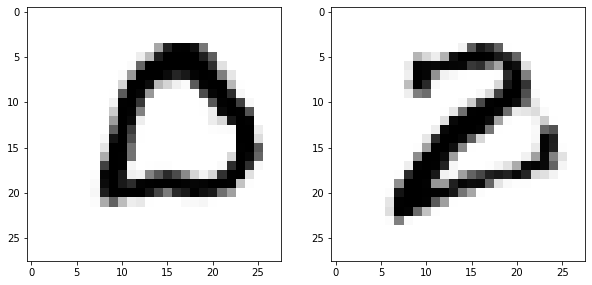

In [0]:
noise1 = np.random.normal(0, 1, latent_dim).reshape(1,100)
noise2 = np.random.normal(0, 1, latent_dim).reshape(1,100)

fig, axis = plt.subplots(1,2,figsize=(10,15))
axis[0].imshow(generator.predict(noise1).reshape(28,28), cmap="Greys")
axis[1].imshow(generator.predict(noise2).reshape(28,28), cmap="Greys")

Text(0.5, 1.0, '25% del 0 y 75% del 2')

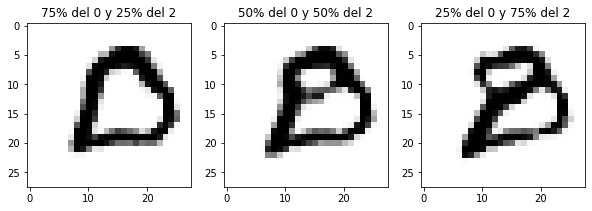

In [0]:
fig, axis = plt.subplots(1,3,figsize=(10,15))
axis[0].imshow(generator.predict((0.75*noise1+0.25*noise2)).reshape(28,28), cmap="Greys")
axis[0].set_title("75% del 0 y 25% del 2")
axis[1].imshow(generator.predict((0.5*noise1+0.5*noise2)).reshape(28,28), cmap="Greys")
axis[1].set_title("50% del 0 y 50% del 2")
axis[2].imshow(generator.predict((0.25*noise1+0.75*noise2)).reshape(28,28), cmap="Greys")
axis[2].set_title("25% del 0 y 75% del 2")

* Proponga o investigue como realizaría las siguientes tareas:
    * A partir de una base de datos de imagenes RGB, entrenar una GAN que genere imágenes a color convincentes a partir de imagenes en blanco y negro, es decir que deduzca el color a partir de imagenes en blanco y negro.
    * A partir de una base de datos de cuadros de paisajes reales y las fotos correspondientes al cuadro, entrenar una GAN que permita transformar fotografias a cuadros y viceversa (puede utilizar más de 2 redes)
    * Proponga un problema que les parezca interesante y una estructura de GAN que le permitiría resolverlo

**1-** Se puede usar style transfer para ello, ya que en la literatura se han realizado y probado que usando redes convolucionales profundas es posible realizar esta tarea

**2-** Se puede usar CycleGAN, una estructura de GAN que sirve para problemas de image-yo-image traslation, en este caso para "trasladar" pinturas o cuadros a fotografías y viceversa

**3-** Un problema interesante puede ser transformar una imagen de un tipo de animal en otro, por ejemplo, un gato en un perro, donde el generador tendría el trabajo de generar las imágenes de perro a partir de las de gato, y el discriminador tendría que diferenciar estas imágenes generadas